In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
books = pd.read_csv('./data/books_final.csv')
authors = pd.read_csv('./data/author_final.csv')

In [3]:
books.head(5)

id                   title  author_id  \
0  54333  食品の混ぜ物処理および調理の毒物（1820）       1657   
1  46340                 ファラデーの伝       1234   
2  46511                    一片の石       1245   
3  57975                  音楽に就いて       1245   
4  57976                      学規       1245   

                                                 url  inception  char_count  \
0  https://www.aozora.gr.jp/cards/001657/files/54...        NaN     80156.0   
1  https://www.aozora.gr.jp/cards/001234/files/46...        NaN     76104.0   
2  https://www.aozora.gr.jp/cards/001245/files/46...        NaN      2975.0   
3  https://www.aozora.gr.jp/cards/001245/files/57...     1922.0      2516.0   
4  https://www.aozora.gr.jp/cards/001245/files/57...        NaN       585.0   

                                                text category char_type  \
0  著者フレデリック・アークム専門化学者、ヨーロッパの主な芸術・科学アカデミーおよび学会の会員緒...  NDC 588     新字新仮名   
1  ［＃改丁］序偉人の伝記というと、ナポレオンとかアレキサンドロスとか、グラッドストーンというよ...  NDC 289     新字新仮名   
2  人間が石にたよるやうになつて、もうよほど久しいことであるのに、まだ根気よくそれをやつてゐる。...  NDC 914     新字旧仮名   
3  既に美育部を持つてゐる早稻田中學校が新に音樂會を興してその發會式をやらうとする其の日から、又...  NDC 914     旧字旧仮名   
4  古い日記や手紙などを、みんな燒いてしまつたので、こまかに時日をいへないが、まだ若い中學教師で...  NDC 914     旧字旧仮名   

   authorAge author_role  
0        NaN          著者  
1        NaN          著者  
2        NaN          著者  
3       41.0          著者  
4        NaN          著者

In [5]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17370 entries, 0 to 17369
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           17370 non-null  int64  
 1   title        17370 non-null  object 
 2   author_id    17370 non-null  int64  
 3   url          17370 non-null  object 
 4   inception    10639 non-null  float64
 5   char_count   17370 non-null  float64
 6   text         17370 non-null  object 
 7   category     16801 non-null  object 
 8   char_type    17370 non-null  object 
 9   authorAge    10564 non-null  float64
 10  author_role  17370 non-null  object 
dtypes: float64(3), int64(2), object(6)
memory usage: 1.5+ MB


In [3]:
def nulls(df: pd.DataFrame):
    return pd.DataFrame({
        'cols': df.columns,
        "null_count": df.isna().sum().values,
        '% null': np.round(df.isna().sum().values / len(df) * 100, 3)
    }).sort_values(by='null_count', ascending=False).reset_index(drop=True)

In [7]:
nulls(books)

cols  null_count  % null
0     authorAge        6806  39.182
1     inception        6731  38.751
2      category         569   3.276
3     author_id           0   0.000
4         title           0   0.000
5            id           0   0.000
6           url           0   0.000
7          text           0   0.000
8    char_count           0   0.000
9     char_type           0   0.000
10  author_role           0   0.000

In [8]:
books.describe(include='float')

inception     char_count     authorAge
count  10639.000000   17370.000000  10564.000000
mean    1932.344487   13456.169315     42.385744
std       20.681545   34426.686869     13.318430
min      712.000000      14.000000     12.000000
25%     1924.000000    1531.250000     32.000000
50%     1933.000000    4314.000000     41.000000
75%     1942.000000   11550.500000     51.000000
max     2022.000000  823518.000000     91.000000

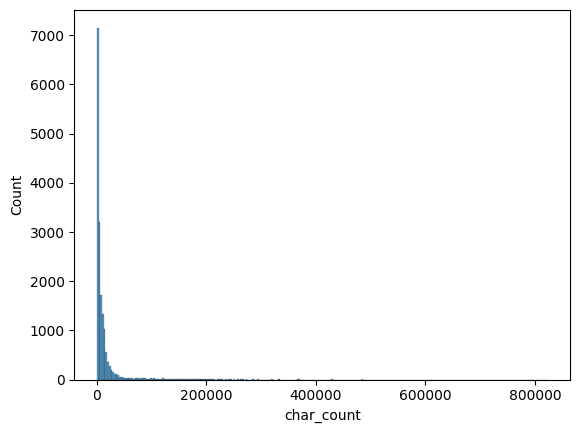

In [11]:
sns.histplot(books['char_count']);

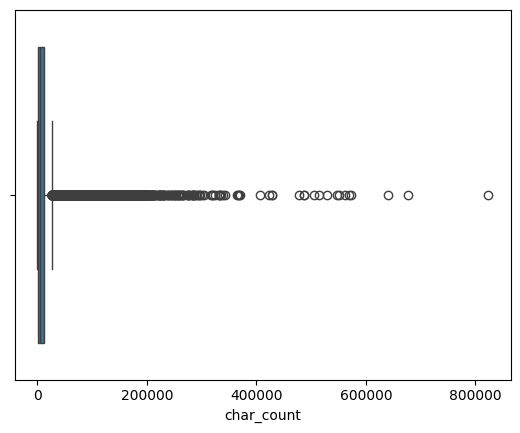

In [12]:
sns.boxplot(books, x='char_count');

There is a lot of variance in terms of `character count`, so I'll split into categories.

Each will hold around 25% of the data:

- `flash`: [0, 1500)
- `shortshort`: [1500, 4000)
- `short`: [400, 12000)
- `novel`: 12000+

In [437]:
num_of_chars = [0, 1500, 4000, 12000, 1000000]
categories = ['flash', 'shortshort', 'short', 'novel']
books['length_type'] = pd.cut(books['char_count'], num_of_chars, labels=categories)

In [18]:
pd.DataFrame(np.unique_counts(books['length_type'])).T

0     1
0       flash  4268
1       novel  4147
2       short  4897
3  shortshort  4058

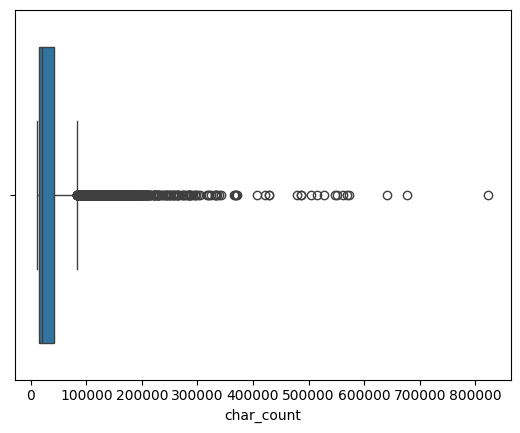

In [23]:
novels = books[books['length_type'] == 'novel']

sns.boxplot(novels, x='char_count');

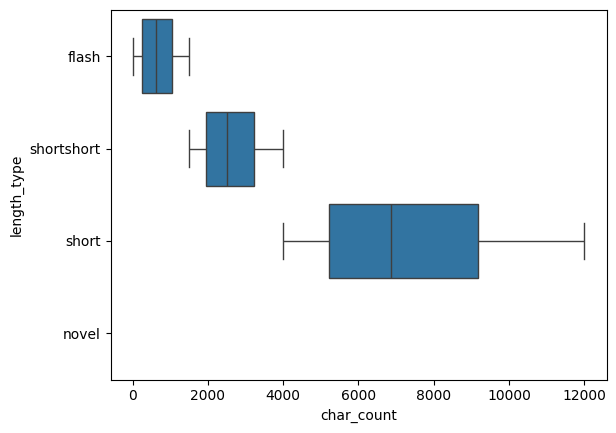

In [22]:
non_novels = books[~(books['length_type'] == 'novel')]

sns.boxplot(non_novels, x='char_count', y='length_type');

I'm going to add another bin between `short` and `novel` so that they have less variance.

In [5]:
num_of_chars = [0, 1500, 4000, 12000, 24000, 1000000]
categories = ['flash', 'shortshort', 'short', 'novelette', 'novel']
books['length_type'] = pd.cut(books['char_count'], num_of_chars, labels=categories)

In [41]:
pd.DataFrame(np.unique_counts(books['length_type'])).T

0     1
0       flash  4268
1       novel  1791
2   novelette  2356
3       short  4897
4  shortshort  4058

In [4]:
books['length_type'] = pd.qcut(books['char_count'], 5, labels=['flash', 'shortshort', 'short', 'novelette', 'novel'])

In [43]:
pd.DataFrame(np.unique_counts(books['length_type'])).T

0     1
0       flash  3474
1       novel  3474
2   novelette  3474
3       short  3472
4  shortshort  3476

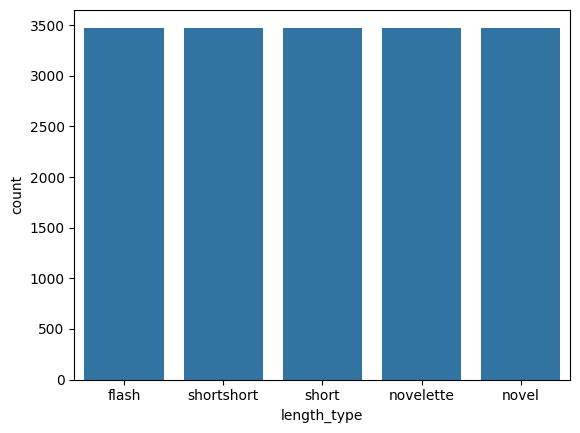

In [55]:
sns.countplot(books, x='length_type');

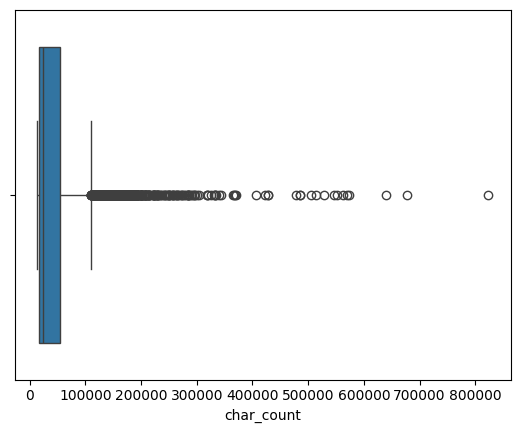

In [44]:
novels = books[books['length_type'] == 'novel']

sns.boxplot(novels, x='char_count');

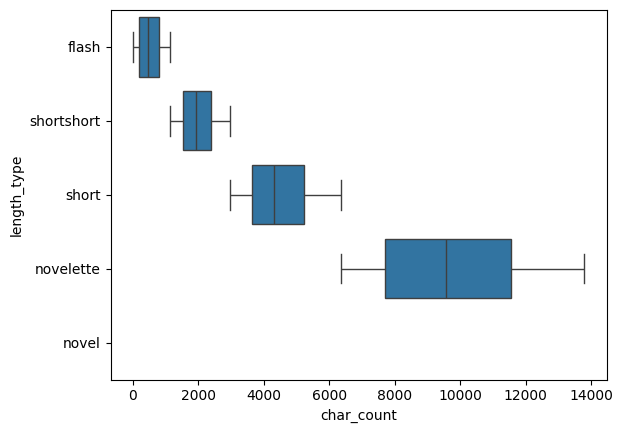

In [45]:
non_novels = books[~(books['length_type'] == 'novel')]

sns.boxplot(non_novels, x='char_count', y='length_type');

In [49]:
d = {}
for type in np.unique_values(books['length_type']):
    d[type] = books[books['length_type'] == type]['char_count'].describe()

pd.DataFrame(d)

flash          novel     novelette        short   shortshort
count  3474.000000    3474.000000   3474.000000  3472.000000  3476.000000
mean    507.604778   50675.421704   9687.126655  4438.232143  1973.880035
std     341.974140   64346.663773   2172.218763   953.018543   510.660344
min      14.000000   13790.000000   6356.000000  2971.000000  1151.000000
25%     190.000000   17180.500000   7703.500000  3635.000000  1531.750000
50%     451.000000   24713.000000   9555.000000  4314.000000  1928.000000
75%     802.000000   54191.750000  11550.500000  5226.000000  2397.000000
max    1150.000000  823518.000000  13789.000000  6353.000000  2970.000000

Text(0.5, 1.0, 'character count of all non-novels')

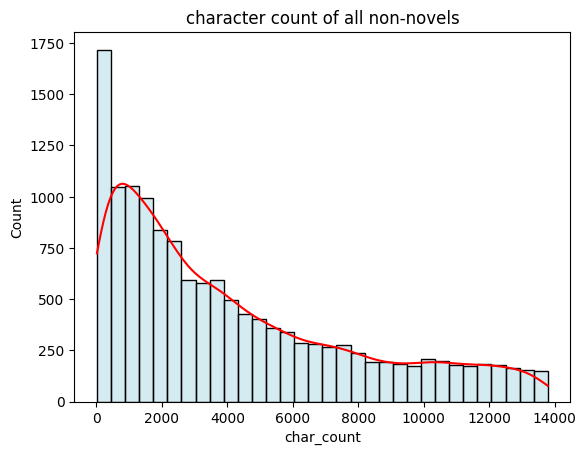

In [ ]:
ax = sns.histplot(non_novels['char_count'], kde=True, color='lightblue');
ax.lines[0].set_color('red');
ax.set_title('character count of all non-novels');

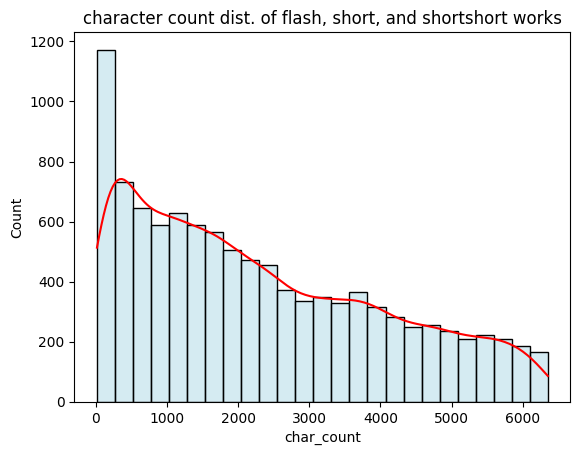

In [58]:
ax = sns.histplot(non_novels[~(non_novels['length_type'] == 'novelette')]['char_count'], kde=True, color='lightblue');
ax.lines[0].set_color('red');
ax.set_title('character count dist. of flash, short, and shortshort works');

Text(0.5, 1.0, 'character count of novels')

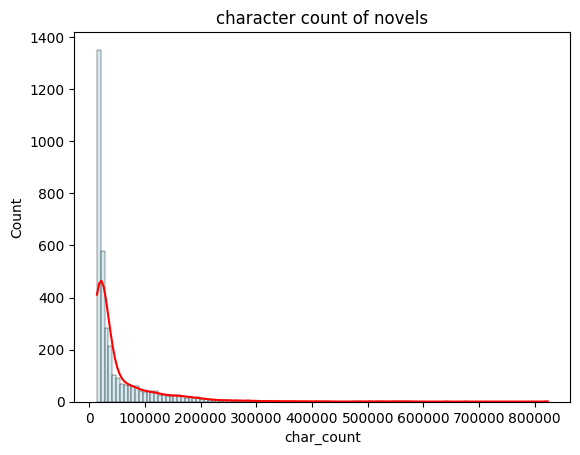

In [ ]:
ax = sns.histplot(novels['char_count'], kde=True, color = 'lightblue');
ax.lines[0].set_color('red');
ax.set_title('character count of novels');

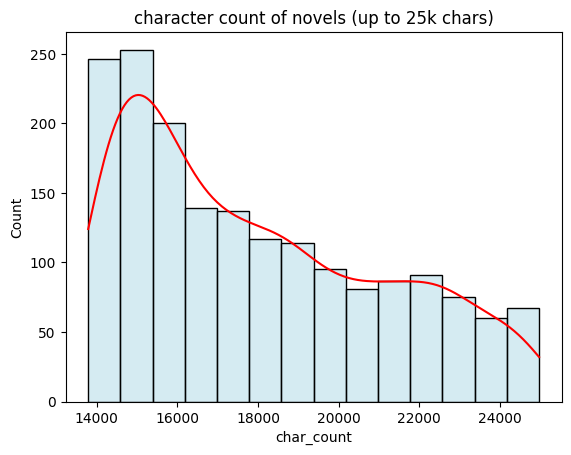

In [61]:
ax = sns.histplot(novels[novels['char_count'] <= 25000]['char_count'], kde=True, color = 'lightblue');
ax.lines[0].set_color('red');
ax.set_title('character count of novels (up to 25k chars)');

As a whole, the dataset seems to have a majority of shorter works (< 10000 chars)

I'm interested to see if this is because a majority of early works are short (maybe due to technological limitations, or perhaps a general lack of literacy to warrant a longer length work).


In [ ]:
count = pd.DataFrame(np.unique_counts(books['inception'].astype(str))).T
count = count[0: 117].rename({1: 'count', 0: 'year'}, axis=1) # slicing to remove the nans

In [77]:
count['year'] = count['year'].astype(float)

In [78]:
count['bins'] = pd.qcut(count['year'], 9)

count

year count                 bins
0    1331.0     1  (711.999, 1880.778]
1    1768.0     1  (711.999, 1880.778]
2    1776.0     1  (711.999, 1880.778]
3    1854.0     1  (711.999, 1880.778]
4    1872.0     2  (711.999, 1880.778]
..      ...   ...                  ...
112  1997.0     2   (1980.111, 2022.0]
113  2016.0     3   (1980.111, 2022.0]
114  2019.0     3   (1980.111, 2022.0]
115  2022.0     3   (1980.111, 2022.0]
116   712.0     1  (711.999, 1880.778]

[117 rows x 3 columns]

In [79]:
counts = pd.DataFrame(count.groupby('bins', as_index=False).sum()[['bins', 'count']]);

counts

C:\Users\Jaden\AppData\Local\Temp\ipykernel_15716\1040286434.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = pd.DataFrame(count.groupby('bins', as_index=False).sum()[['bins', 'count']]);


bins count
0   (711.999, 1880.778]    30
1  (1880.778, 1894.778]   153
2  (1894.778, 1907.667]   451
3  (1907.667, 1920.556]  1339
4  (1920.556, 1933.444]  3473
5  (1933.444, 1946.333]  3022
6  (1946.333, 1959.222]  1892
7  (1959.222, 1980.111]   164
8    (1980.111, 2022.0]   115

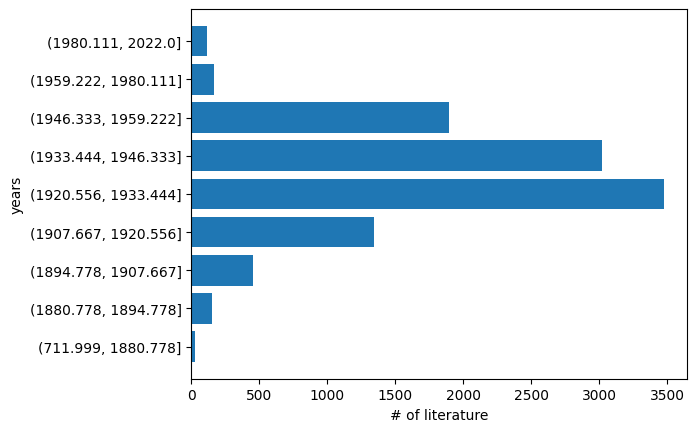

In [80]:
plt.barh(counts.bins.astype(str), counts['count']);
plt.xlabel('# of literature')
plt.ylabel('years')
plt.show()

In [81]:
counts['%_change'] = counts['count'].pct_change() * 100;

C:\Users\Jaden\AppData\Local\Temp\ipykernel_15716\2214901247.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  counts['%_change'] = counts['count'].pct_change() * 100;


In [83]:
counts

bins count    %_change
0   (711.999, 1880.778]    30         NaN
1  (1880.778, 1894.778]   153  410.000000
2  (1894.778, 1907.667]   451  194.771242
3  (1907.667, 1920.556]  1339  196.895787
4  (1920.556, 1933.444]  3473  159.372666
5  (1933.444, 1946.333]  3022  -12.985891
6  (1946.333, 1959.222]  1892  -37.392455
7  (1959.222, 1980.111]   164  -91.331924
8    (1980.111, 2022.0]   115  -29.878049

### Categorizing by era:

In [172]:
era_count = count
bins = [0, 1867, 1912, 1926, 1989, 2019]
labels = ['Pre-Meiji', 'Meiji', 'Taisho', 'Showa', 'Heisei']
era_count['bins'] = pd.cut(era_count['year'], bins, labels=labels)

In [173]:
era_count = pd.DataFrame(era_count.groupby('bins', as_index=False).sum()[['bins', 'count']]);

era_count

C:\Users\Jaden\AppData\Local\Temp\ipykernel_15716\3406830745.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  era_count = pd.DataFrame(era_count.groupby('bins', as_index=False).sum()[['bins', 'count']]);


bins count
0  Pre-Meiji     0
1      Meiji  1072
2     Taisho  2454
3      Showa  7091
4     Heisei    14

In [282]:
idx = books[books['inception'] < 1867].index

books = books.drop(index=idx)

In [283]:
count = pd.DataFrame(np.unique_counts(books['inception'].astype(str))).T
count = count[0: 112].rename({1: 'count', 0: 'year'}, axis=1)
count['year'] = count['year'].astype(float)
count

year count
0    1872.0     2
1    1873.0     1
2    1874.0     6
3    1875.0     5
4    1876.0     3
..      ...   ...
107  1995.0     1
108  1997.0     2
109  2016.0     3
110  2019.0     3
111  2022.0     3

[112 rows x 2 columns]

In [284]:
era_count = count
bins = [1867, 1912, 1926, 1989, 2022]
labels = [ 'Meiji', 'Taisho', 'Showa', 'Heisei']
era_count['bins'] = pd.cut(era_count['year'], bins, labels=labels)

In [177]:
era_count

year count    bins
0    1872.0     2   Meiji
1    1873.0     1   Meiji
2    1874.0     6   Meiji
3    1875.0     5   Meiji
4    1876.0     3   Meiji
..      ...   ...     ...
107  1995.0     1  Heisei
108  1997.0     2  Heisei
109  2016.0     3  Heisei
110  2019.0     3  Heisei
111  2022.0     3  Heisei

[112 rows x 3 columns]

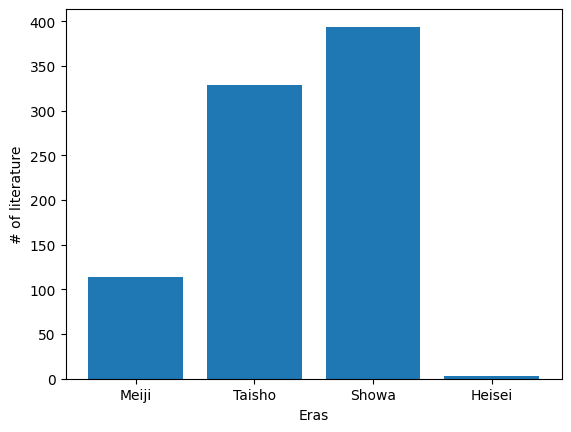

In [285]:
plt.bar(era_count.bins, era_count['count']);
plt.xlabel('Eras');
plt.ylabel('# of literature');
plt.show()

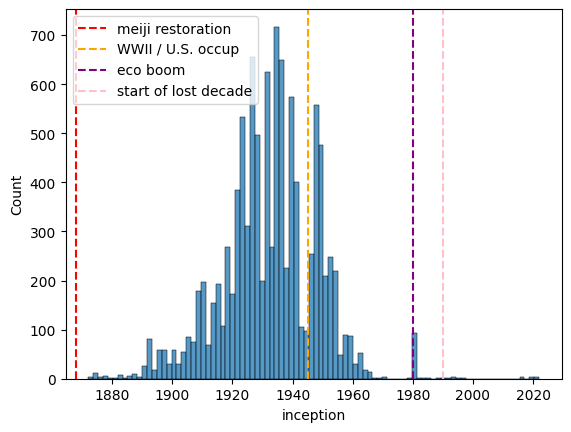

In [179]:
ax = sns.histplot(books['inception']);
meiji_rest = ax.axvline(x=1868, c='red', ls='--')
meiji_rest.set_label('meiji restoration')
WWII = ax.axvline(x=1945, c='orange', ls='--')
WWII.set_label('WWII / U.S. occup')
bubble = ax.axvline(x=1980, c='purple', ls='--')
bubble.set_label('eco boom')
lost = ax.axvline(x=1990, c='pink', ls='--')
lost.set_label('start of lost decade')
ax.legend(loc=2);


In [180]:
def book_count_by_year(book_type):
    df = books[books['length_type'] == book_type]
    ax = sns.histplot(df['inception']);
    meiji_rest = ax.axvline(x=1868, c='red', ls='--')
    meiji_rest.set_label('meiji restoration')
    WWII = ax.axvline(x=1945, c='orange', ls='--')
    WWII.set_label('WWII / U.S. occup')
    ax.legend(loc=2);

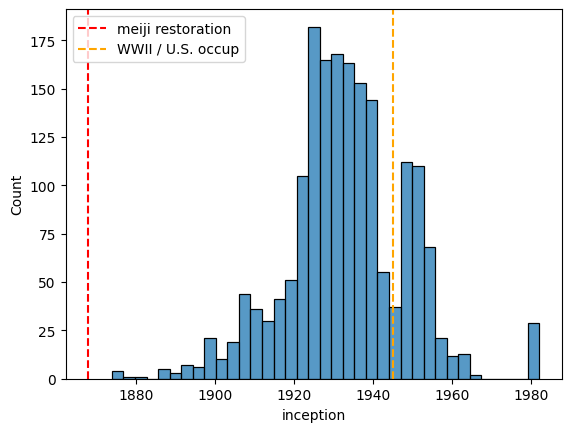

In [181]:
book_count_by_year('flash')

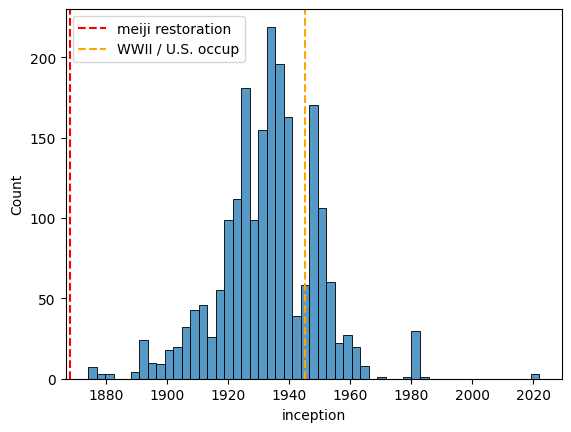

In [182]:
book_count_by_year('shortshort')

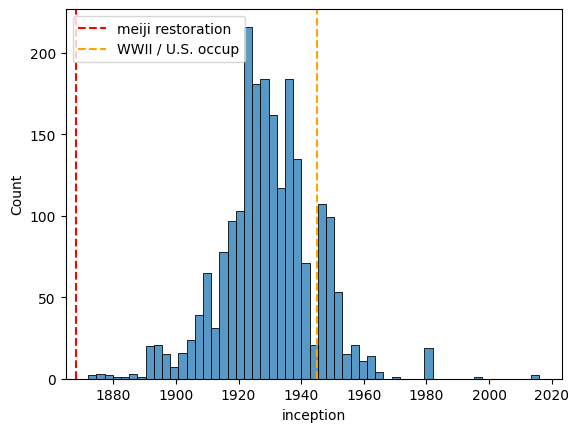

In [183]:
book_count_by_year('short')

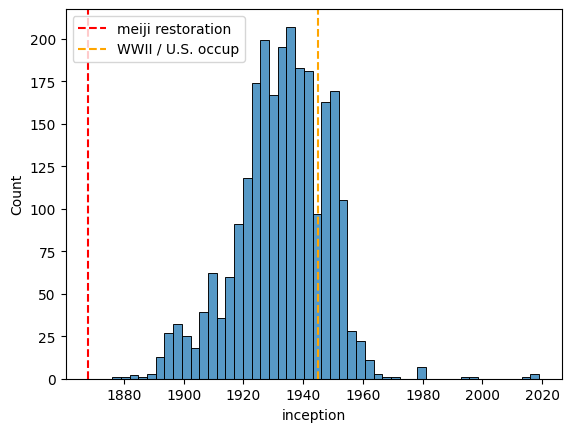

In [184]:
book_count_by_year('novelette')

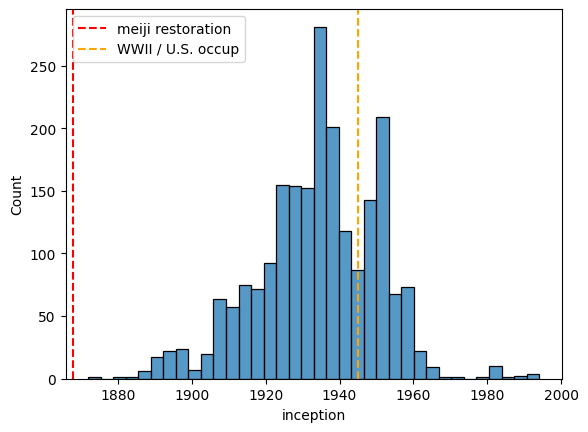

In [185]:
book_count_by_year('novel')

In [186]:
plots = []
for type in np.unique_values(books['length_type'].astype(str)):
    if type != 'nan':
        plots.append(books[books['length_type'] == type]['inception']) 


In [187]:
types = np.unique_values(books['length_type'].astype(str))


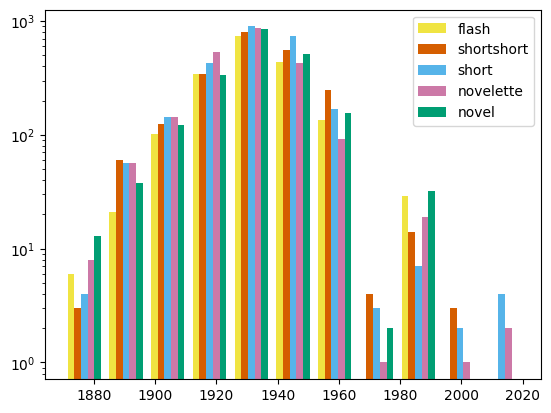

In [200]:
palette_colors = [
    '#F0E442',  # Yellow
    '#D55E00',  # Red-orange
    '#56B4E9',  # Sky blue
    '#CC79A7',  # Pink
    '#009E73',  # Green 
]

bins = np.linspace(1870, 2020,12)
plt.hist(plots, bins=bins, label=['flash', 'shortshort', 'short', 'novelette', 'novel'], log=True, color=palette_colors)
plt.legend(loc='upper right') 
#'flash', 'novel', 'novelette', 'short', 'shortshort'
plt.show()

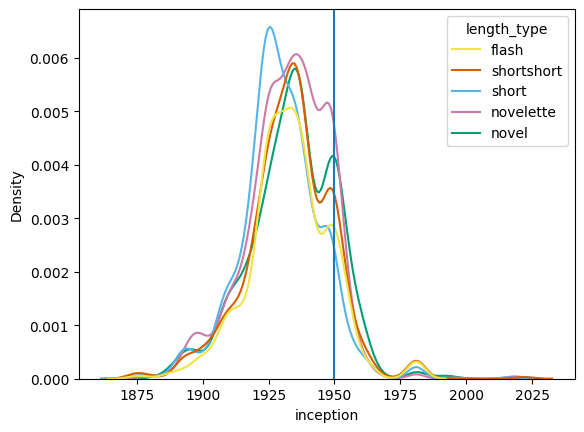

In [203]:
palette_colors = ['#F0E442',  # Yellow
    '#D55E00',  # Red-orange
    '#56B4E9',  # Sky blue
    '#CC79A7',  # Pink
   '#009E73',  # Green 
   ]
ax = sns.kdeplot(books, x = 'inception', hue='length_type', palette=palette_colors);

ax.axvline(1950)

Insights:

- Each book type shares similar trends
  - Drastic increase starting early 1900s, especially after WWI.
  - dip during WWII, with an upsurge following the beginning of U.S. occupation.
  - A very unnatural near-zero count of works during the 1970s.
  - A slight resurge of works during the 1980s.
- `short`s were most prominent between 1920s and 1930, after which it drops the most drastically during WWII, leading to other works becoming more prominent.
- `novelette`s and `novel`s were most prominent between 1935 - 1950, which would align with the Great Depression and WWII. `novelette`'s dip during WWII is much less drastic than the others.
- `shortshort` and `flash`'s distribution seem to be similar to one another, with `shortshort` being clustered around 1930 - 1940.


Limitations:

- As Aozora Bunko is a legal Japanese digital library, it only contains
 1. out-of-copyright books (copyright policy is 70 years after the author's death.)
 2. works that authors wish to make freely available.

- This does explain the drastic decrease starting 1950, (2025 - 70 = 1955) and the absence of works post 1955.
  - What is interesting, however, is the upsurge in works in the 1980s that are present in the library.

##  Taking a peek at the authors.

#### Gender breakdowns

In [425]:
authors.head()

id author   birthDate   deathDate gender birthPlace      last    first  \
0  148.0   夏目漱石  1867-02-09  1916-12-09   male       喜久井町   Natsume   Soseki   
1   81.0   宮沢賢治  1896-08-27  1933-09-21   male      花巻川口町  Miyazawa    Kenji   
2   35.0    太宰治  1909-06-19  1948-06-13   male        金木町     Dazai    Osamu   
3  119.0    中島敦  1909-05-05  1942-12-04   male        四谷区  Nakajima  Atsushi   
4   96.0   夢野久作  1889-01-04  1936-03-11   male        福岡市    Yumeno  Kyusaku   

   birthYear  deathYear  first_work_age  
0     1867.0     1916.0            37.0  
1     1896.0     1933.0            25.0  
2     1909.0     1948.0            24.0  
3     1909.0     1942.0            24.0  
4     1889.0     1936.0            30.0

In [426]:
authors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951 entries, 0 to 950
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              951 non-null    float64
 1   author          951 non-null    object 
 2   birthDate       928 non-null    object 
 3   deathDate       925 non-null    object 
 4   gender          951 non-null    object 
 5   birthPlace      801 non-null    object 
 6   last            951 non-null    object 
 7   first           935 non-null    object 
 8   birthYear       928 non-null    float64
 9   deathYear       925 non-null    float64
 10  first_work_age  611 non-null    float64
dtypes: float64(4), object(7)
memory usage: 81.9+ KB


In [427]:
nulls(authors)

cols  null_count  % null
0   first_work_age         340  35.752
1       birthPlace         150  15.773
2        deathYear          26   2.734
3        deathDate          26   2.734
4        birthYear          23   2.419
5        birthDate          23   2.419
6            first          16   1.682
7           author           0   0.000
8               id           0   0.000
9             last           0   0.000
10          gender           0   0.000

In [428]:
authors.describe()

id    birthYear    deathYear  first_work_age
count   951.000000   928.000000   925.000000      611.000000
mean   1130.383807  1871.177802  1928.160000       36.831424
std     641.934039   116.635408   118.116121       14.516787
min       5.000000   233.000000   297.000000       12.000000
25%     485.500000  1870.750000  1930.000000       25.000000
50%    1245.000000  1885.000000  1944.000000       33.000000
75%    1652.500000  1898.000000  1956.000000       45.000000
max    2402.000000  1986.000000  2016.000000       89.000000

In [429]:
np.unique_values(authors['gender'].astype(str))

array(['female', 'male', 'unknown'], dtype=object)

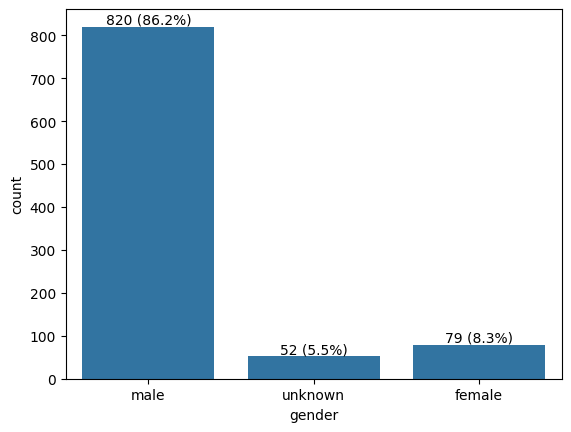

In [410]:
ax = sns.countplot(x=authors['gender'],)
for p in ax.patches:
    height = p.get_height()
    percentage = 100 * height / len(authors)
    ax.text( # to show individual frequencies.
        p.get_x() + p.get_width() / 2.,
        height,                          
        f'{int(height)} ({np.round(percentage,1)}%)',               
        ha='center', va='bottom'         
)

plt.show()

Not many females at all.


In [488]:
female = authors[authors['gender'] == 'female']

female

author_id               author   birthDate   deathDate  gender  \
27        64.0                 樋口一葉  1872-05-02  1896-11-23  female   
42        52.0                  紫式部  0973-00-00  1014-00-00  female   
54      1090.0         オルコットルイーザ・メイ  1832-11-29  1888-03-06  female   
65      1176.0  シェリーメアリー・ウォルストンクラフト  1797-08-30  1851-02-01  female   
77        76.0                岡本かの子  1889-03-01  1939-02-18  female   
..         ...                  ...         ...         ...     ...   
919     1422.0                 戸田豊子     1904-01  1956-04-11  female   
924     2136.0            ノアイユアンナ・ド  1876-11-15  1933-04-30  female   
930     2402.0            ファイルマンローズ  1877-03-06  1957-08-01  female   
933     2085.0                 間所紗織  1924-05-24  1966-01-31  female   
934      796.0                 三角錫子  1872-05-26  1921-03-12  female   

         birthPlace              last                first  birthYear  \
27               東京           Higuchi               Ichiyo     1872.0   
42        Heian-kyō  Murasaki Shikibu                  NaN      973.0   
54       Germantown            Alcott           Louisa May     1832.0   
65      Somers Town           Shelley  Mary Wollstonecraft     1797.0   
77               赤坂           Okamoto               Kanoko     1889.0   
..              ...               ...                  ...        ...   
919           Japan                戸田                   豊子     1904.0   
924          France              ノアイユ                アンナ・ド     1876.0   
930  United Kingdom            ファイルマン                  ローズ     1877.0   
933           Aichi                間所                   紗織     1924.0   
934           Japan                三角                   錫子     1872.0   

     deathYear  first_work_age  
27      1896.0            20.0  
42      1014.0             NaN  
54      1888.0             NaN  
65      1851.0             NaN  
77      1939.0            30.0  
..         ...             ...  
919     1956.0            25.0  
924     1933.0             NaN  
930     1957.0            50.0  
933     1966.0             NaN  
934     1921.0             NaN  

[79 rows x 11 columns]

In [ ]:
female_ids = female['author_id']

female_works = books[books['author_id'].isin(female_ids)]

female_works

id          title  author_id  \
32     59016  現代作家は古典をどうみるか       1990   
33     59393      「ぴ・い・ぷ・る」       1990   
34     59502      美容院にのぞむこと       1990   
35     59722        表紙絵について       1990   
36     59022        民芸品の部屋で       1990   
...      ...            ...        ...   
17214   2387           梁上の足        331   
17215   2388             烈日        331   
17216  47137           黄金機会        163   
17217  47138   鼻で鱒を釣つた話（実事）        163   
17218    888           忘れ形見        163   

                                                     url  inception  \
32     https://www.aozora.gr.jp/cards/001990/files/59...        NaN   
33     https://www.aozora.gr.jp/cards/001990/files/59...     1956.0   
34     https://www.aozora.gr.jp/cards/001990/files/59...        NaN   
35     https://www.aozora.gr.jp/cards/001990/files/59...        NaN   
36     https://www.aozora.gr.jp/cards/001990/files/59...     1955.0   
...                                                  ...        ...   
17214  https://www.aozora.gr.jp/cards/000331/files/23...        NaN   
17215  https://www.aozora.gr.jp/cards/000331/files/23...        NaN   
17216  https://www.aozora.gr.jp/cards/000163/files/47...     1893.0   
17217  https://www.aozora.gr.jp/cards/000163/files/47...     1893.0   
17218  https://www.aozora.gr.jp/cards/000163/files/88...        NaN   

       char_count                                               text  \
32          137.0  〔設問〕一明治以前の日本の伝統美術で最も興味をもっているものは何か二その理由芥川紗織一、土偶...   
33          239.0  民話を描くこの一年の間に随分沢山の日本の民話を読みあさりました。古くから語りつがれて来たおは...   
34          189.0  こと容姿に關しては私は恐ろしく小心なのでとても壯麗な美容院に一人で入つて行く勇氣がありません...   
35          240.0  雑誌の表紙は始めてです。何時もと同じ染色の方法で何時もと同じ人間の描き方をしました。乳房のあ...   
36          543.0  前にタマヨの絵を美術雑誌の原色版で見てそのまか不思議な色彩にひどく惹かれました。それ以来私は...   
...           ...                                                ...   
17214      5475.0  梁上の足若杉鳥子晝間、街から持つて來た昂奮が、夜中私を睡らせなかつた。おまけに、腦天を紛碎し...   
17215      2118.0  急坂私が坂を下りやうとした時、下の方から急激な怒號が起つた。罵る叫ぶ叱する、呻く力を張る、そ...   
17216     14048.0  上私は二十になつた今日までの生涯にこれぞといつて人さまにお話し申す大事件もなく、父母の膝下に...   
17217      2068.0  みなさん、魚はどういふものを食べたがるか、御承知ですか？。蚯蚓に団子………。さ様、それから生...   
17218        96.0  Howkind,howfairshewas,howgood,Icannottellyou.I...   

       category char_type  authorAge author_role length_type   eras  
32      NDC 723     新字新仮名        NaN          著者       flash    NaN  
33      NDC 723     新字新仮名       32.0          著者       flash  Showa  
34      NDC 595     旧字新仮名        NaN          著者       flash    NaN  
35      NDC 723     新字新仮名        NaN          著者       flash    NaN  
36      NDC 723     新字新仮名       31.0          著者       flash  Showa  
...         ...       ...        ...         ...         ...    ...  
17214   NDC 913     旧字旧仮名        NaN          著者       short    NaN  
17215   NDC 913     旧字旧仮名        NaN          著者  shortshort    NaN  
17216  NDC K913     新字旧仮名       29.0          著者       novel  Meiji  
17217  NDC K913     新字旧仮名       29.0          著者  shortshort  Meiji  
17218  NDC K913     新字新仮名        NaN          著者       flash    NaN  

[2267 rows x 13 columns]

<Axes: xlabel='inception', ylabel='Count'>

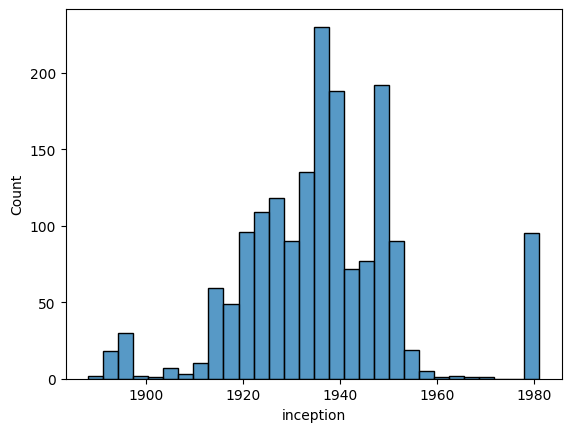

In [493]:
sns.histplot(female_works['inception'])

In [495]:
male = authors[authors['gender'] == 'male']

male_works = books[books['author_id'].isin(male['author_id'])]

male_works.head(5)

id                   title  author_id  \
0  54333  食品の混ぜ物処理および調理の毒物（1820）       1657   
1  46340                 ファラデーの伝       1234   
2  46511                    一片の石       1245   
3  57975                  音楽に就いて       1245   
4  57976                      学規       1245   

                                                 url  inception  char_count  \
0  https://www.aozora.gr.jp/cards/001657/files/54...        NaN     80156.0   
1  https://www.aozora.gr.jp/cards/001234/files/46...        NaN     76104.0   
2  https://www.aozora.gr.jp/cards/001245/files/46...        NaN      2975.0   
3  https://www.aozora.gr.jp/cards/001245/files/57...     1922.0      2516.0   
4  https://www.aozora.gr.jp/cards/001245/files/57...        NaN       585.0   

                                                text category char_type  \
0  著者フレデリック・アークム専門化学者、ヨーロッパの主な芸術・科学アカデミーおよび学会の会員緒...  NDC 588     新字新仮名   
1  ［＃改丁］序偉人の伝記というと、ナポレオンとかアレキサンドロスとか、グラッドストーンというよ...  NDC 289     新字新仮名   
2  人間が石にたよるやうになつて、もうよほど久しいことであるのに、まだ根気よくそれをやつてゐる。...  NDC 914     新字旧仮名   
3  既に美育部を持つてゐる早稻田中學校が新に音樂會を興してその發會式をやらうとする其の日から、又...  NDC 914     旧字旧仮名   
4  古い日記や手紙などを、みんな燒いてしまつたので、こまかに時日をいへないが、まだ若い中學教師で...  NDC 914     旧字旧仮名   

   authorAge author_role length_type    eras  
0        NaN          著者       novel     NaN  
1        NaN          著者       novel     NaN  
2        NaN          著者       short     NaN  
3       41.0          著者  shortshort  Taisho  
4        NaN          著者       flash     NaN

<Axes: xlabel='inception', ylabel='Count'>

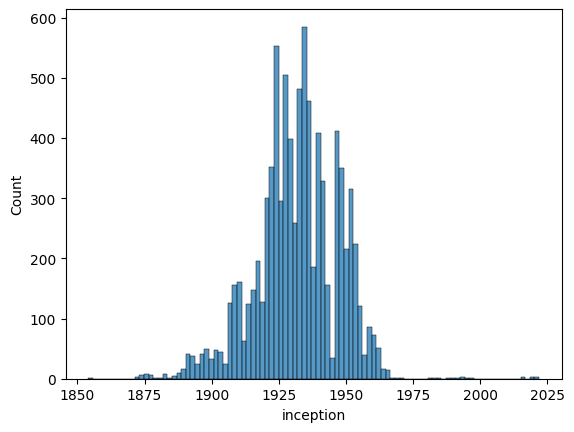

In [498]:
sns.histplot(male_works[male_works['inception'] > 1800]['inception'])

In [506]:
female_works['gender'] = 'female'
male_works['gender'] = 'male'

genders = pd.concat([female_works, male_works], ignore_index=True)

genders = genders[genders['inception'] > 1800]

C:\Users\Jaden\AppData\Local\Temp\ipykernel_15716\3340822393.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_works['gender'] = 'female'
C:\Users\Jaden\AppData\Local\Temp\ipykernel_15716\3340822393.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_works['gender'] = 'male'


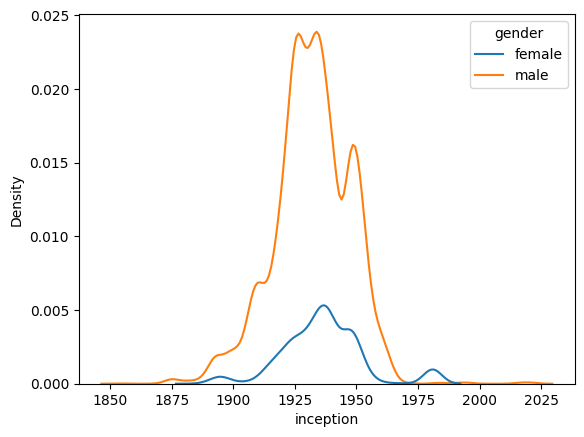

In [ ]:
sns.kdeplot(genders, x = 'inception', hue='gender')

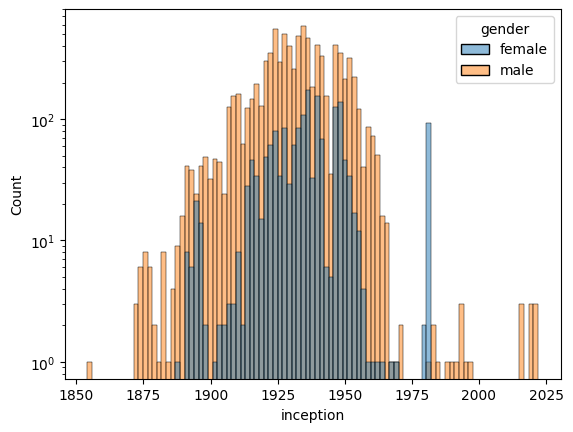

In [515]:
sns.histplot(data=genders, x='inception', hue='gender', multiple='layer')
plt.yscale('log')  # Apply log scale to the Y-axis
plt.show()

- `female` works are delayed, until 1940s before they are similar to `male` works in terms of frequency.
- `female` works are much more prominent compared to `male` works in the 1980s, but a small sample size could definitely be attributing to that.

- both works follow similar trends (clustered around 1900 - 1950, massive dip during WWII, normal-ish distribution)

#### Authors / Era breakdown

In [411]:
count = pd.DataFrame(np.unique_counts(authors['birthYear'].astype(str))).T

count = count[0:138]

count = count.rename(columns={0: 'year', 1: 'count'})
count['year'] = count['year'].astype(float)

In [412]:
count['year'] = count['year'] + 30 # around when most write their first work

In [413]:
era_author_count = count
bins = [1867, 1912, 1926, 1989, 2022]
labels = [ 'Meiji', 'Taisho', 'Showa', 'Heisei']
era_author_count['bins'] = pd.cut(era_author_count['year'], bins, labels=labels)

nulls(era_author_count)

cols  null_count  % null
0   bins          39  28.261
1   year           0   0.000
2  count           0   0.000

22% of the years are null. This looks deceivingly large, as this only contains unique years of birth. In actuality, 31 / len(authors) = 3% of the authors are outside the years defined.

In [414]:
era_author_count = era_author_count.dropna()

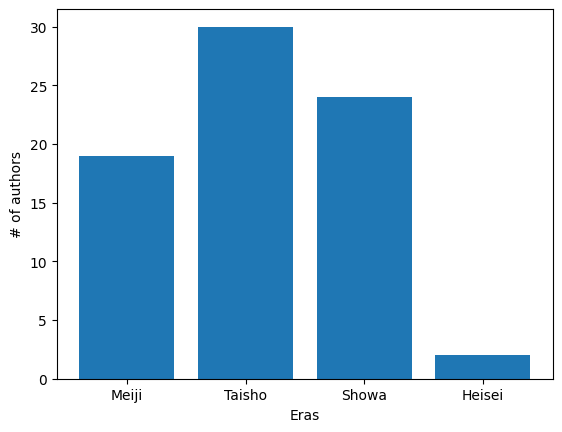

In [415]:
plt.bar(era_author_count.bins, era_author_count['count']);
plt.xlabel('Eras');
plt.ylabel('# of authors');
plt.show()

In [416]:
era_author_count['type'] = 'authors'
era_count['type'] = 'works'

combined = pd.concat([era_author_count, era_count])

C:\Users\Jaden\AppData\Local\Temp\ipykernel_15716\607867148.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  era_author_count['type'] = 'authors'


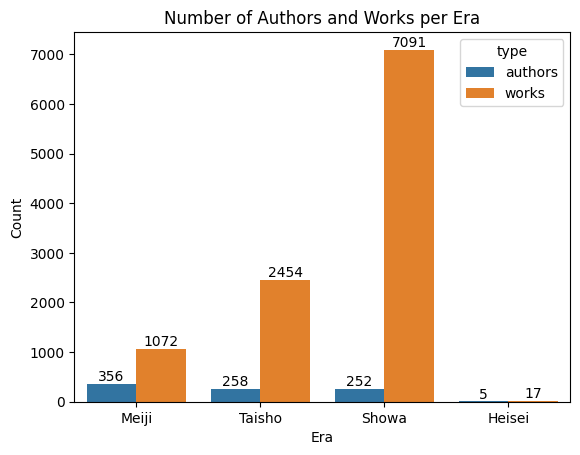

In [417]:
ax = sns.barplot(data=combined, x='bins', y='count', hue='type', errorbar=None,  estimator=np.sum)
plt.xlabel('Era')
plt.ylabel('Count')
plt.title('Number of Authors and Works per Era')
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Avoid labels for empty bars
        ax.text(
            p.get_x() + p.get_width() / 2.,  # X position (center of bar)
            height,                          # Y position (top of bar)
            f'{int(height)}',                # The count
            ha='center', va='bottom'
        )

plt.show()


Each author is uniquely counted and will only be in one distinct era.

In terms of `number of authors` per era, it should be cumulative as new, young authors join older authors.

In [418]:
eras = {
    'Meiji': (1868, 1912),
    'Taisho': (1912, 1926),
    'Showa': (1926, 1989),
    'Heisei': (1989, 2019)
}

def assign_eras(birth, death):
    if pd.isnull(death):  
        death = birth

    lived_eras = []
    
    for era, (start, end) in eras.items():
        if birth <= end and death >= start:
            lived_eras.append(era)
    
    return lived_eras

In [419]:
eras_author = authors[['birthYear', 'deathYear']]

In [420]:
eras_author['eras_lived'] = eras_author.apply(
    lambda row: assign_eras(row['birthYear'], row['deathYear']), axis=1
)

C:\Users\Jaden\AppData\Local\Temp\ipykernel_15716\399832303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eras_author['eras_lived'] = eras_author.apply(


In [421]:
exp = eras_author.explode('eras_lived')

era_author_count = pd.DataFrame(exp['eras_lived'].value_counts()).reset_index()

era_author_count = era_author_count.rename(columns={'eras_lived': 'bins'})

era_author_count

bins  count
0   Meiji    849
1  Taisho    810
2   Showa    748
3  Heisei      2

In [422]:
era_author_count['type'] = 'authors'

combined = pd.concat([era_author_count, era_count])

combined

bins count     type    year
0     Meiji   849  authors     NaN
1    Taisho   810  authors     NaN
2     Showa   748  authors     NaN
3    Heisei     2  authors     NaN
0     Meiji     2    works  1872.0
..      ...   ...      ...     ...
107  Heisei     1    works  1995.0
108  Heisei     2    works  1997.0
109  Heisei     3    works  2016.0
110  Heisei     3    works  2019.0
111  Heisei     3    works  2022.0

[116 rows x 4 columns]

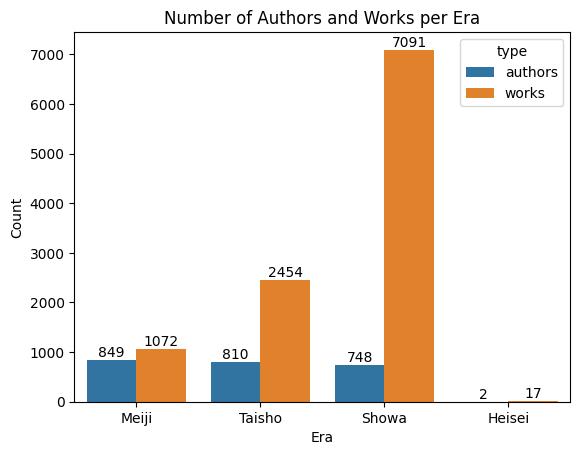

In [423]:
ax = sns.barplot(data=combined, x='bins', y='count', hue='type', errorbar=None,  estimator=np.sum)
plt.xlabel('Era')
plt.ylabel('Count')
plt.title('Number of Authors and Works per Era')
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Avoid labels for empty bars
        ax.text(
            p.get_x() + p.get_width() / 2.,  # X position (center of bar)
            height,                          # Y position (top of bar)
            f'{int(height)}',                # The count
            ha='center', va='bottom'
        )

plt.show()

Interesting that there are so many works in the Showa period relative to authors.

-  `Meiji` - 1.26 works / author
- `Taisho` - 3.03 works / author
- `Showa` - 9.48 works / author

#### author age

In [424]:
books['authorAge'].describe()

count    10560.000000
mean        42.386648
std         13.320445
min         12.000000
25%         32.000000
50%         41.000000
75%         51.000000
max         91.000000
Name: authorAge, dtype: float64

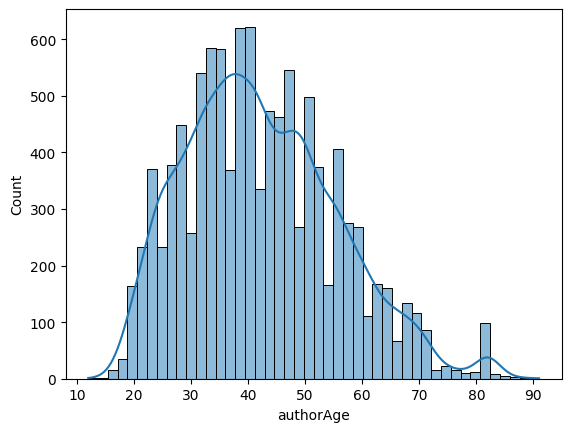

In [431]:
sns.histplot(books['authorAge'], kde=True);

In [441]:
eras = [0, 1867, 1912, 1926, 1989, 2019]
labels = ['Pre-Meiji', 'Meiji', 'Taisho', 'Showa', 'Heisei']

books['eras'] = pd.cut(books['inception'], eras, labels=labels)

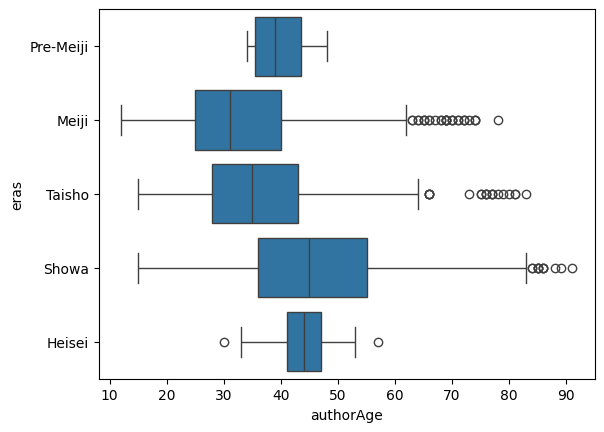

In [443]:
sns.boxplot(books, x='authorAge', y='eras');

In [451]:
authors = authors.rename(columns={'id': 'author_id'})

In [474]:
age_df = books[['author_id','authorAge']]

age_df = age_df.merge(authors[['author_id', 'first_work_age', 'birthYear', 'gender']], how='left', on='author_id')

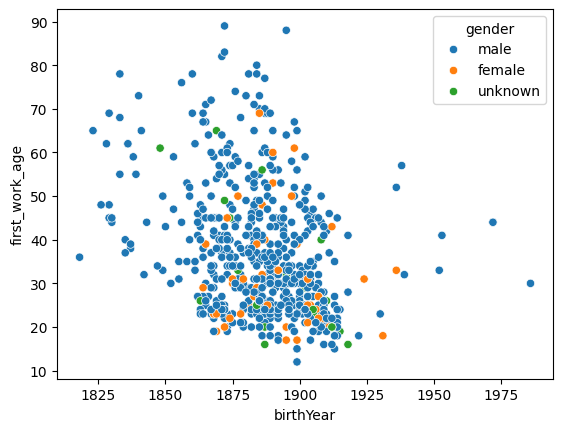

In [468]:
first_age_vs_birthYear = age_df.dropna().drop_duplicates(subset='author_id')


sns.scatterplot(first_age_vs_birthYear[first_age_vs_birthYear['birthYear'] > 1800], x='birthYear', y='first_work_age', hue='gender');

In [486]:
first_age_vs_birthYear.corr(numeric_only=True)

author_id  authorAge  first_work_age  birthYear
author_id        1.000000   0.202318        0.286191   0.044431
authorAge        0.202318   1.000000        0.829722  -0.219422
first_work_age   0.286191   0.829722        1.000000  -0.231743
birthYear        0.044431  -0.219422       -0.231743   1.000000

In [477]:
authorAge_v_birthYear = age_df.dropna(subset=['authorAge', 'birthYear'])

authorAge_v_birthYear

author_id  authorAge  first_work_age  birthYear gender
3           1245       41.0            41.0     1881.0   male
7           1245       43.0            41.0     1881.0   male
8           1245       41.0            41.0     1881.0   male
9           1245       71.0            41.0     1881.0   male
10          1245       67.0            41.0     1881.0   male
...          ...        ...             ...        ...    ...
17365       1395       46.0            18.0     1889.0   male
17366       1395       63.0            18.0     1889.0   male
17367       1395       32.0            18.0     1889.0   male
17368       1395       18.0            18.0     1889.0   male
17369       1395       58.0            18.0     1889.0   male

[10564 rows x 5 columns]

In [479]:
mean_author_age = authorAge_v_birthYear.groupby('author_id')['authorAge'].mean().reset_index()

mean_author_age.columns = ['author_id', 'mean_authorAge']

birthYears = authorAge_v_birthYear.groupby('author_id')['birthYear'].first().reset_index()

authorAge_v_birthYear = mean_author_age.merge(birthYears, on ='author_id', how='left')

authorAge_v_birthYear

author_id  mean_authorAge  birthYear
0            6           37.75     1864.0
1            8           32.50     1903.0
2           11           21.00     1914.0
3           12           21.50     1895.0
4           14           24.00     1896.0
..         ...             ...        ...
606       2214           53.00     1865.0
607       2231           55.00     1839.0
608       2237           46.00     1911.0
609       2238           48.00     1283.0
610       2402           50.00     1877.0

[611 rows x 3 columns]

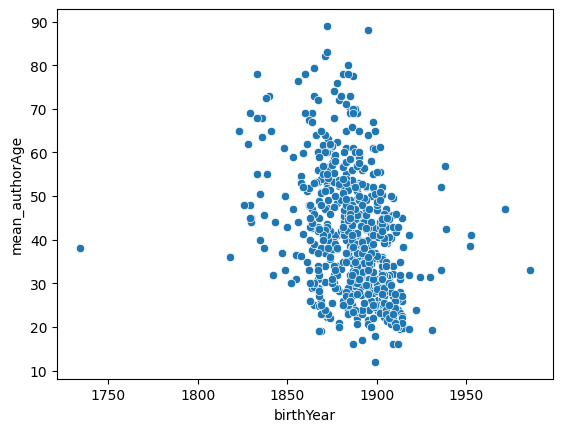

In [482]:
sns.scatterplot(authorAge_v_birthYear[authorAge_v_birthYear['birthYear']> 1700], x='birthYear', y='mean_authorAge');

In [483]:
authorAge_v_birthYear.corr()

author_id  mean_authorAge  birthYear
author_id        1.000000        0.214639   0.045459
mean_authorAge   0.214639        1.000000  -0.230167
birthYear        0.045459       -0.230167   1.000000

Not much correlation between author age or author age at the time of writing their first work, with birthYear.

#### Contextual data

##### death causes

In [5]:
death = pd.read_excel('./data/death_causes.xlsx')

death

year  deaths  tuberculosis_deaths  cancer_deaths  heart_disease_deaths  \
0    1899  2147.5                155.7           44.7                  48.6   
1    1900  2077.1                163.7           46.4                  48.1   
2    1901  2087.1                172.7           49.9                  49.3   
3    1902  2133.1                183.6           54.7                  53.0   
4    1903  2044.1                186.9           56.1                  52.0   
..    ...     ...                  ...            ...                   ...   
113  2012   997.5                  1.7          286.6                 157.9   
114  2013  1009.1                  1.7          290.3                 156.5   
115  2014  1014.9                  1.7          293.5                 157.0   
116  2015  1029.8                  1.6          295.5                 156.5   
117  2016  1046.4                  1.5          298.4                 158.4   

     brain_deaths  pneumonia_deaths  senility_deaths  accident_deaths  \
0           170.5              99.8            127.2             50.1   
1           159.2             102.3            131.0             45.3   
2           169.6             111.8            111.4             40.6   
3           166.7             119.0            117.4             44.6   
4           162.3             106.7            124.0             44.9   
..            ...               ...              ...              ...   
113          96.5              98.4             48.2             32.6   
114          94.1              97.8             55.5             31.5   
115          91.1              95.4             60.1             31.1   
116          89.4              96.5             67.7             30.6   
117          87.5              95.5             74.3             30.6   

     suicide_deaths  
0              13.7  
1              13.4  
2              17.7  
3              17.9  
4              19.4  
..              ...  
113            21.0  
114            20.7  
115            19.5  
116            18.5  
117            16.8  

[118 rows x 10 columns]

In [6]:
death.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  118 non-null    int64  
 1   deaths                115 non-null    float64
 2   tuberculosis_deaths   115 non-null    float64
 3   cancer_deaths         115 non-null    float64
 4   heart_disease_deaths  115 non-null    float64
 5   brain_deaths          115 non-null    float64
 6   pneumonia_deaths      115 non-null    float64
 7   senility_deaths       115 non-null    float64
 8   accident_deaths       115 non-null    float64
 9   suicide_deaths        115 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 9.3 KB


In [7]:
death.describe()

year       deaths  tuberculosis_deaths  cancer_deaths  \
count   118.000000   115.000000           115.000000     115.000000   
mean   1957.500000  1265.373913            94.866087     127.035652   
std      34.207699   639.732391            95.912000      73.360430   
min    1899.000000   597.300000             1.500000      44.700000   
25%    1928.250000   701.800000             3.250000      71.600000   
50%    1957.500000   907.500000            35.500000      98.200000   
75%    1986.750000  1972.550000           194.050000     166.300000   
max    2016.000000  2727.800000           257.100000     298.400000   

       heart_disease_deaths  brain_deaths  pneumonia_deaths  senility_deaths  \
count            115.000000    115.000000        115.000000       115.000000   
mean              87.621739    140.105217         98.877391        73.005217   
std               32.148744     28.391118         68.597682        45.882785   
min               48.100000     87.500000         21.900000        16.700000   
25%               62.900000    111.600000         38.850000        25.500000   
50%               71.900000    148.400000         85.000000        67.100000   
75%              114.100000    165.400000        149.100000       123.200000   
max              158.400000    183.300000        375.500000       149.900000   

       accident_deaths  suicide_deaths  
count       115.000000      115.000000  
mean         38.600870       19.143478  
std          10.992721        3.154366  
min          23.200000       12.100000  
25%          30.900000       17.150000  
50%          40.200000       18.800000  
75%          44.250000       21.000000  
max         122.700000       25.700000

In [8]:
nulls(death)

cols  null_count  % null
0                deaths           3   2.542
1   tuberculosis_deaths           3   2.542
2      pneumonia_deaths           3   2.542
3         cancer_deaths           3   2.542
4  heart_disease_deaths           3   2.542
5          brain_deaths           3   2.542
6       accident_deaths           3   2.542
7       senility_deaths           3   2.542
8        suicide_deaths           3   2.542
9                  year           0   0.000

In [9]:
death[death.isnull().any(axis=1)]

year  deaths  tuberculosis_deaths  cancer_deaths  heart_disease_deaths  \
45  1944     NaN                  NaN            NaN                   NaN   
46  1945     NaN                  NaN            NaN                   NaN   
47  1946     NaN                  NaN            NaN                   NaN   

    brain_deaths  pneumonia_deaths  senility_deaths  accident_deaths  \
45           NaN               NaN              NaN              NaN   
46           NaN               NaN              NaN              NaN   
47           NaN               NaN              NaN              NaN   

    suicide_deaths  
45             NaN  
46             NaN  
47             NaN

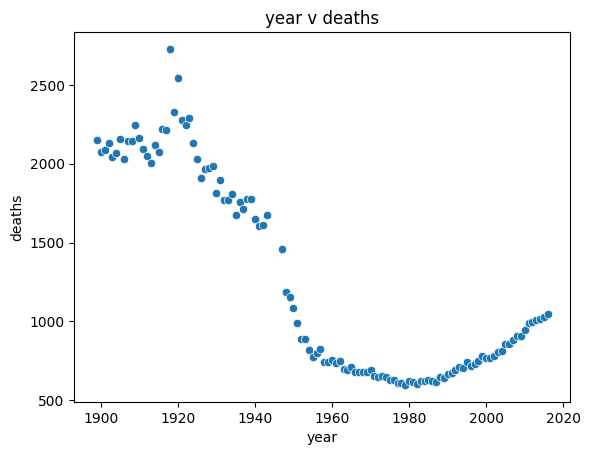

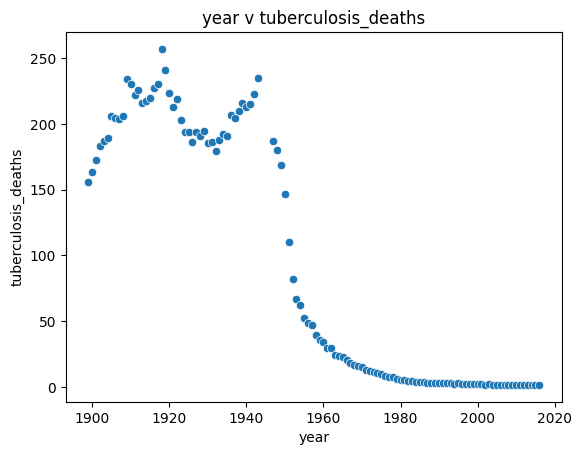

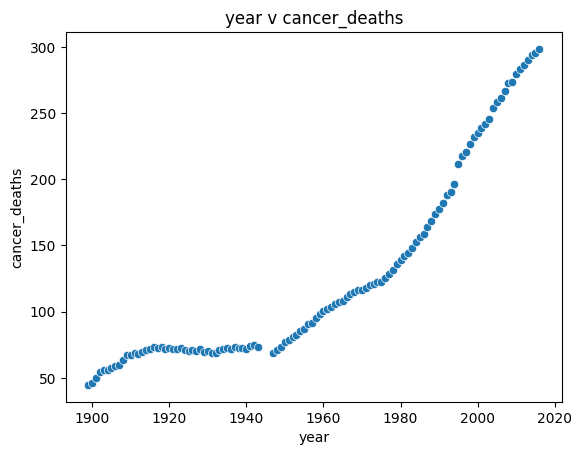

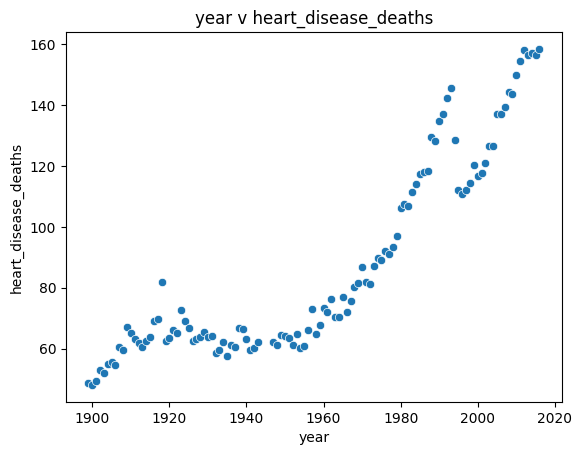

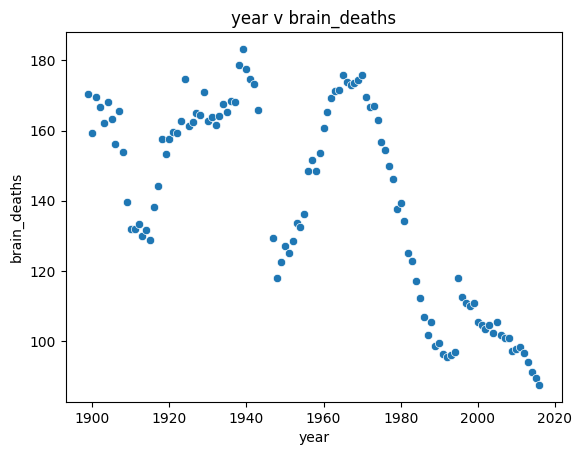

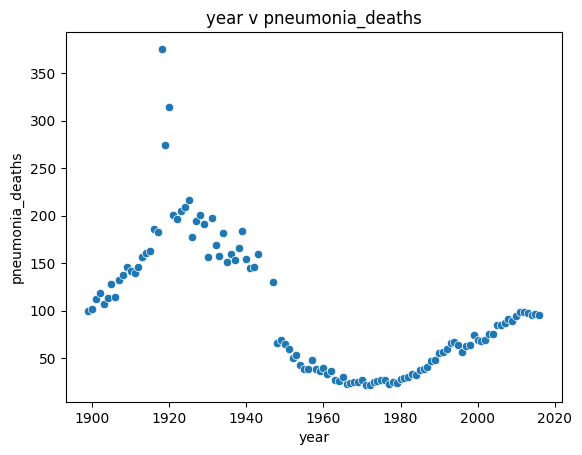

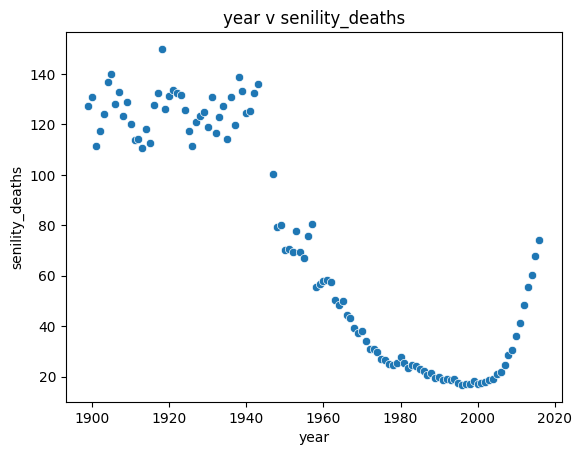

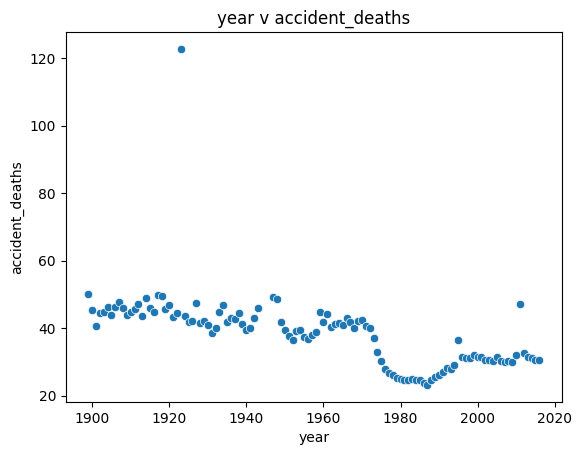

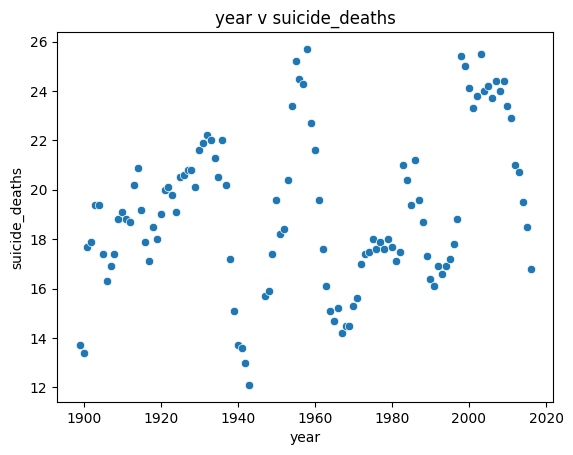

In [10]:
y = death.drop(columns='year').columns.to_list()

for column in y:
    plt.figure()
    sns.scatterplot(death, x='year', y=column)
    plt.title(f'year v {column}')
    plt.show()

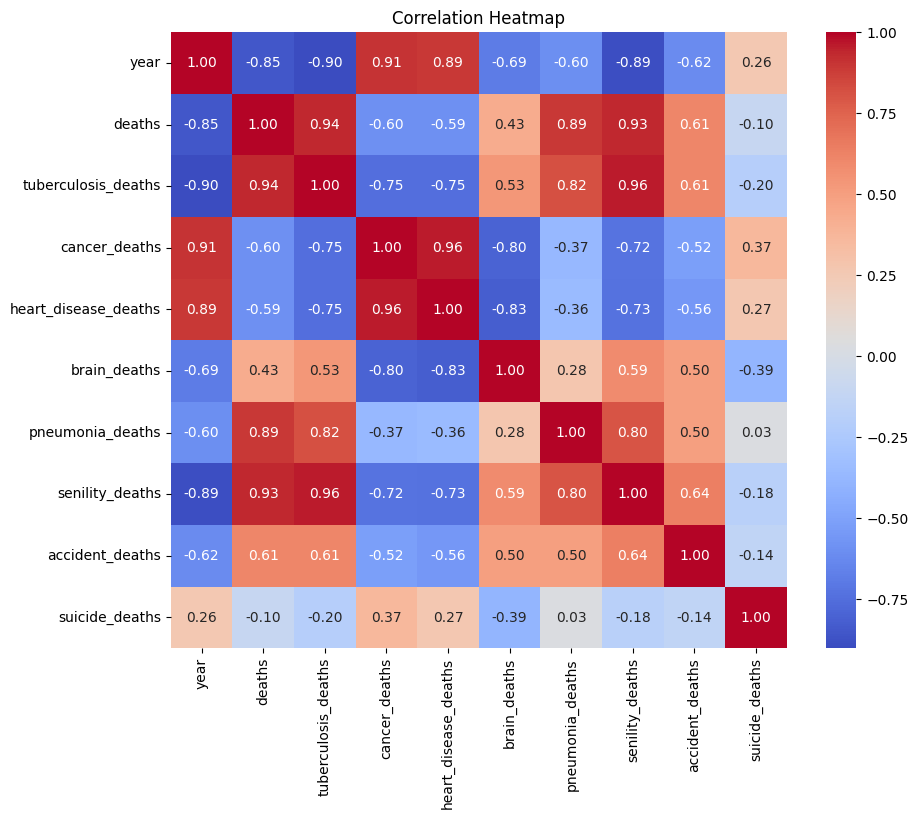

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(death.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Heatmap')
plt.show()

A negative correlation with `deaths` would indicate that as death rate decreases, the percentage of deaths due to that specific cause increases. Likely due to other deaths being prevented by technological and health advancements, but with less results in these cases -- like cancer.

examining suicide a bit more

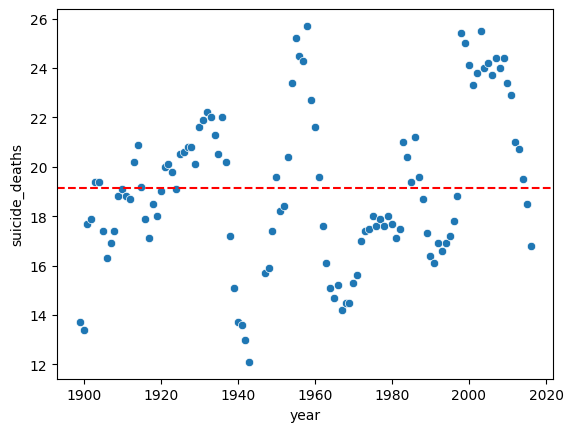

In [12]:
ax = sns.scatterplot(death, x='year', y='suicide_deaths');
ax.axhline(y=death['suicide_deaths'].mean(), color='red', ls='--');


Looks like `suicide` data shows cyclic behavior.

I'm interested if this will lead to any trends involving sentiment with years where there is a particularly large amount of suicide.

##### economy

In [13]:
econ = pd.read_csv('./data/econ.csv')
econ

year          max     jp  percentage       WPI
0    1887   7383.00000   1848       25.02      8.85
1    1888   7179.00000   1724       24.01      9.24
2    1889   7567.00000   1755       23.19      9.66
3    1890   7106.00000   1854       26.08     10.12
4    1891   7438.00000   1750       23.52      9.40
..    ...          ...    ...         ...       ...
111  1998  48956.72933  32558       66.50  21466.78
112  1999  51129.18288  32395       63.36  21152.95
113  2000  54039.96073  33211       61.46  21171.30
114  2001  56578.37709  33246       58.76  20980.44
115  2002  58840.41421  33195       56.42  20775.56

[116 rows x 5 columns]

In [14]:
econ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        116 non-null    int64  
 1   max         116 non-null    float64
 2   jp          116 non-null    int64  
 3   percentage  116 non-null    float64
 4   WPI         116 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 4.7 KB


In [15]:
econ.describe()

year           max            jp  percentage           WPI
count   116.000000    116.000000    116.000000  116.000000    116.000000
mean   1944.500000  27211.222195  10046.922414   34.626638   7842.257155
std      33.630343  19477.797326  10508.948057   19.625648   9239.992932
min    1887.000000   6834.249600   1724.000000    6.320000      8.850000
25%    1915.750000   9912.437541   2661.250000   23.655000     22.995000
50%    1944.500000  14778.349295   3965.000000   28.615000     85.215000
75%    1973.250000  46685.359422  17844.250000   39.742500  14949.390000
max    2002.000000  68407.000000  33246.000000   80.980000  24447.200000

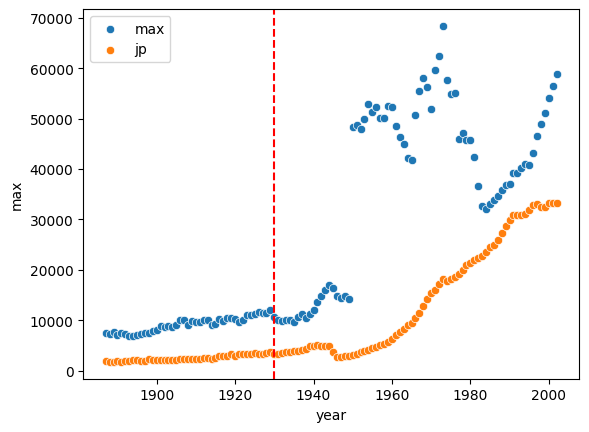

In [16]:
for gdp in ['max', 'jp']:
    sns.scatterplot(econ, x='year', y=gdp, label=gdp)

plt.legend(loc='upper left');
plt.axvline(x=1930, color='red', linestyle='--');

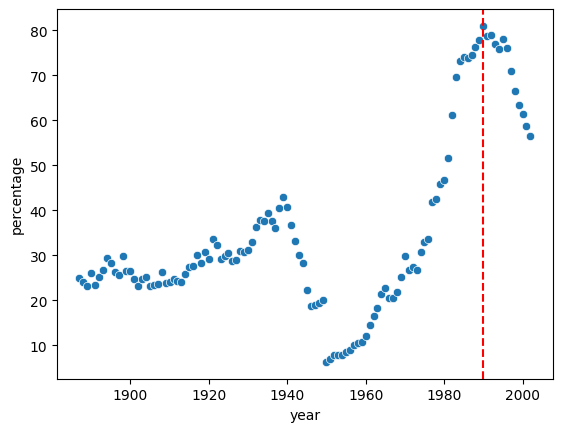

In [17]:
sns.scatterplot(econ, x='year', y='percentage');
plt.axvline(x=1990, color='red', linestyle='--');

- relative economy peaks at around 1990
- Great Depression has little effect on economy
- economy plummets at the end of WWII.

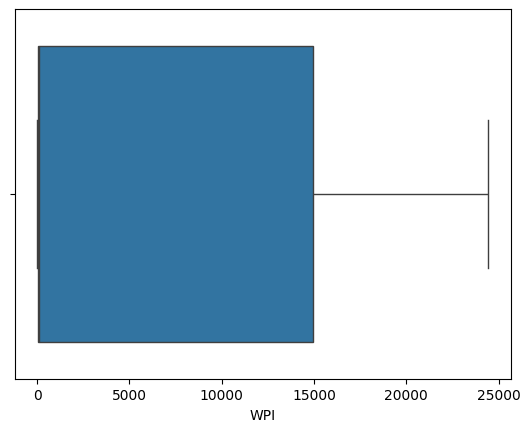

In [18]:
sns.boxplot(econ, x='WPI');

In [19]:
econ['log_WPI'] = np.log(econ['WPI'])

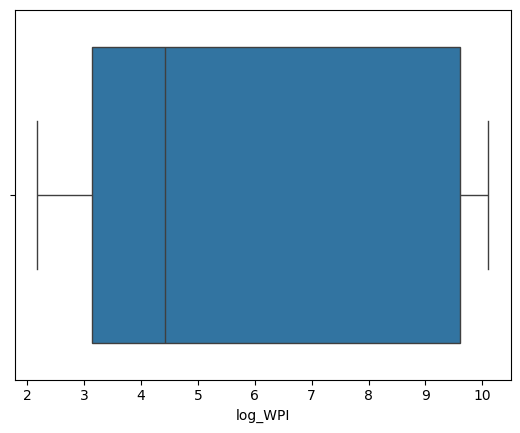

In [20]:
sns.boxplot(econ, x='log_WPI');

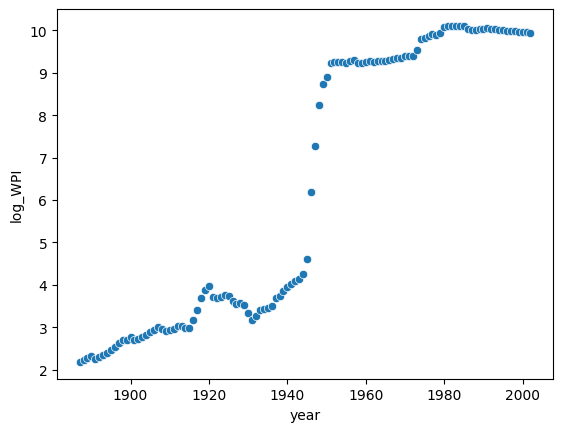

In [21]:
sns.scatterplot(econ, x='year', y='log_WPI');

Looks like an s-curve

In [22]:
econ = econ.rename(columns={'percentage': 'GDP_percentage_of_max'})

In [23]:
education = pd.read_csv('./data/education.csv')

education.head()

year       none    primary  secondary  lower_secondary  upper_secondary  \
0  1900  36.217556  55.839537   7.865229              NaN              NaN   
1  1905  31.123931  57.770766  10.968236              NaN              NaN   
2  1910  26.247187  58.803364  14.712910              NaN              NaN   
3  1915  21.647524  58.786248  19.183543              NaN              NaN   
4  1920  17.452955  57.627954  24.328422              NaN              NaN   

   post_secondary  none_female  none_male  primary_female  primary_male  \
0        0.077678    60.673679  12.173009       32.389327     78.895100   
1        0.137067    52.828081   9.772977       36.636685     78.560929   
2        0.236540    45.070201   7.739627       40.042395     77.249917   
3        0.382686    37.535247   5.940838       42.493941     74.892906   
4        0.590669    30.432944   4.416979       43.889907     71.425257   

   secondary_female  secondary_male  lower_secondary_female  \
0          6.900828        8.813400                     NaN   
1         10.460657       11.467554                     NaN   
2         14.746344       14.680036                     NaN   
3         19.731445       18.641885                     NaN   
4         25.300715       23.351935                     NaN   

   lower_secondary_male  upper_secondary_female  upper_secondary_male  \
0                   NaN                     NaN                   NaN   
1                   NaN                     NaN                   NaN   
2                   NaN                     NaN                   NaN   
3                   NaN                     NaN                   NaN   
4                   NaN                     NaN                   NaN   

   post_secondary_female  post_secondary_male  
0               0.036166             0.118491  
1               0.074577             0.198540  
2               0.141059             0.330420  
3               0.239367             0.524371  
4               0.376434             0.805829

In [24]:
### more EDA is done in `edu.ipynb`

education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    23 non-null     int64  
 1   none                    23 non-null     float64
 2   primary                 23 non-null     float64
 3   secondary               11 non-null     float64
 4   lower_secondary         12 non-null     float64
 5   upper_secondary         12 non-null     float64
 6   post_secondary          23 non-null     float64
 7   none_female             23 non-null     float64
 8   none_male               23 non-null     float64
 9   primary_female          23 non-null     float64
 10  primary_male            23 non-null     float64
 11  secondary_female        11 non-null     float64
 12  secondary_male          11 non-null     float64
 13  lower_secondary_female  12 non-null     float64
 14  lower_secondary_male    12 non-null     floa

In [25]:
nulls(education)

cols  null_count  % null
0           secondary_male          12  52.174
1         secondary_female          12  52.174
2                secondary          12  52.174
3     upper_secondary_male          11  47.826
4   lower_secondary_female          11  47.826
5          upper_secondary          11  47.826
6          lower_secondary          11  47.826
7     lower_secondary_male          11  47.826
8   upper_secondary_female          11  47.826
9                     year           0   0.000
10                    none           0   0.000
11                 primary           0   0.000
12            primary_male           0   0.000
13               none_male           0   0.000
14             none_female           0   0.000
15          post_secondary           0   0.000
16          primary_female           0   0.000
17   post_secondary_female           0   0.000
18     post_secondary_male           0   0.000

In [26]:
education[['secondary', 'lower_secondary', 'upper_secondary']]

secondary  lower_secondary  upper_secondary
0    7.865229              NaN              NaN
1   10.968236              NaN              NaN
2   14.712910              NaN              NaN
3   19.183543              NaN              NaN
4   24.328422              NaN              NaN
5   29.891116              NaN              NaN
6   35.673502              NaN              NaN
7   41.137216              NaN              NaN
8   46.853876              NaN              NaN
9   52.607837              NaN              NaN
10  57.411453              NaN              NaN
11        NaN        38.120301        23.527451
12        NaN        37.960919        27.424389
13        NaN        37.444367        31.346791
14        NaN        35.022095        36.154766
15        NaN        32.799456        39.702665
16        NaN        31.008723        42.261529
17        NaN        29.025099        44.157640
18        NaN        27.059059        45.255588
19        NaN        24.105833        46.383012
20        NaN        21.600377        46.517665
21        NaN        19.447674        46.356663
22        NaN        17.623908        46.080227

Looks like secondary is just split between lower and upper.

In [27]:
sum = education['lower_secondary'] + education['upper_secondary']

education['secondary'] = education['secondary'].combine_first(sum)

In [28]:
sum = education['lower_secondary_female'] + education['upper_secondary_female']

education['secondary_female'] = education['secondary_female'].combine_first(sum)

education['secondary_male'] = education['secondary_male'].combine_first(education['lower_secondary_male'] + education['upper_secondary_male'])


In [29]:
drop = education.columns.str.contains('lower|upper')

In [30]:
education = education.loc[:, ~drop]


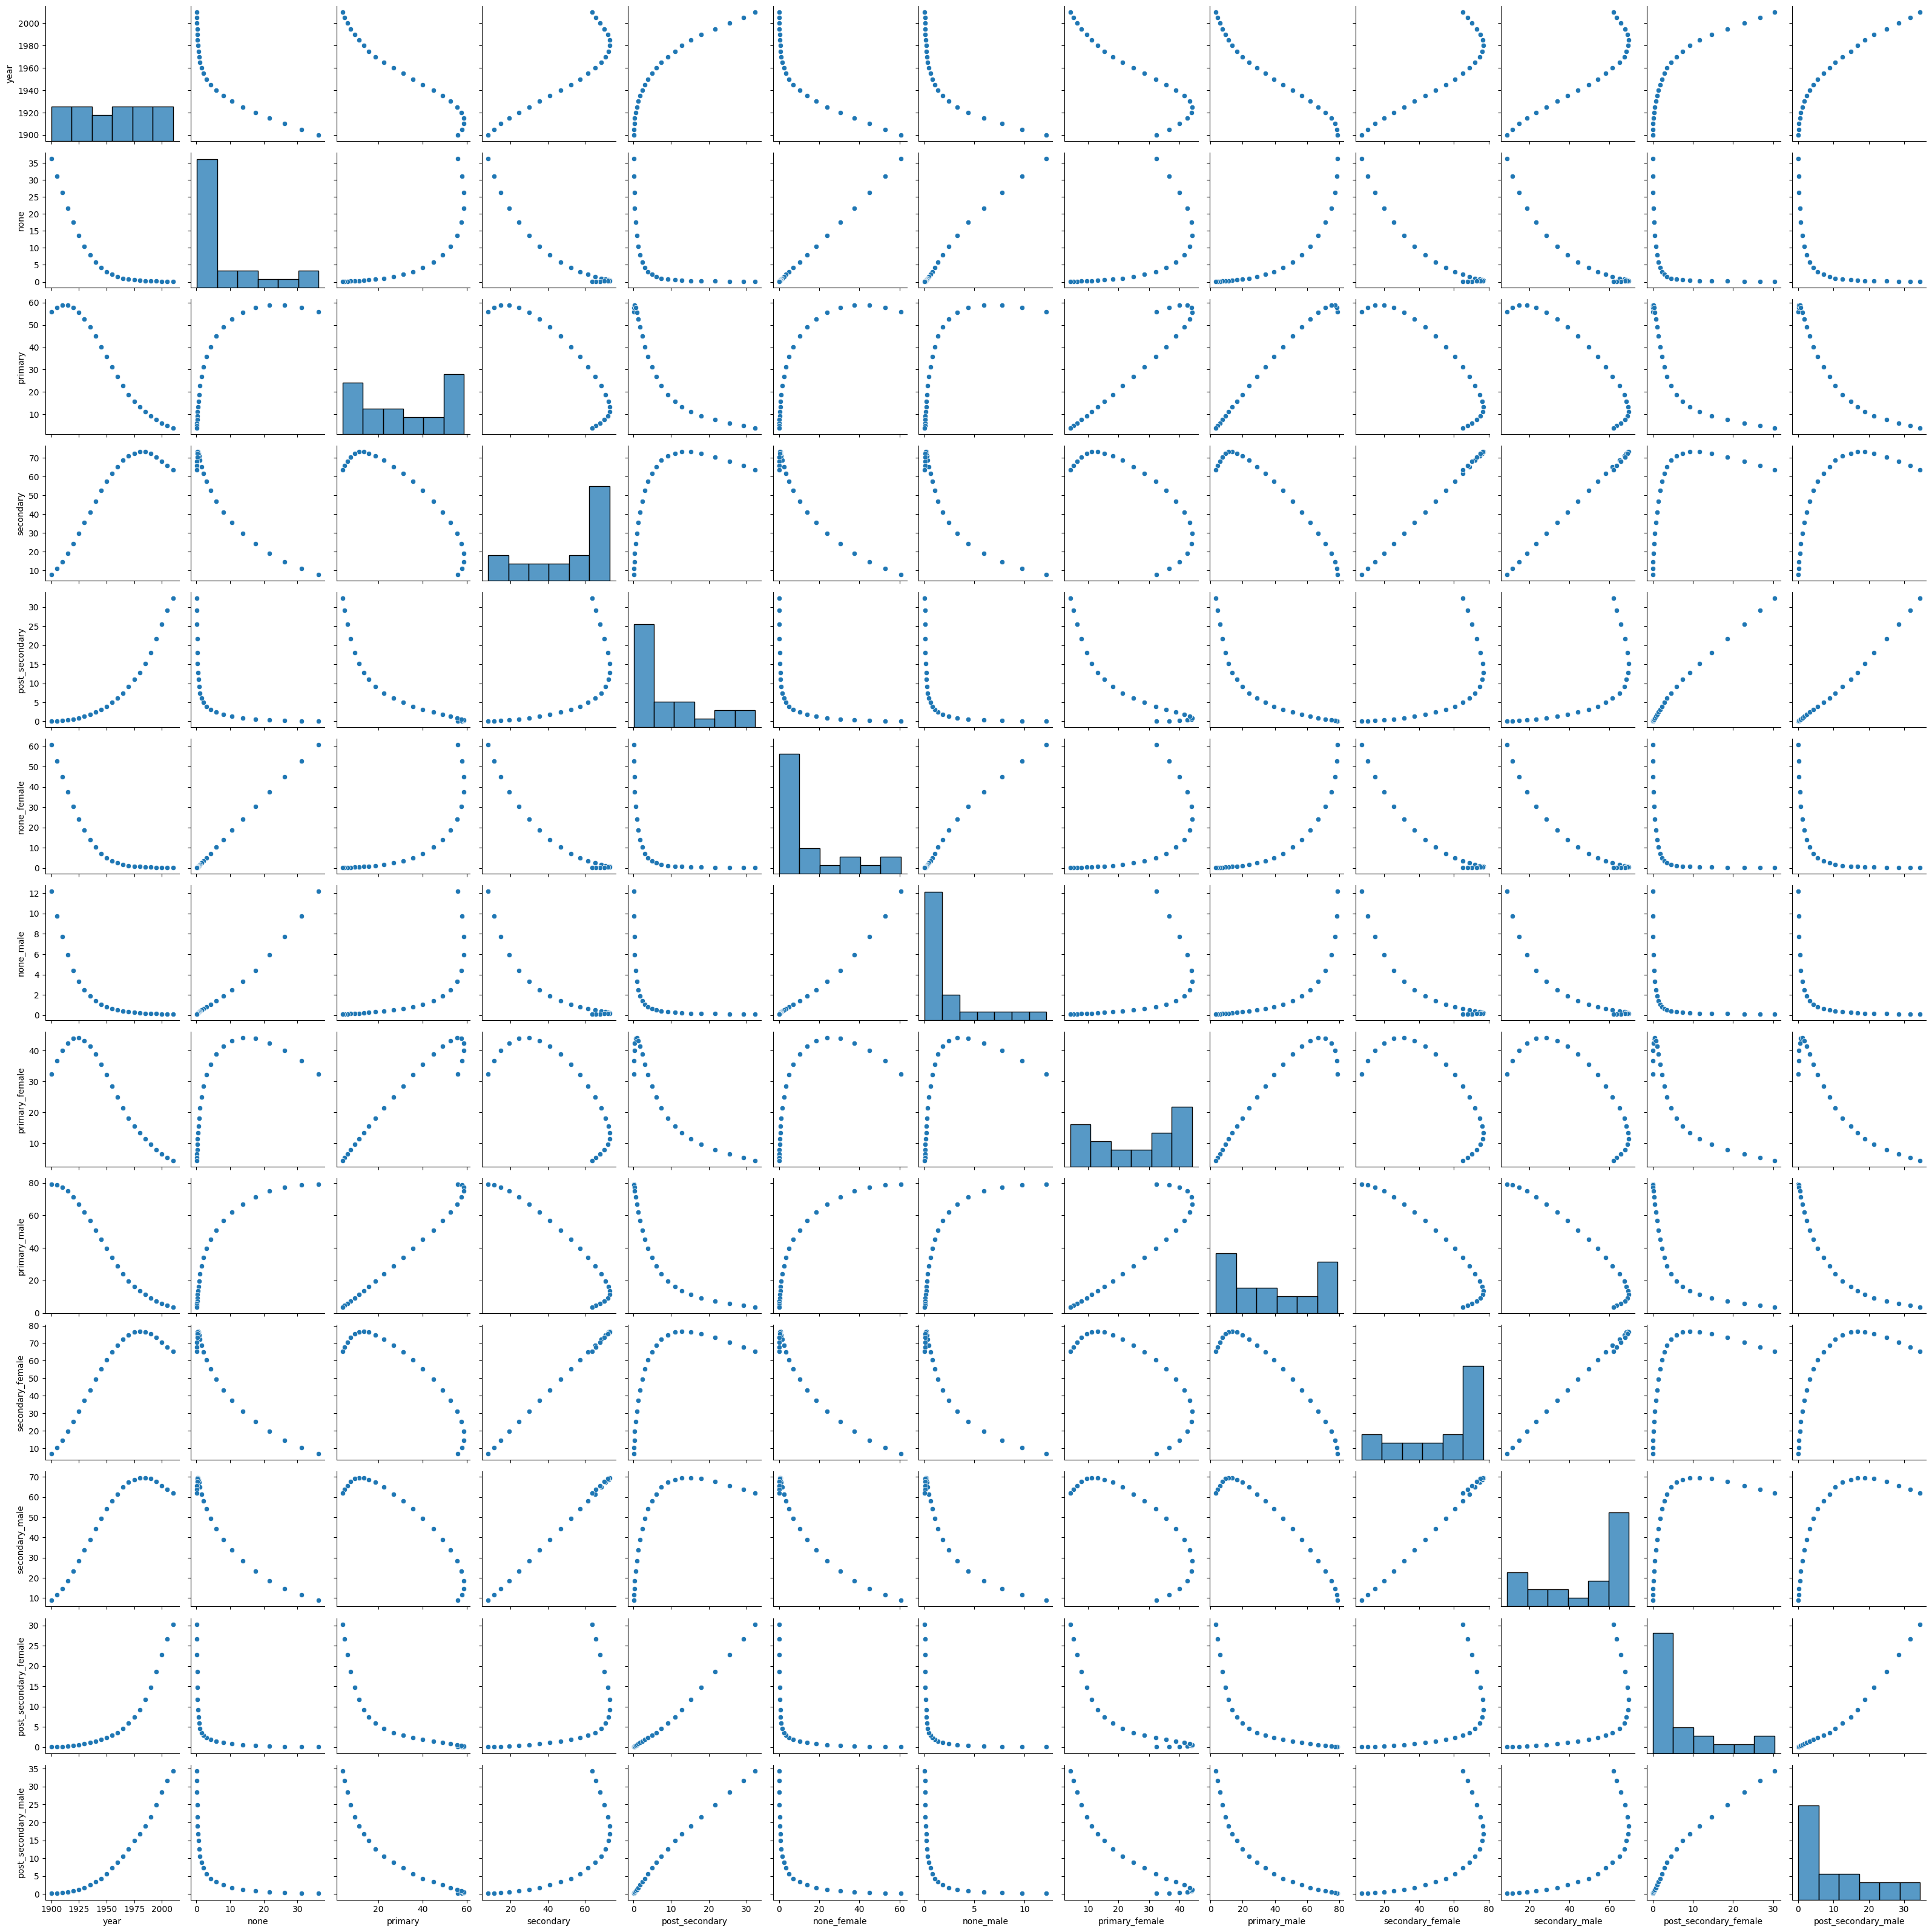

In [31]:
sns.pairplot(education);

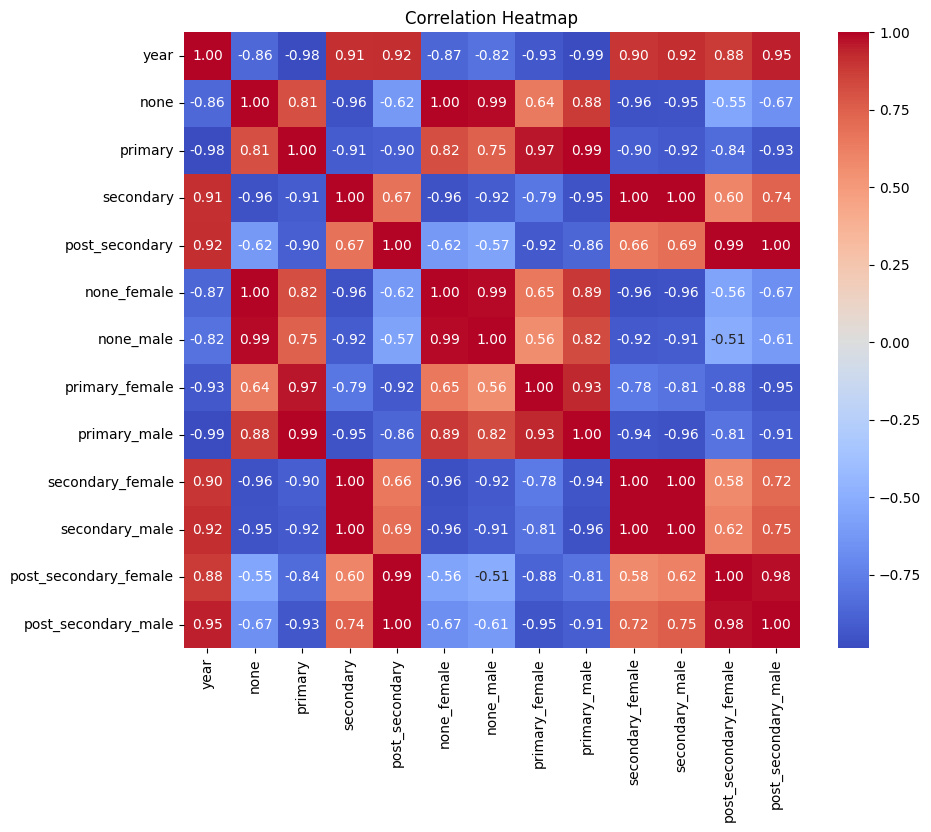

In [32]:
plt.figure(figsize=(10, 8))
sns.heatmap(education.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Heatmap')
plt.show()

- "early" levels of education (`none`, `primary`) are inversely proportionate to higher levels of education (`secondary`, `post-secondary`.)
- as the data describes the *highest* level of education attained for the population 15+ years old, as years increase, most of the lower levels of education will decrease. This is even for the case of `secondary` (middle and high school), as more of the population pursue university.

interpolation to impute missing years

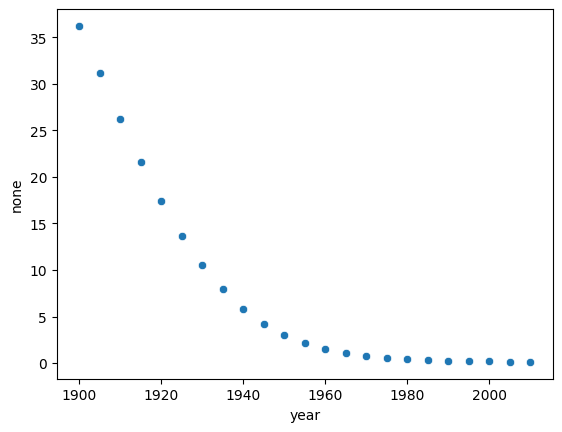

In [33]:
### only in intervalso of 5 (1900, 1905, 1910,..., 2010)

sns.scatterplot(education, x='year', y='none');

In [34]:
edu = pd.DataFrame({
    'year': np.arange(1900, 2011)
})

edu = edu.merge(education, how='left', on='year')
edu

year       none    primary  secondary  post_secondary  none_female  \
0    1900  36.217556  55.839537   7.865229        0.077678    60.673679   
1    1901        NaN        NaN        NaN             NaN          NaN   
2    1902        NaN        NaN        NaN             NaN          NaN   
3    1903        NaN        NaN        NaN             NaN          NaN   
4    1904        NaN        NaN        NaN             NaN          NaN   
..    ...        ...        ...        ...             ...          ...   
106  2006        NaN        NaN        NaN             NaN          NaN   
107  2007        NaN        NaN        NaN             NaN          NaN   
108  2008        NaN        NaN        NaN             NaN          NaN   
109  2009        NaN        NaN        NaN             NaN          NaN   
110  2010   0.123425   3.888658  63.704135       32.283781     0.142444   

     none_male  primary_female  primary_male  secondary_female  \
0    12.173009       32.389327     78.895100          6.900828   
1          NaN             NaN           NaN               NaN   
2          NaN             NaN           NaN               NaN   
3          NaN             NaN           NaN               NaN   
4          NaN             NaN           NaN               NaN   
..         ...             ...           ...               ...   
106        NaN             NaN           NaN               NaN   
107        NaN             NaN           NaN               NaN   
108        NaN             NaN           NaN               NaN   
109        NaN             NaN           NaN               NaN   
110   0.103083        4.281867      3.468109         65.294407   

     secondary_male  post_secondary_female  post_secondary_male  
0          8.813400               0.036166             0.118491  
1               NaN                    NaN                  NaN  
2               NaN                    NaN                  NaN  
3               NaN                    NaN                  NaN  
4               NaN                    NaN                  NaN  
..              ...                    ...                  ...  
106             NaN                    NaN                  NaN  
107             NaN                    NaN                  NaN  
108             NaN                    NaN                  NaN  
109             NaN                    NaN                  NaN  
110       62.003284              30.281282            34.425524  

[111 rows x 13 columns]

In [35]:
edu.interpolate(limit_direction="both",inplace=True)


In [36]:
edu.head(6)

year       none    primary  secondary  post_secondary  none_female  \
0  1900  36.217556  55.839537   7.865229        0.077678    60.673679   
1  1901  35.198831  56.225783   8.485831        0.089555    59.104559   
2  1902  34.180106  56.612029   9.106432        0.101433    57.535440   
3  1903  33.161381  56.998275   9.727033        0.113311    55.966320   
4  1904  32.142656  57.384520  10.347635        0.125189    54.397201   
5  1905  31.123931  57.770766  10.968236        0.137067    52.828081   

   none_male  primary_female  primary_male  secondary_female  secondary_male  \
0  12.173009       32.389327     78.895100          6.900828        8.813400   
1  11.693003       33.238798     78.828266          7.612794        9.344231   
2  11.212996       34.088270     78.761431          8.324760        9.875062   
3  10.732990       34.937742     78.694597          9.036726       10.405893   
4  10.252983       35.787213     78.627763          9.748692       10.936724   
5   9.772977       36.636685     78.560929         10.460657       11.467554   

   post_secondary_female  post_secondary_male  
0               0.036166             0.118491  
1               0.043848             0.134500  
2               0.051530             0.150510  
3               0.059212             0.166520  
4               0.066894             0.182530  
5               0.074577             0.198540

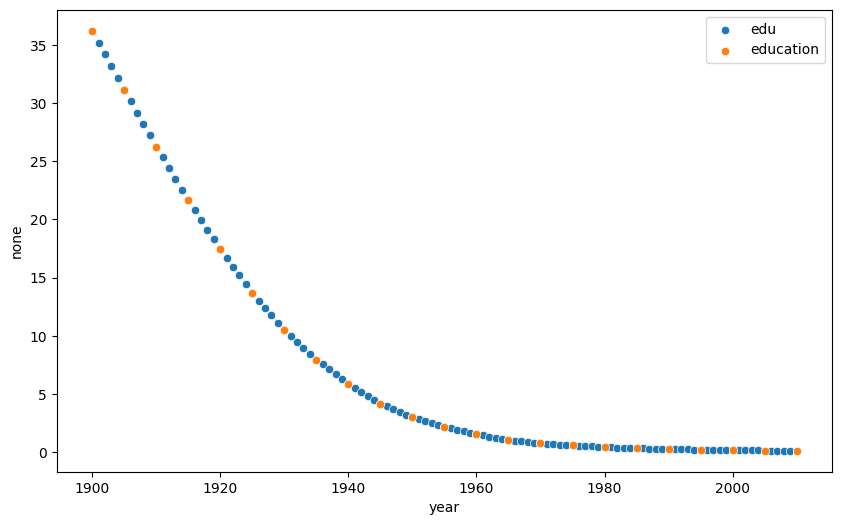

In [37]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=edu, x='year', y='none', label='edu')
sns.scatterplot(data=education, x='year', y='none', label='education')

plt.legend()
plt.show()

##### Urbanization

In [38]:
urb = pd.read_excel('./data/urbanization.xlsx')

urb

year  percent
0   1868    10.00
1   1900    12.00
2   1910    15.00
3   1920    18.00
4   1921    19.00
..   ...      ...
84  2016    91.46
85  2017    91.54
86  2018    91.62
87  2019    91.70
88  2020    91.78

[89 rows x 2 columns]

In [39]:
urb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     89 non-null     int64  
 1   percent  89 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.5 KB


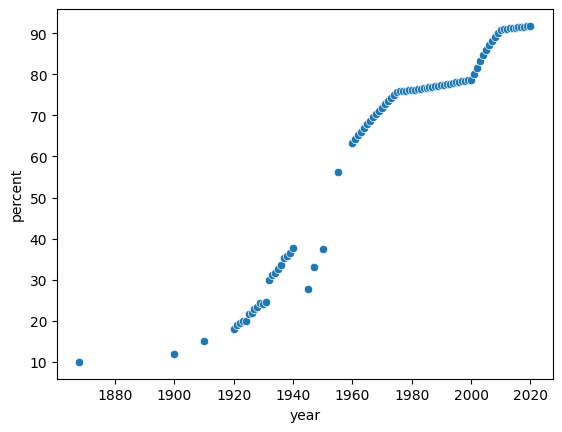

In [40]:
sns.scatterplot(urb, x='year', y='percent');

Hm. A lot of missing years.

In [41]:
urban = pd.DataFrame({
    'year': np.arange(1900, 2021, 1)
})

urban = urban.merge(urb, how='left', on='year')

urban

year  percent
0    1900    12.00
1    1901      NaN
2    1902      NaN
3    1903      NaN
4    1904      NaN
..    ...      ...
116  2016    91.46
117  2017    91.54
118  2018    91.62
119  2019    91.70
120  2020    91.78

[121 rows x 2 columns]

In [42]:
nulls(urban)

cols  null_count  % null
0  percent          33  27.273
1     year           0   0.000

In [43]:
urban[urban['percent'].isna()] # 1901 - 1919  values are missing. only 5 year intervals from 1940 - 1960.

year  percent
1   1901      NaN
2   1902      NaN
3   1903      NaN
4   1904      NaN
5   1905      NaN
6   1906      NaN
7   1907      NaN
8   1908      NaN
9   1909      NaN
11  1911      NaN
12  1912      NaN
13  1913      NaN
14  1914      NaN
15  1915      NaN
16  1916      NaN
17  1917      NaN
18  1918      NaN
19  1919      NaN
41  1941      NaN
42  1942      NaN
43  1943      NaN
44  1944      NaN
46  1946      NaN
48  1948      NaN
49  1949      NaN
51  1951      NaN
52  1952      NaN
53  1953      NaN
54  1954      NaN
56  1956      NaN
57  1957      NaN
58  1958      NaN
59  1959      NaN

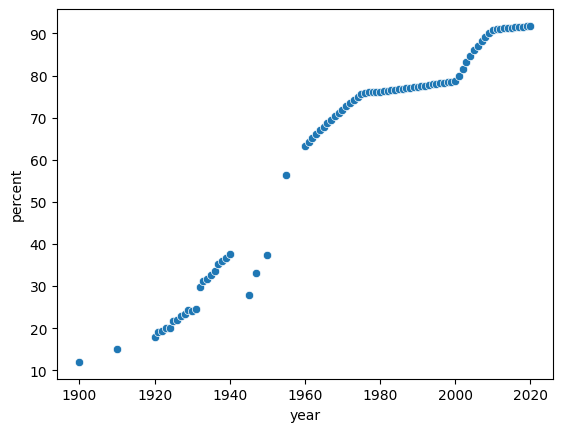

In [44]:
sns.scatterplot(urban, x='year', y = 'percent');

In [45]:
m = (urban['year'] >= 1900) & (urban['year'] <= 1920)

urban.loc[m, 'percent'] = urban.loc[m, 'percent'].interpolate(limit_direction='both')

<Axes: xlabel='year', ylabel='percent'>

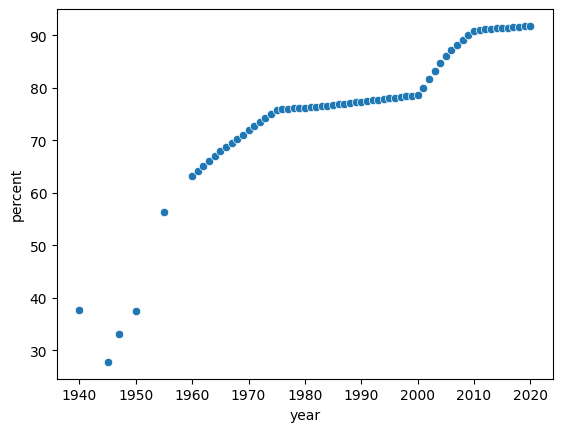

In [46]:
sns.scatterplot(urban[urban['year'] >= 1940], x='year', y='percent')

In [47]:
### Japan enters the war at 1941, and atomic bombs are dropped on 1945. 
### U.S. does not invade Japan until 1945, so I am assuming there are negligible changes to urbanization until the atomic bomb is dropped.

m = (urban['year'] >= 1940) & (urban['year'] < 1945)

urban.loc[m, 'percent'] = urban.loc[m, 'percent'].fillna(method='ffill')

C:\Users\Jaden\AppData\Local\Temp\ipykernel_10448\3838160807.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  urban.loc[m, 'percent'] = urban.loc[m, 'percent'].fillna(method='ffill')


In [48]:
m = (urban['year'] >= 1945) & (urban['year'] <= 1950)

urban.loc[m, 'percent'] = urban.loc[m, 'percent'].interpolate(limit_direction='both')

urban.loc[m]

year    percent
45  1945  27.800000
46  1946  30.450000
47  1947  33.100000
48  1948  34.566667
49  1949  36.033333
50  1950  37.500000

In [49]:
urban = urban.interpolate(limit_direction='both')

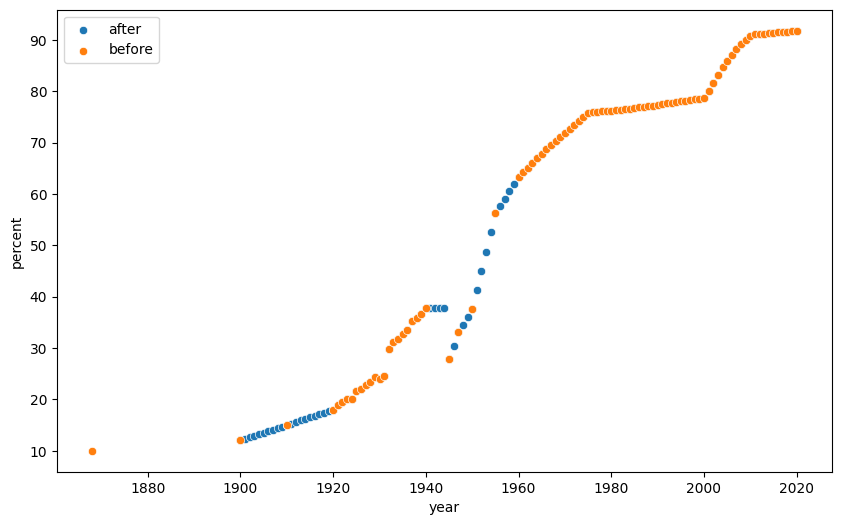

In [50]:
plt.figure(figsize=(10, 6))


sns.scatterplot(data=urban, x='year', y='percent', label='after')
sns.scatterplot(data=urb, x='year', y='percent', label='before')

plt.legend()
plt.show()

In [51]:
nulls(urban)

cols  null_count  % null
0     year           0     0.0
1  percent           0     0.0

In [52]:
urban = urban.rename(columns={'percent': 'urban_percent'})

##### Vital

In [53]:
vital = pd.read_excel('./data/vital.xlsx')

vital.head()

year  live_birth  death  infant_mortality  neonatal_mortality  \
0  1899        32.0   21.5             153.8                77.9   
1  1900        32.4   20.8             155.0                79.0   
2  1901        33.9   20.9             149.9                77.1   
3  1902        33.6   21.3             154.0                77.2   
4  1903        32.7   20.4             152.4                75.8   

   foetal_death  marriage  divorce  
0          89.1       6.9     1.53  
1          88.5       7.9     1.46  
2          93.8       8.5     1.43  
3          94.5       8.8     1.43  
4          93.6       8.1     1.44

In [54]:
nulls(vital)

cols  null_count  % null
0          live_birth           3     2.4
1               death           3     2.4
2    infant_mortality           3     2.4
3  neonatal_mortality           3     2.4
4            marriage           3     2.4
5        foetal_death           3     2.4
6             divorce           3     2.4
7                year           0     0.0

In [55]:
vital[vital.isnull().any(axis=1)]

year  live_birth  death  infant_mortality  neonatal_mortality  \
45  1944         NaN    NaN               NaN                 NaN   
46  1945         NaN    NaN               NaN                 NaN   
47  1946         NaN    NaN               NaN                 NaN   

    foetal_death  marriage  divorce  
45           NaN       NaN      NaN  
46           NaN       NaN      NaN  
47           NaN       NaN      NaN

In [56]:
vital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                125 non-null    int64  
 1   live_birth          122 non-null    float64
 2   death               122 non-null    float64
 3   infant_mortality    122 non-null    float64
 4   neonatal_mortality  122 non-null    float64
 5   foetal_death        122 non-null    float64
 6   marriage            122 non-null    float64
 7   divorce             122 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 7.9 KB


In [57]:
vital.describe()

year  live_birth       death  infant_mortality  \
count   125.000000  122.000000  122.000000        122.000000   
mean   1961.000000   20.824590   12.600820         61.501639   
std      36.228442   10.534323    6.214931         65.237253   
min    1899.000000    6.000000    6.000000          1.700000   
25%    1930.000000    9.825000    7.100000          4.325000   
50%    1961.000000   18.600000    9.950000         24.800000   
75%    1992.000000   32.375000   19.075000        136.000000   
max    2023.000000   36.200000   27.300000        188.600000   

       neonatal_mortality  foetal_death    marriage     divorce  
count          122.000000    122.000000  122.000000  122.000000  
mean            27.863115     57.034426    7.641803    1.229180  
std             28.510596     25.171697    1.754326    0.441295  
min              0.800000     19.300000    3.900000    0.630000  
25%              2.325000     37.175000    6.125000    0.845000  
50%             14.550000     51.700000    7.900000    1.150000  
75%             53.575000     78.125000    9.000000    1.507500  
max             81.300000    101.700000   12.000000    2.300000

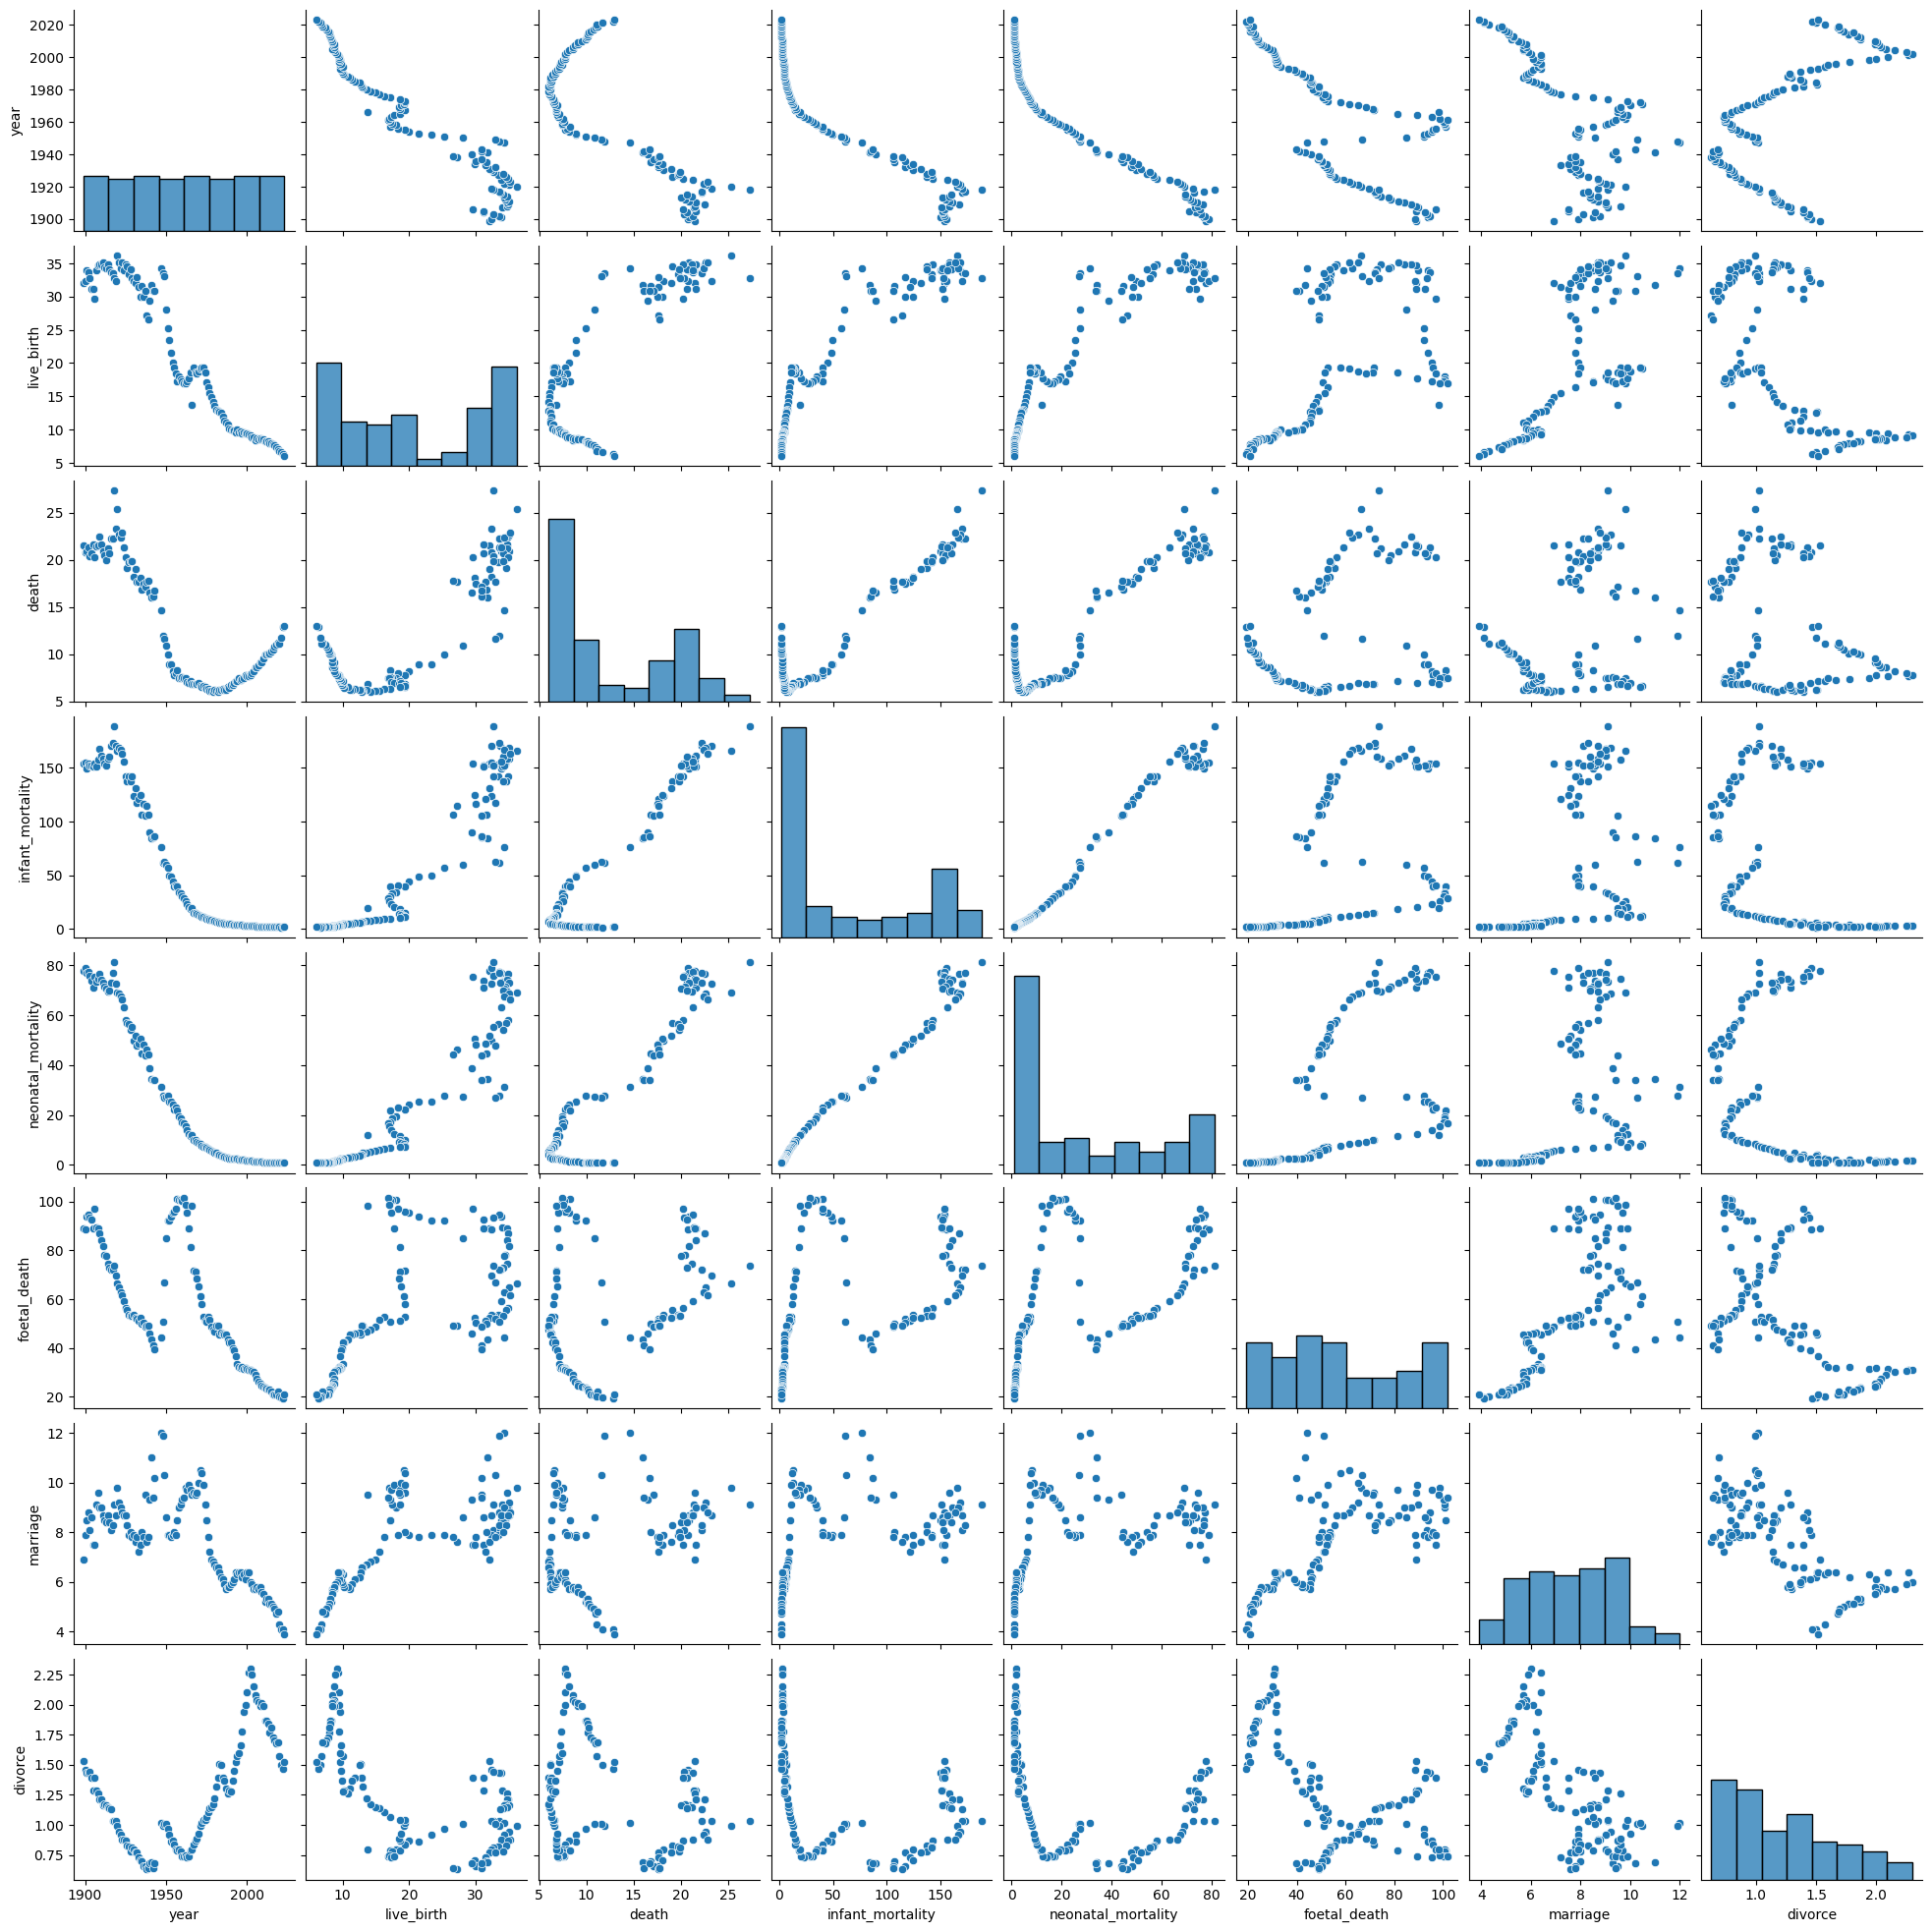

In [58]:
sns.pairplot(vital);

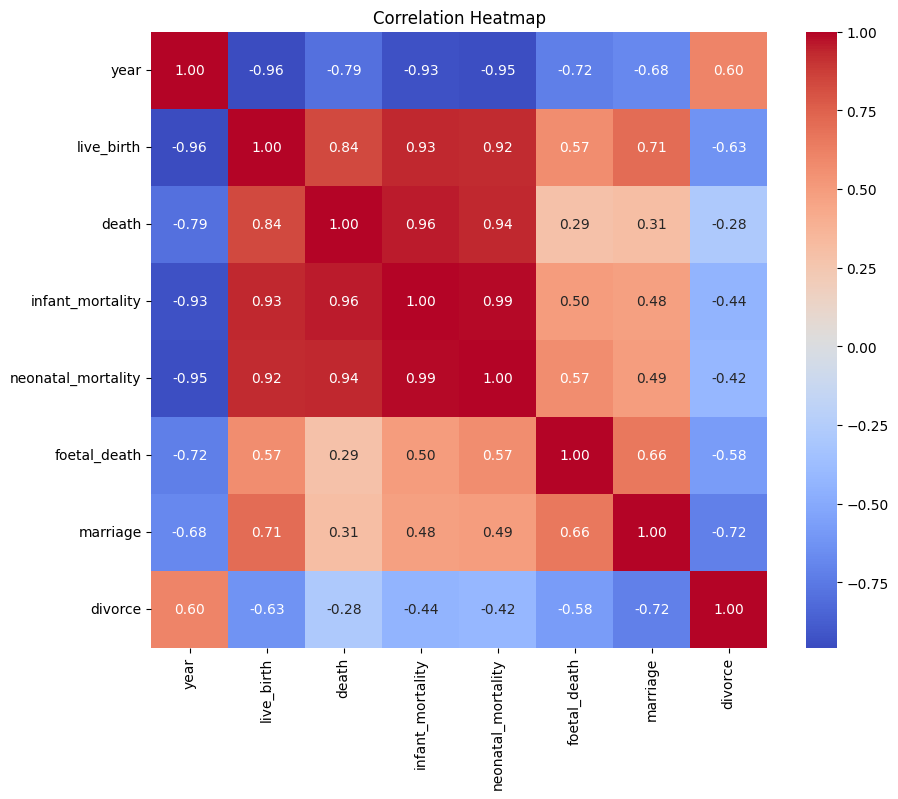

In [59]:
plt.figure(figsize=(10, 8))
sns.heatmap(vital.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Heatmap')
plt.show()

##### Combining into one df

In [60]:
df = pd.DataFrame({
    'year': np.arange(1800, 2025, 1)
})

df = df.merge(death, on='year', how='left').merge(econ, on='year', how='left').merge(edu, on='year', how='left').merge(urban, on='year', how='left').merge(vital, on='year',how='left')

df.head()


year  deaths  tuberculosis_deaths  cancer_deaths  heart_disease_deaths  \
0  1800     NaN                  NaN            NaN                   NaN   
1  1801     NaN                  NaN            NaN                   NaN   
2  1802     NaN                  NaN            NaN                   NaN   
3  1803     NaN                  NaN            NaN                   NaN   
4  1804     NaN                  NaN            NaN                   NaN   

   brain_deaths  pneumonia_deaths  senility_deaths  accident_deaths  \
0           NaN               NaN              NaN              NaN   
1           NaN               NaN              NaN              NaN   
2           NaN               NaN              NaN              NaN   
3           NaN               NaN              NaN              NaN   
4           NaN               NaN              NaN              NaN   

   suicide_deaths  ...  post_secondary_female  post_secondary_male  \
0             NaN  ...                    NaN                  NaN   
1             NaN  ...                    NaN                  NaN   
2             NaN  ...                    NaN                  NaN   
3             NaN  ...                    NaN                  NaN   
4             NaN  ...                    NaN                  NaN   

   urban_percent  live_birth  death  infant_mortality  neonatal_mortality  \
0            NaN         NaN    NaN               NaN                 NaN   
1            NaN         NaN    NaN               NaN                 NaN   
2            NaN         NaN    NaN               NaN                 NaN   
3            NaN         NaN    NaN               NaN                 NaN   
4            NaN         NaN    NaN               NaN                 NaN   

   foetal_death  marriage  divorce  
0           NaN       NaN      NaN  
1           NaN       NaN      NaN  
2           NaN       NaN      NaN  
3           NaN       NaN      NaN  
4           NaN       NaN      NaN  

[5 rows x 35 columns]

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   225 non-null    int64  
 1   deaths                 115 non-null    float64
 2   tuberculosis_deaths    115 non-null    float64
 3   cancer_deaths          115 non-null    float64
 4   heart_disease_deaths   115 non-null    float64
 5   brain_deaths           115 non-null    float64
 6   pneumonia_deaths       115 non-null    float64
 7   senility_deaths        115 non-null    float64
 8   accident_deaths        115 non-null    float64
 9   suicide_deaths         115 non-null    float64
 10  max                    116 non-null    float64
 11  jp                     116 non-null    float64
 12  GDP_percentage_of_max  116 non-null    float64
 13  WPI                    116 non-null    float64
 14  log_WPI                116 non-null    float64
 15  none  

In [62]:
nulls(df)

cols  null_count  % null
0               secondary         114  50.667
1                 primary         114  50.667
2                    none         114  50.667
3     post_secondary_male         114  50.667
4   post_secondary_female         114  50.667
5          secondary_male         114  50.667
6          post_secondary         114  50.667
7            primary_male         114  50.667
8          primary_female         114  50.667
9               none_male         114  50.667
10            none_female         114  50.667
11       secondary_female         114  50.667
12         suicide_deaths         110  48.889
13                 deaths         110  48.889
14    tuberculosis_deaths         110  48.889
15          cancer_deaths         110  48.889
16   heart_disease_deaths         110  48.889
17           brain_deaths         110  48.889
18       pneumonia_deaths         110  48.889
19        accident_deaths         110  48.889
20        senility_deaths         110  48.889
21                    max         109  48.444
22                     jp         109  48.444
23                    WPI         109  48.444
24  GDP_percentage_of_max         109  48.444
25                log_WPI         109  48.444
26          urban_percent         104  46.222
27     neonatal_mortality         103  45.778
28             live_birth         103  45.778
29                  death         103  45.778
30       infant_mortality         103  45.778
31               marriage         103  45.778
32           foetal_death         103  45.778
33                divorce         103  45.778
34                   year           0   0.000

In [63]:
df = df.set_index('year')
df

deaths  tuberculosis_deaths  cancer_deaths  heart_disease_deaths  \
year                                                                     
1800     NaN                  NaN            NaN                   NaN   
1801     NaN                  NaN            NaN                   NaN   
1802     NaN                  NaN            NaN                   NaN   
1803     NaN                  NaN            NaN                   NaN   
1804     NaN                  NaN            NaN                   NaN   
...      ...                  ...            ...                   ...   
2020     NaN                  NaN            NaN                   NaN   
2021     NaN                  NaN            NaN                   NaN   
2022     NaN                  NaN            NaN                   NaN   
2023     NaN                  NaN            NaN                   NaN   
2024     NaN                  NaN            NaN                   NaN   

      brain_deaths  pneumonia_deaths  senility_deaths  accident_deaths  \
year                                                                     
1800           NaN               NaN              NaN              NaN   
1801           NaN               NaN              NaN              NaN   
1802           NaN               NaN              NaN              NaN   
1803           NaN               NaN              NaN              NaN   
1804           NaN               NaN              NaN              NaN   
...            ...               ...              ...              ...   
2020           NaN               NaN              NaN              NaN   
2021           NaN               NaN              NaN              NaN   
2022           NaN               NaN              NaN              NaN   
2023           NaN               NaN              NaN              NaN   
2024           NaN               NaN              NaN              NaN   

      suicide_deaths  max  ...  post_secondary_female  post_secondary_male  \
year                       ...                                               
1800             NaN  NaN  ...                    NaN                  NaN   
1801             NaN  NaN  ...                    NaN                  NaN   
1802             NaN  NaN  ...                    NaN                  NaN   
1803             NaN  NaN  ...                    NaN                  NaN   
1804             NaN  NaN  ...                    NaN                  NaN   
...              ...  ...  ...                    ...                  ...   
2020             NaN  NaN  ...                    NaN                  NaN   
2021             NaN  NaN  ...                    NaN                  NaN   
2022             NaN  NaN  ...                    NaN                  NaN   
2023             NaN  NaN  ...                    NaN                  NaN   
2024             NaN  NaN  ...                    NaN                  NaN   

      urban_percent  live_birth  death  infant_mortality  neonatal_mortality  \
year                                                                           
1800            NaN         NaN    NaN               NaN                 NaN   
1801            NaN         NaN    NaN               NaN                 NaN   
1802            NaN         NaN    NaN               NaN                 NaN   
1803            NaN         NaN    NaN               NaN                 NaN   
1804            NaN         NaN    NaN               NaN                 NaN   
...             ...         ...    ...               ...                 ...   
2020          91.78         6.8   11.1               1.8                 0.8   
2021            NaN         6.6   11.7               1.7                 0.8   
2022            NaN         6.3   12.9               1.8                 0.8   
2023            NaN         6.0   13.0               1.8                 0.8   
2024            NaN         NaN    NaN               NaN                 NaN   

      foetal_death  marr

In [64]:
df = df.dropna(how='all')

df

deaths  tuberculosis_deaths  cancer_deaths  heart_disease_deaths  \
year                                                                     
1887     NaN                  NaN            NaN                   NaN   
1888     NaN                  NaN            NaN                   NaN   
1889     NaN                  NaN            NaN                   NaN   
1890     NaN                  NaN            NaN                   NaN   
1891     NaN                  NaN            NaN                   NaN   
...      ...                  ...            ...                   ...   
2019     NaN                  NaN            NaN                   NaN   
2020     NaN                  NaN            NaN                   NaN   
2021     NaN                  NaN            NaN                   NaN   
2022     NaN                  NaN            NaN                   NaN   
2023     NaN                  NaN            NaN                   NaN   

      brain_deaths  pneumonia_deaths  senility_deaths  accident_deaths  \
year                                                                     
1887           NaN               NaN              NaN              NaN   
1888           NaN               NaN              NaN              NaN   
1889           NaN               NaN              NaN              NaN   
1890           NaN               NaN              NaN              NaN   
1891           NaN               NaN              NaN              NaN   
...            ...               ...              ...              ...   
2019           NaN               NaN              NaN              NaN   
2020           NaN               NaN              NaN              NaN   
2021           NaN               NaN              NaN              NaN   
2022           NaN               NaN              NaN              NaN   
2023           NaN               NaN              NaN              NaN   

      suicide_deaths     max  ...  post_secondary_female  post_secondary_male  \
year                          ...                                               
1887             NaN  7383.0  ...                    NaN                  NaN   
1888             NaN  7179.0  ...                    NaN                  NaN   
1889             NaN  7567.0  ...                    NaN                  NaN   
1890             NaN  7106.0  ...                    NaN                  NaN   
1891             NaN  7438.0  ...                    NaN                  NaN   
...              ...     ...  ...                    ...                  ...   
2019             NaN     NaN  ...                    NaN                  NaN   
2020             NaN     NaN  ...                    NaN                  NaN   
2021             NaN     NaN  ...                    NaN                  NaN   
2022             NaN     NaN  ...                    NaN                  NaN   
2023             NaN     NaN  ...                    NaN                  NaN   

      urban_percent  live_birth  death  infant_mortality  neonatal_mortality  \
year                                                                           
1887            NaN         NaN    NaN               NaN                 NaN   
1888            NaN         NaN    NaN               NaN                 NaN   
1889            NaN         NaN    NaN               NaN                 NaN   
1890            NaN         NaN    NaN               NaN                 NaN   
1891            NaN         NaN    NaN               NaN                 NaN   
...             ...         ...    ...               ...                 ...   
2019          91.70         7.0   11.2               1.9                 0.9   
2020          91.78         6.8   11.1               1.8                 0.8   
2021            NaN         6.6   11.7               1.7                 0.8   
2022            NaN         6.3   12.9               1.8                 0.8   
2023            NaN         6.0   13.0               1.8          

In [65]:
nulls(df)

cols  null_count  % null
0                 primary          26  18.978
1                    none          26  18.978
2     post_secondary_male          26  18.978
3   post_secondary_female          26  18.978
4               secondary          26  18.978
5          post_secondary          26  18.978
6            primary_male          26  18.978
7          primary_female          26  18.978
8               none_male          26  18.978
9             none_female          26  18.978
10         secondary_male          26  18.978
11       secondary_female          26  18.978
12    tuberculosis_deaths          22  16.058
13                 deaths          22  16.058
14          cancer_deaths          22  16.058
15   heart_disease_deaths          22  16.058
16           brain_deaths          22  16.058
17       pneumonia_deaths          22  16.058
18         suicide_deaths          22  16.058
19        senility_deaths          22  16.058
20        accident_deaths          22  16.058
21                     jp          21  15.328
22                    max          21  15.328
23  GDP_percentage_of_max          21  15.328
24                    WPI          21  15.328
25                log_WPI          21  15.328
26          urban_percent          16  11.679
27             live_birth          15  10.949
28                  death          15  10.949
29       infant_mortality          15  10.949
30     neonatal_mortality          15  10.949
31           foetal_death          15  10.949
32               marriage          15  10.949
33                divorce          15  10.949

In [66]:
df = df[df.index < 2011]

df

deaths  tuberculosis_deaths  cancer_deaths  heart_disease_deaths  \
year                                                                     
1887     NaN                  NaN            NaN                   NaN   
1888     NaN                  NaN            NaN                   NaN   
1889     NaN                  NaN            NaN                   NaN   
1890     NaN                  NaN            NaN                   NaN   
1891     NaN                  NaN            NaN                   NaN   
...      ...                  ...            ...                   ...   
2006   859.6                  1.8          261.0                 137.2   
2007   879.0                  1.7          266.9                 139.2   
2008   907.1                  1.8          272.3                 144.4   
2009   907.5                  1.7          273.5                 143.7   
2010   947.1                  1.7          279.7                 149.8   

      brain_deaths  pneumonia_deaths  senility_deaths  accident_deaths  \
year                                                                     
1887           NaN               NaN              NaN              NaN   
1888           NaN               NaN              NaN              NaN   
1889           NaN               NaN              NaN              NaN   
1890           NaN               NaN              NaN              NaN   
1891           NaN               NaN              NaN              NaN   
...            ...               ...              ...              ...   
2006         101.7              85.0             22.0             30.3   
2007         100.8              87.4             24.4             30.1   
2008         100.9              91.6             28.6             30.3   
2009          97.2              89.0             30.7             30.0   
2010          97.7              94.1             35.9             32.2   

      suicide_deaths     max  ...  post_secondary_female  post_secondary_male  \
year                          ...                                               
1887             NaN  7383.0  ...                    NaN                  NaN   
1888             NaN  7179.0  ...                    NaN                  NaN   
1889             NaN  7567.0  ...                    NaN                  NaN   
1890             NaN  7106.0  ...                    NaN                  NaN   
1891             NaN  7438.0  ...                    NaN                  NaN   
...              ...     ...  ...                    ...                  ...   
2006            23.7     NaN  ...              27.424803            32.243941   
2007            24.4     NaN  ...              28.138923            32.789337   
2008            24.0     NaN  ...              28.853043            33.334733   
2009            24.4     NaN  ...              29.567162            33.880128   
2010            23.4     NaN  ...              30.281282            34.425524   

      urban_percent  live_birth  death  infant_mortality  neonatal_mortality  \
year                                                                           
1887            NaN         NaN    NaN               NaN                 NaN   
1888            NaN         NaN    NaN               NaN                 NaN   
1889            NaN         NaN    NaN               NaN                 NaN   
1890            NaN         NaN    NaN               NaN                 NaN   
1891            NaN         NaN    NaN               NaN                 NaN   
...             ...         ...    ...               ...                 ...   
2006          87.12         8.7    8.6               2.6                 1.3   
2007          88.15         8.6    8.8               2.6                 1.3   
2008          89.10         8.7    9.1               2.6                 1.2   
2009          89.99         8.5    9.1               2.4                 1.2   
2010          90.81         8.5    9.5               2.3          

In [67]:
df[df.index < 1900].isnull().sum()

deaths                   12
tuberculosis_deaths      12
cancer_deaths            12
heart_disease_deaths     12
brain_deaths             12
pneumonia_deaths         12
senility_deaths          12
accident_deaths          12
suicide_deaths           12
max                       0
jp                        0
GDP_percentage_of_max     0
WPI                       0
log_WPI                   0
none                     13
primary                  13
secondary                13
post_secondary           13
none_female              13
none_male                13
primary_female           13
primary_male             13
secondary_female         13
secondary_male           13
post_secondary_female    13
post_secondary_male      13
urban_percent            13
live_birth               12
death                    12
infant_mortality         12
neonatal_mortality       12
foetal_death             12
marriage                 12
divorce                  12
dtype: int64

In [68]:
df = df[df.index >= 1900]

df

deaths  tuberculosis_deaths  cancer_deaths  heart_disease_deaths  \
year                                                                     
1900  2077.1                163.7           46.4                  48.1   
1901  2087.1                172.7           49.9                  49.3   
1902  2133.1                183.6           54.7                  53.0   
1903  2044.1                186.9           56.1                  52.0   
1904  2070.9                189.1           56.3                  55.1   
...      ...                  ...            ...                   ...   
2006   859.6                  1.8          261.0                 137.2   
2007   879.0                  1.7          266.9                 139.2   
2008   907.1                  1.8          272.3                 144.4   
2009   907.5                  1.7          273.5                 143.7   
2010   947.1                  1.7          279.7                 149.8   

      brain_deaths  pneumonia_deaths  senility_deaths  accident_deaths  \
year                                                                     
1900         159.2             102.3            131.0             45.3   
1901         169.6             111.8            111.4             40.6   
1902         166.7             119.0            117.4             44.6   
1903         162.3             106.7            124.0             44.9   
1904         168.2             113.0            136.8             46.2   
...            ...               ...              ...              ...   
2006         101.7              85.0             22.0             30.3   
2007         100.8              87.4             24.4             30.1   
2008         100.9              91.6             28.6             30.3   
2009          97.2              89.0             30.7             30.0   
2010          97.7              94.1             35.9             32.2   

      suicide_deaths        max  ...  post_secondary_female  \
year                             ...                          
1900            13.4  8037.5712  ...               0.036166   
1901            17.7  8770.3632  ...               0.043848   
1902            17.9  8684.2280  ...               0.051530   
1903            19.4  8941.3480  ...               0.059212   
1904            19.4  8663.6584  ...               0.066894   
...              ...        ...  ...                    ...   
2006            23.7        NaN  ...              27.424803   
2007            24.4        NaN  ...              28.138923   
2008            24.0        NaN  ...              28.853043   
2009            24.4        NaN  ...              29.567162   
2010            23.4        NaN  ...              30.281282   

      post_secondary_male  urban_percent  live_birth  death  infant_mortality  \
year                                                                            
1900             0.118491          12.00        32.4   20.8             155.0   
1901             0.134500          12.30        33.9   20.9             149.9   
1902             0.150510          12.60        33.6   21.3             154.0   
1903             0.166520          12.90        32.7   20.4             152.4   
1904             0.182530          13.20        31.2   20.7             151.9   
...                   ...            ...         ...    ...               ...   
2006            32.243941          87.12         8.7    8.6               2.6   
2007            32.789337          88.15         8.6    8.8               2.6   
2008            33.334733          89.10         8.7    9.1               2.6   
2009            33.880128          89.99         8.5    9.1               2.4   
2010            34.425524          90.81         8.5    9.5               2.3   

      neonatal_mortality  foetal_death  marriage  divorce  
year                                                       
1900                79.0          88.5       7.9     1.46  
1901                77.1  

In [69]:
nulls(df)

cols  null_count  % null
0                     WPI           8   7.207
1                     max           8   7.207
2                 log_WPI           8   7.207
3                      jp           8   7.207
4   GDP_percentage_of_max           8   7.207
5                  deaths           3   2.703
6     tuberculosis_deaths           3   2.703
7           cancer_deaths           3   2.703
8            brain_deaths           3   2.703
9    heart_disease_deaths           3   2.703
10         suicide_deaths           3   2.703
11        accident_deaths           3   2.703
12        senility_deaths           3   2.703
13       pneumonia_deaths           3   2.703
14               marriage           3   2.703
15           foetal_death           3   2.703
16                divorce           3   2.703
17     neonatal_mortality           3   2.703
18                  death           3   2.703
19       infant_mortality           3   2.703
20             live_birth           3   2.703
21                   none           0   0.000
22         post_secondary           0   0.000
23              secondary           0   0.000
24                primary           0   0.000
25            none_female           0   0.000
26    post_secondary_male           0   0.000
27  post_secondary_female           0   0.000
28         secondary_male           0   0.000
29       secondary_female           0   0.000
30           primary_male           0   0.000
31         primary_female           0   0.000
32              none_male           0   0.000
33          urban_percent           0   0.000

In [70]:
df[df['WPI'].isna()]

deaths  tuberculosis_deaths  cancer_deaths  heart_disease_deaths  \
year                                                                     
2003   804.6                  1.9          245.4                 126.5   
2004   815.2                  1.8          253.9                 126.5   
2005   858.8                  1.8          258.3                 137.2   
2006   859.6                  1.8          261.0                 137.2   
2007   879.0                  1.7          266.9                 139.2   
2008   907.1                  1.8          272.3                 144.4   
2009   907.5                  1.7          273.5                 143.7   
2010   947.1                  1.7          279.7                 149.8   

      brain_deaths  pneumonia_deaths  senility_deaths  accident_deaths  \
year                                                                     
2003         104.7              75.3             18.6             30.7   
2004         102.3              75.7             19.1             30.3   
2005         105.3              85.0             20.9             31.6   
2006         101.7              85.0             22.0             30.3   
2007         100.8              87.4             24.4             30.1   
2008         100.9              91.6             28.6             30.3   
2009          97.2              89.0             30.7             30.0   
2010          97.7              94.1             35.9             32.2   

      suicide_deaths  max  ...  post_secondary_female  post_secondary_male  \
year                       ...                                               
2003            25.5  NaN  ...              25.134805            30.423785   
2004            24.0  NaN  ...              25.922745            31.061165   
2005            24.2  NaN  ...              26.710684            31.698546   
2006            23.7  NaN  ...              27.424803            32.243941   
2007            24.4  NaN  ...              28.138923            32.789337   
2008            24.0  NaN  ...              28.853043            33.334733   
2009            24.4  NaN  ...              29.567162            33.880128   
2010            23.4  NaN  ...              30.281282            34.425524   

      urban_percent  live_birth  death  infant_mortality  neonatal_mortality  \
year                                                                           
2003          83.20         8.9    8.0               3.0                 1.7   
2004          84.64         8.8    8.2               2.8                 1.5   
2005          85.98         8.4    8.6               2.8                 1.4   
2006          87.12         8.7    8.6               2.6                 1.3   
2007          88.15         8.6    8.8               2.6                 1.3   
2008          89.10         8.7    9.1               2.6                 1.2   
2009          89.99         8.5    9.1               2.4                 1.2   
2010          90.81         8.5    9.5               2.3                 1.1   

      foetal_death  marriage  divorce  
year                                   
2003          30.5       5.9     2.25  
2004          30.0       5.7     2.15  
2005          29.1       5.7     2.08  
2006          27.5       5.8     2.04  
2007          26.2       5.7     2.02  
2008          25.2       5.8     1.99  
2009          24.6       5.6     2.01  
2010          24.2       5.5     1.99  

[8 rows x 34 columns]

In [71]:
df[df['deaths'].isna()]

deaths  tuberculosis_deaths  cancer_deaths  heart_disease_deaths  \
year                                                                     
1944     NaN                  NaN            NaN                   NaN   
1945     NaN                  NaN            NaN                   NaN   
1946     NaN                  NaN            NaN                   NaN   

      brain_deaths  pneumonia_deaths  senility_deaths  accident_deaths  \
year                                                                     
1944           NaN               NaN              NaN              NaN   
1945           NaN               NaN              NaN              NaN   
1946           NaN               NaN              NaN              NaN   

      suicide_deaths          max  ...  post_secondary_female  \
year                               ...                          
1944             NaN  16999.32717  ...               1.741511   
1945             NaN  16477.55177  ...               1.821456   
1946             NaN  14822.46647  ...               1.910500   

      post_secondary_male  urban_percent  live_birth  death  infant_mortality  \
year                                                                            
1944             4.131386          37.70         NaN    NaN               NaN   
1945             4.322450          27.80         NaN    NaN               NaN   
1946             4.569069          30.45         NaN    NaN               NaN   

      neonatal_mortality  foetal_death  marriage  divorce  
year                                                       
1944                 NaN           NaN       NaN      NaN  
1945                 NaN           NaN       NaN      NaN  
1946                 NaN           NaN       NaN      NaN  

[3 rows x 34 columns]

- `econ` data is missing for years >= 2003
- `vital` and `death` data is missing for WWII years

In [72]:
df.loc[1942:].head(6)

deaths  tuberculosis_deaths  cancer_deaths  heart_disease_deaths  \
year                                                                     
1942  1611.7                223.1           74.5                  60.1   
1943  1672.6                235.3           73.5                  62.3   
1944     NaN                  NaN            NaN                   NaN   
1945     NaN                  NaN            NaN                   NaN   
1946     NaN                  NaN            NaN                   NaN   
1947  1457.4                187.2           69.0                  62.2   

      brain_deaths  pneumonia_deaths  senility_deaths  accident_deaths  \
year                                                                     
1942         173.2             146.5            132.6             43.0   
1943         166.0             159.8            136.1             46.0   
1944           NaN               NaN              NaN              NaN   
1945           NaN               NaN              NaN              NaN   
1946           NaN               NaN              NaN              NaN   
1947         129.4             130.1            100.3             49.3   

      suicide_deaths          max  ...  post_secondary_female  \
year                               ...                          
1942            13.0  14869.86115  ...               1.581622   
1943            12.1  16050.21742  ...               1.661566   
1944             NaN  16999.32717  ...               1.741511   
1945             NaN  16477.55177  ...               1.821456   
1946             NaN  14822.46647  ...               1.910500   
1947            15.7  14311.54719  ...               1.999545   

      post_secondary_male  urban_percent  live_birth  death  infant_mortality  \
year                                                                            
1942             3.749258          37.70        30.9   16.1              85.5   
1943             3.940322          37.70        30.9   16.7              86.6   
1944             4.131386          37.70         NaN    NaN               NaN   
1945             4.322450          27.80         NaN    NaN               NaN   
1946             4.569069          30.45         NaN    NaN               NaN   
1947             4.815689          33.10        34.3   14.6              76.7   

      neonatal_mortality  foetal_death  marriage  divorce  
year                                                       
1942                34.1          41.0       9.4     0.64  
1943                33.8          39.6      10.2     0.68  
1944                 NaN           NaN       NaN      NaN  
1945                 NaN           NaN       NaN      NaN  
1946                 NaN           NaN       NaN      NaN  
1947                31.4          44.2      12.0     1.02  

[6 rows x 34 columns]

In [73]:
### estimating death rates

# 1944: 1,290,513 deaths, 73,064,000 population
df.loc[1944, 'deaths'] = 1290513.0 / 73064000 * 100000

# 1945: 2,115,162 deaths, 71,998,104 population

df.loc[1945, 'deaths'] = 2115162.0 / 71998104 * 100000

# 1946: No death data is known. But, it is more than 1944's deaths, and should be less than 1945's. Estimate of 1,500,000 deaths. 73,110,995 population

df.loc[1946, 'deaths'] = 1500000.0 / 73110995 * 100000

C:\Users\Jaden\AppData\Local\Temp\ipykernel_10448\780264127.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[1944, 'deaths'] = 1290513.0 / 73064000 * 100000
C:\Users\Jaden\AppData\Local\Temp\ipykernel_10448\780264127.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[1945, 'deaths'] = 2115162.0 / 71998104 * 100000
C:\Users\Jaden\AppData\Local\Temp\ipykernel_10448\780264127.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

In [74]:
df = df.drop(columns='death') # redundant

In [75]:
df.loc[1935: 1948, 'suicide_deaths']

year
1935    20.5
1936    22.0
1937    20.2
1938    17.2
1939    15.1
1940    13.7
1941    13.6
1942    13.0
1943    12.1
1944     NaN
1945     NaN
1946     NaN
1947    15.7
1948    15.9
Name: suicide_deaths, dtype: float64

In [76]:
## 1. wartime increases national unity and pride, which would decrease the rate of suicide.
## 2. killing oneself during the war probably is not treated as death by suicide but as a wartime casualty
## 3. the government could easily have altered the accuracy of suicide data.

## so I'm going to make it a conservative estimate, with the same suicide rates as 1943.

df.loc[1944: 1946, 'suicide_deaths'] = 12.1

In [77]:
deaths = [col for col in df.columns if '_deaths' in col]

df.loc[1944:1947, deaths] = df.loc[1944: 1947, deaths].bfill() # majority of deaths are due to wartime casualities, so the rest of the death rates should be lower than pre-war.

In [78]:
vital = vital.drop(columns='death')

In [79]:
v = [col for col in vital.columns if 'year' not in col]

df.loc[1935: 1950, v]

live_birth  infant_mortality  neonatal_mortality  foetal_death  \
year                                                                   
1935        31.6             106.7                44.7          50.1   
1936        30.0             116.7                48.1          50.2   
1937        30.9             105.8                43.8          48.6   
1938        27.2             114.4                46.2          49.1   
1939        26.6             106.2                44.3          49.2   
1940        29.4              90.0                38.7          46.0   
1941        31.8              84.1                34.2          43.4   
1942        30.9              85.5                34.1          41.0   
1943        30.9              86.6                33.8          39.6   
1944         NaN               NaN                 NaN           NaN   
1945         NaN               NaN                 NaN           NaN   
1946         NaN               NaN                 NaN           NaN   
1947        34.3              76.7                31.4          44.2   
1948        33.5              61.7                27.5          50.9   
1949        33.0              62.5                26.9          66.7   
1950        28.1              60.1                27.4          84.9   

      marriage  divorce  
year                     
1935       8.0     0.70  
1936       7.8     0.66  
1937       9.5     0.66  
1938       7.6     0.63  
1939       7.8     0.64  
1940       9.3     0.68  
1941      11.0     0.69  
1942       9.4     0.64  
1943      10.2     0.68  
1944       NaN      NaN  
1945       NaN      NaN  
1946       NaN      NaN  
1947      12.0     1.02  
1948      11.9     0.99  
1949      10.3     1.01  
1950       8.6     1.01

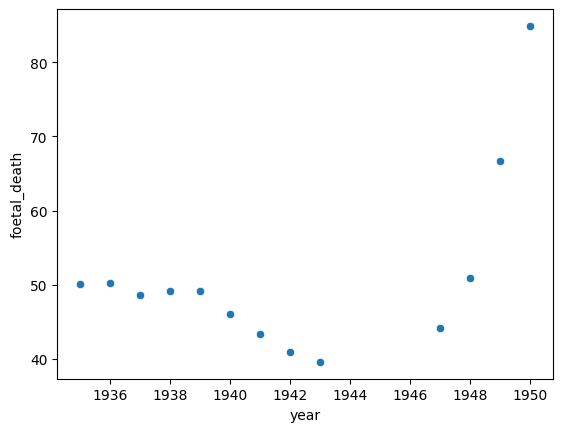

In [80]:
sns.scatterplot(df.loc[1935: 1950, v], x='year', y='foetal_death');

divorce logically should not change much until post-war... how can they divorce if soldiers are out at war?

In [81]:
df.loc[1935: 1946, 'divorce'].fillna(df.loc[1935:1946, 'divorce'].mean(), inplace=True)

C:\Users\Jaden\AppData\Local\Temp\ipykernel_10448\2286073710.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.loc[1935: 1946, 'divorce'].fillna(df.loc[1935:1946, 'divorce'].mean(), inplace=True)


same for marriage

In [82]:
df.loc[1935: 1946, 'marriage'].fillna(df.loc[1935:1946, 'marriage'].mean(), inplace=True)

C:\Users\Jaden\AppData\Local\Temp\ipykernel_10448\2375687330.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.loc[1935: 1946, 'marriage'].fillna(df.loc[1935:1946, 'marriage'].mean(), inplace=True)


In [83]:
df.loc[1935: 1950, v]

live_birth  infant_mortality  neonatal_mortality  foetal_death  \
year                                                                   
1935        31.6             106.7                44.7          50.1   
1936        30.0             116.7                48.1          50.2   
1937        30.9             105.8                43.8          48.6   
1938        27.2             114.4                46.2          49.1   
1939        26.6             106.2                44.3          49.2   
1940        29.4              90.0                38.7          46.0   
1941        31.8              84.1                34.2          43.4   
1942        30.9              85.5                34.1          41.0   
1943        30.9              86.6                33.8          39.6   
1944         NaN               NaN                 NaN           NaN   
1945         NaN               NaN                 NaN           NaN   
1946         NaN               NaN                 NaN           NaN   
1947        34.3              76.7                31.4          44.2   
1948        33.5              61.7                27.5          50.9   
1949        33.0              62.5                26.9          66.7   
1950        28.1              60.1                27.4          84.9   

       marriage   divorce  
year                       
1935   8.000000  0.700000  
1936   7.800000  0.660000  
1937   9.500000  0.660000  
1938   7.600000  0.630000  
1939   7.800000  0.640000  
1940   9.300000  0.680000  
1941  11.000000  0.690000  
1942   9.400000  0.640000  
1943  10.200000  0.680000  
1944   8.955556  0.664444  
1945   8.955556  0.664444  
1946   8.955556  0.664444  
1947  12.000000  1.020000  
1948  11.900000  0.990000  
1949  10.300000  1.010000  
1950   8.600000  1.010000

live birth rates should decrease during WWII due to hardships and overall stress.

In [84]:
df.loc[1944: 1946, 'live_birth'] = [26.0, 24.0, 22.0]

since infant and neonatal mortality is in number of deaths per 1000 live births, the numbers should be similar regardless of war or not.

In [85]:
df.loc[1935: 1950, 'infant_mortality'] = df.loc[1935: 1950, 'infant_mortality'].interpolate(limit_direction='both')

In [86]:
df.loc[1935: 1950, 'neonatal_mortality'] = df.loc[1935: 1950, 'neonatal_mortality'].interpolate(limit_direction='both')

not exactly sure why foetal death increases after WWII, perhaps due to stress or the effects of the nuclear bombs?

In [87]:
df.loc[1935: 1950,  'foetal_death']

year
1935    50.1
1936    50.2
1937    48.6
1938    49.1
1939    49.2
1940    46.0
1941    43.4
1942    41.0
1943    39.6
1944     NaN
1945     NaN
1946     NaN
1947    44.2
1948    50.9
1949    66.7
1950    84.9
Name: foetal_death, dtype: float64

In [88]:
df.loc[1935: 1950, 'foetal_death'] = df.loc[1935: 1950, 'foetal_death'].fillna(np.round(df.loc[1935: 1948, 'foetal_death'].mean(), 1))

In [89]:
df.loc[1935: 1950, v]

live_birth  infant_mortality  neonatal_mortality  foetal_death  \
year                                                                   
1935        31.6           106.700                44.7          50.1   
1936        30.0           116.700                48.1          50.2   
1937        30.9           105.800                43.8          48.6   
1938        27.2           114.400                46.2          49.1   
1939        26.6           106.200                44.3          49.2   
1940        29.4            90.000                38.7          46.0   
1941        31.8            84.100                34.2          43.4   
1942        30.9            85.500                34.1          41.0   
1943        30.9            86.600                33.8          39.6   
1944        26.0            84.125                33.2          46.6   
1945        24.0            81.650                32.6          46.6   
1946        22.0            79.175                32.0          46.6   
1947        34.3            76.700                31.4          44.2   
1948        33.5            61.700                27.5          50.9   
1949        33.0            62.500                26.9          66.7   
1950        28.1            60.100                27.4          84.9   

       marriage   divorce  
year                       
1935   8.000000  0.700000  
1936   7.800000  0.660000  
1937   9.500000  0.660000  
1938   7.600000  0.630000  
1939   7.800000  0.640000  
1940   9.300000  0.680000  
1941  11.000000  0.690000  
1942   9.400000  0.640000  
1943  10.200000  0.680000  
1944   8.955556  0.664444  
1945   8.955556  0.664444  
1946   8.955556  0.664444  
1947  12.000000  1.020000  
1948  11.900000  0.990000  
1949  10.300000  1.010000  
1950   8.600000  1.010000

In [90]:
nulls(df)

cols  null_count  % null
0                     WPI           8   7.207
1                     max           8   7.207
2   GDP_percentage_of_max           8   7.207
3                      jp           8   7.207
4                 log_WPI           8   7.207
5                  deaths           0   0.000
6     tuberculosis_deaths           0   0.000
7    heart_disease_deaths           0   0.000
8           cancer_deaths           0   0.000
9          suicide_deaths           0   0.000
10        accident_deaths           0   0.000
11        senility_deaths           0   0.000
12       pneumonia_deaths           0   0.000
13           brain_deaths           0   0.000
14                   none           0   0.000
15                primary           0   0.000
16              secondary           0   0.000
17         post_secondary           0   0.000
18            none_female           0   0.000
19              none_male           0   0.000
20         primary_female           0   0.000
21           primary_male           0   0.000
22       secondary_female           0   0.000
23         secondary_male           0   0.000
24  post_secondary_female           0   0.000
25    post_secondary_male           0   0.000
26          urban_percent           0   0.000
27             live_birth           0   0.000
28       infant_mortality           0   0.000
29     neonatal_mortality           0   0.000
30           foetal_death           0   0.000
31               marriage           0   0.000
32                divorce           0   0.000

#### 1231

In [91]:
books = books.dropna(subset='inception')

books.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10639 entries, 3 to 17369
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id           10639 non-null  int64   
 1   title        10639 non-null  object  
 2   author_id    10639 non-null  int64   
 3   url          10639 non-null  object  
 4   inception    10639 non-null  float64 
 5   char_count   10639 non-null  float64 
 6   text         10639 non-null  object  
 7   category     10233 non-null  object  
 8   char_type    10639 non-null  object  
 9   authorAge    10564 non-null  float64 
 10  author_role  10639 non-null  object  
 11  length_type  10639 non-null  category
dtypes: category(1), float64(3), int64(2), object(6)
memory usage: 1008.0+ KB


In [92]:
authors = authors.rename(columns={'id': 'author_id'})

In [93]:
books = books.merge(authors, how='left', on='author_id')

In [94]:
books = books.drop(columns=['text', 'char_count', 'url', 'author', 'birthDate', 'deathDate', 'last', 'first', 'birthPlace', 'birthYear', 'deathYear', 'category', 'title', 'author_id', 'id'])

In [95]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10639 entries, 0 to 10638
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   inception       10639 non-null  float64 
 1   char_type       10639 non-null  object  
 2   authorAge       10564 non-null  float64 
 3   author_role     10639 non-null  object  
 4   length_type     10639 non-null  category
 5   gender          10636 non-null  object  
 6   first_work_age  10564 non-null  float64 
dtypes: category(1), float64(3), object(3)
memory usage: 509.4+ KB


In [95]:
books['char_type'].unique()

array(['旧字旧仮名', '新字旧仮名', '新字新仮名', 'その他', '旧字新仮名'], dtype=object)

In [96]:
books = pd.get_dummies(books, columns=['char_type', 'gender', 'length_type', 'author_role'])

In [97]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10639 entries, 0 to 10638
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   inception               10639 non-null  float64
 1   authorAge               10564 non-null  float64
 2   first_work_age          10564 non-null  float64
 3   char_type_その他           10639 non-null  bool   
 4   char_type_新字新仮名         10639 non-null  bool   
 5   char_type_新字旧仮名         10639 non-null  bool   
 6   char_type_旧字新仮名         10639 non-null  bool   
 7   char_type_旧字旧仮名         10639 non-null  bool   
 8   gender_female           10639 non-null  bool   
 9   gender_male             10639 non-null  bool   
 10  gender_unknown          10639 non-null  bool   
 11  length_type_flash       10639 non-null  bool   
 12  length_type_shortshort  10639 non-null  bool   
 13  length_type_short       10639 non-null  bool   
 14  length_type_novelette   10639 non-null

In [98]:
books = books.rename(columns={'inception': 'year'})
df = df.reset_index()

In [99]:
df = books.merge(df, how='left', on='year')

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10639 entries, 0 to 10638
Data columns (total 53 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    10639 non-null  float64
 1   authorAge               10564 non-null  float64
 2   first_work_age          10564 non-null  float64
 3   char_type_その他           10639 non-null  bool   
 4   char_type_新字新仮名         10639 non-null  bool   
 5   char_type_新字旧仮名         10639 non-null  bool   
 6   char_type_旧字新仮名         10639 non-null  bool   
 7   char_type_旧字旧仮名         10639 non-null  bool   
 8   gender_female           10639 non-null  bool   
 9   gender_male             10639 non-null  bool   
 10  gender_unknown          10639 non-null  bool   
 11  length_type_flash       10639 non-null  bool   
 12  length_type_shortshort  10639 non-null  bool   
 13  length_type_short       10639 non-null  bool   
 14  length_type_novelette   10639 non-null

In [101]:
df.shape

(10639, 53)

In [102]:
np.unique_counts(df[df['divorce'].isna()]['year'])

UniqueCountsResult(values=array([ 712., 1331., 1768., 1776., 1854., 1872., 1873., 1874., 1875.,
       1876., 1877., 1878., 1879., 1881., 1882., 1883., 1884., 1886.,
       1887., 1888., 1889., 1890., 1891., 1892., 1893., 1894., 1895.,
       1896., 1897., 1898., 1899., 2016., 2019., 2022.]), counts=array([ 1,  1,  1,  1,  1,  2,  1,  6,  5,  3,  5,  1,  2,  1,  7,  1,  1,
        5,  5,  5,  4, 13, 13, 37, 44, 17, 28, 31, 30, 29, 29,  3,  3,  3]))

### Clusters

In [103]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 
from mpl_toolkits.mplot3d import Axes3D

#### K-Means

K-Means works with the underlying assumptions of:
- spherical clusters
- equal variance
- similar cluster sizes

This, with curse of dimensionality, makes me to believe that K-Means clustering will not be very effective.

... Let's see

Books

In [104]:
books = books.drop(columns='year')

scaler = StandardScaler()
books = pd.DataFrame(scaler.fit_transform(books), columns=books.columns )

In [105]:
books = books.dropna()

In [106]:
nulls(books)

cols  null_count  % null
0                authorAge           0     0.0
1           first_work_age           0     0.0
2            char_type_その他           0     0.0
3          char_type_新字新仮名           0     0.0
4          char_type_新字旧仮名           0     0.0
5          char_type_旧字新仮名           0     0.0
6          char_type_旧字旧仮名           0     0.0
7            gender_female           0     0.0
8              gender_male           0     0.0
9           gender_unknown           0     0.0
10       length_type_flash           0     0.0
11  length_type_shortshort           0     0.0
12       length_type_short           0     0.0
13   length_type_novelette           0     0.0
14       length_type_novel           0     0.0
15         author_role_校訂者           0     0.0
16          author_role_編者           0     0.0
17         author_role_翻訳者           0     0.0
18          author_role_著者           0     0.0

In [107]:
books.shape

(10564, 19)

In [108]:
pca = PCA(n_components=15)

x_pca = pca.fit_transform(books)

for i, component in enumerate(pca.components_):
    print("{}th component: {}% of initial variance".format(i + 1, 
          round(100 * pca.explained_variance_ratio_[i], 2)))

1th component: 14.0% of initial variance
2th component: 11.88% of initial variance
3th component: 8.87% of initial variance
4th component: 8.21% of initial variance
5th component: 7.73% of initial variance
6th component: 7.57% of initial variance
7th component: 7.43% of initial variance
8th component: 6.66% of initial variance
9th component: 6.15% of initial variance
10th component: 5.86% of initial variance
11th component: 5.74% of initial variance
12th component: 3.6% of initial variance
13th component: 3.51% of initial variance
14th component: 2.78% of initial variance
15th component: 0.0% of initial variance


C:\Users\Jaden\AppData\Local\Temp\ipykernel_10448\1102348019.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  sc = ax.scatter(


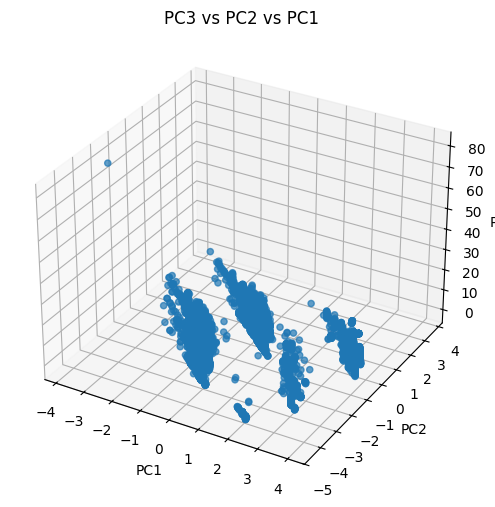

In [109]:
def pc_plot(color = None):
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    sc = ax.scatter(
        x_pca[:, 0],  
        x_pca[:, 1],  
        x_pca[:, 2],  
        c=color,
        cmap='viridis',
        alpha=0.7
    )
    ax.set_title('PC3 vs PC2 vs PC1')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    plt.show()



pc_plot()

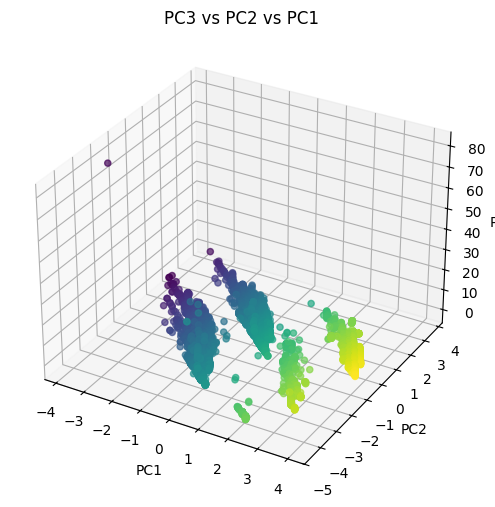

In [110]:
pc_plot(color=x_pca[:, 0])

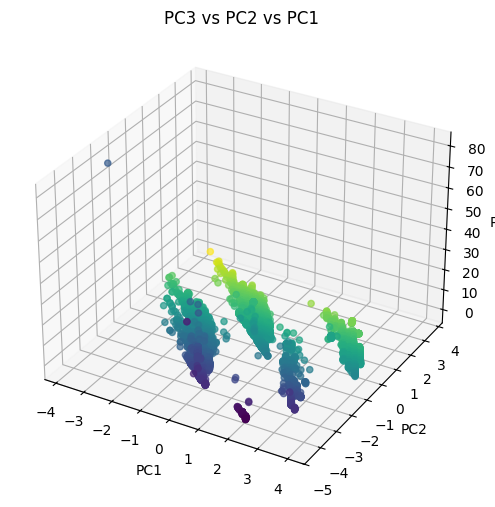

In [111]:
pc_plot(color=x_pca[:, 1])

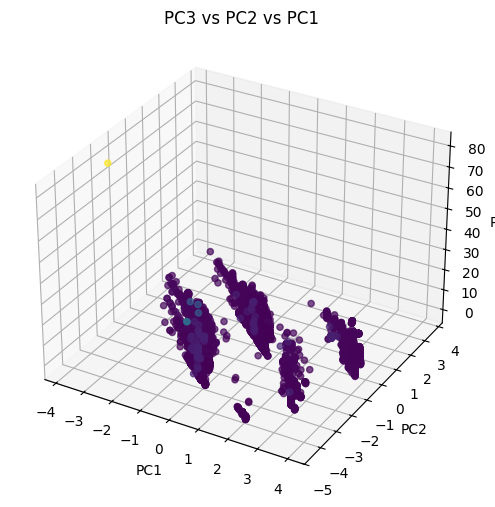

In [112]:
pc_plot(color=x_pca[:, 2])

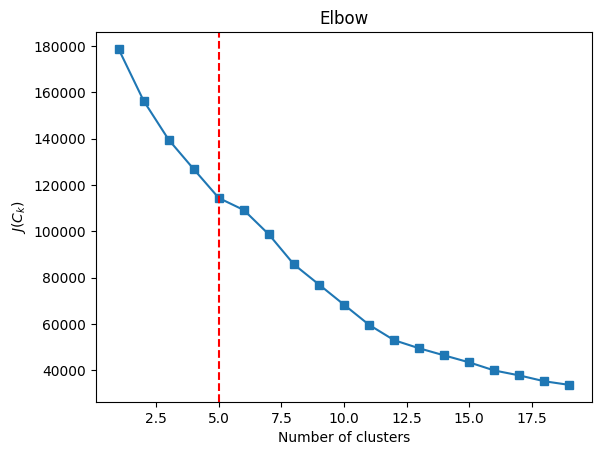

In [113]:
inertia = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 98)
    kmeans.fit(books)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 20), inertia, marker='s')
plt.title('Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('$J(C_k)$')
plt.axvline(x=5, c='red', ls='--')
plt.show()

I see two noticeable kinks: 

1. k = 5
2. k = 12

In [112]:
kmeans = KMeans(5, random_state=98).fit(books)

kmeans.inertia_


123967.23256711694

In [115]:
clusters = kmeans.predict(books)


d:\PythonDevelopment\jap_lit\env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
d:\PythonDevelopment\jap_lit\env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


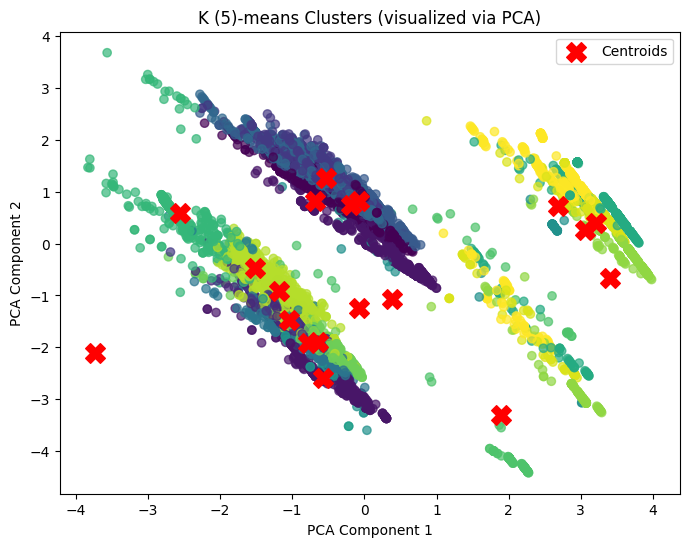

In [116]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.scatter(
    pca.transform(kmeans.cluster_centers_)[:, 0], 
    pca.transform(kmeans.cluster_centers_)[:, 1], 
    s=200, c='red', marker='X', label='Centroids'
)
plt.xlabel('PCA Component 1');
plt.ylabel('PCA Component 2');
plt.title('K (5)-means Clusters (visualized via PCA)');
plt.legend();
plt.show();

d:\PythonDevelopment\jap_lit\env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
d:\PythonDevelopment\jap_lit\env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


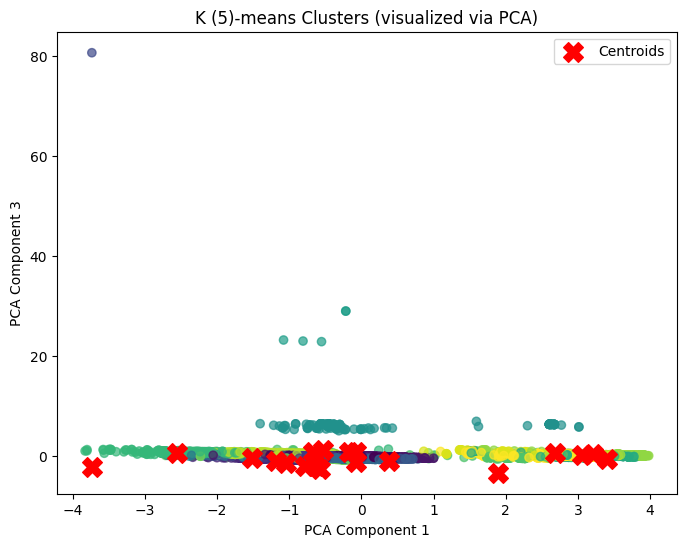

In [117]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:, 0], x_pca[:, 2], c=clusters, cmap='viridis', alpha=0.7)
plt.scatter(
    pca.transform(kmeans.cluster_centers_)[:, 0], 
    pca.transform(kmeans.cluster_centers_)[:, 1], 
    s=200, c='red', marker='X', label='Centroids'
)
plt.xlabel('PCA Component 1');
plt.ylabel('PCA Component 3');
plt.title('K (5)-means Clusters (visualized via PCA)');
plt.legend();
plt.show();

d:\PythonDevelopment\jap_lit\env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
d:\PythonDevelopment\jap_lit\env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


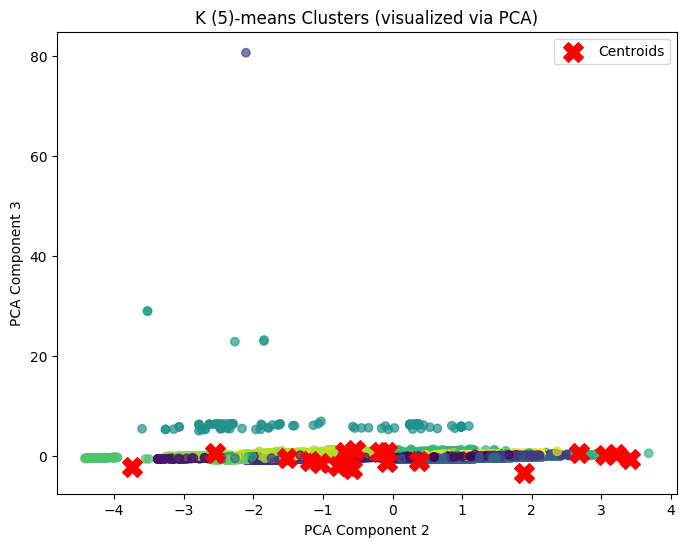

In [120]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:, 1], x_pca[:, 2], c=clusters, cmap='viridis', alpha=0.7)
plt.scatter(
    pca.transform(kmeans.cluster_centers_)[:, 0], 
    pca.transform(kmeans.cluster_centers_)[:, 1], 
    s=200, c='red', marker='X', label='Centroids'
)
plt.xlabel('PCA Component 2');
plt.ylabel('PCA Component 3');
plt.title('K (5)-means Clusters (visualized via PCA)');
plt.legend();
plt.show();

In [121]:
kmeans = KMeans(12, random_state=98).fit(books)

kmeans.inertia_

66172.21785076505

In [122]:
clusters = kmeans.predict(books)

d:\PythonDevelopment\jap_lit\env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
d:\PythonDevelopment\jap_lit\env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


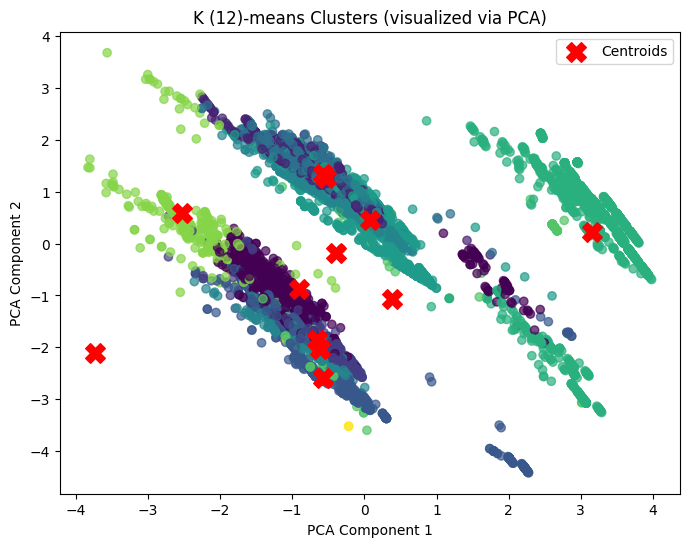

In [123]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.scatter(
    pca.transform(kmeans.cluster_centers_)[:, 0], 
    pca.transform(kmeans.cluster_centers_)[:, 1], 
    s=200, c='red', marker='X', label='Centroids'
)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K (12)-means Clusters (visualized via PCA)')
plt.legend()
plt.show()

Now doing PCA before K-means to reduce noise.

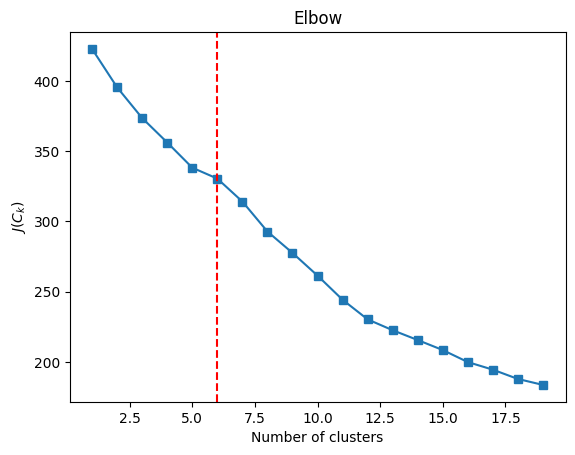

In [124]:
inertia = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 98)
    kmeans.fit(x_pca)
    inertia.append(np.sqrt(kmeans.inertia_))
plt.plot(range(1, 20), inertia, marker='s')
plt.title('Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('$J(C_k)$')
plt.axvline(x=6, c='red', ls='--')
plt.show()

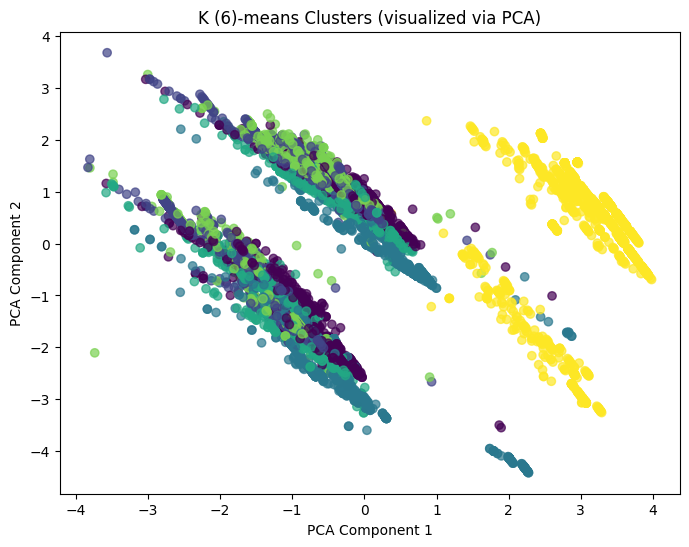

In [125]:
kmeans = KMeans(n_clusters=6, random_state=98)

clusters = kmeans.fit_predict(x_pca)

plt.figure(figsize=(8,6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K (6)-means Clusters (visualized via PCA)')
plt.show()

clustering with every feature.

In [160]:
np.unique_counts(df[df['divorce'].isna()]['year'])

UniqueCountsResult(values=array([ 712., 1331., 1768., 1776., 1854., 1872., 1873., 1874., 1875.,
       1876., 1877., 1878., 1879., 1881., 1882., 1883., 1884., 1886.,
       1887., 1888., 1889., 1890., 1891., 1892., 1893., 1894., 1895.,
       1896., 1897., 1898., 1899., 2016., 2019., 2022.]), counts=array([ 1,  1,  1,  1,  1,  2,  1,  6,  5,  3,  5,  1,  2,  1,  7,  1,  1,
        5,  5,  5,  4, 13, 13, 37, 44, 17, 28, 31, 30, 29, 29,  3,  3,  3]))

In [131]:
df = df.dropna()

df

year  authorAge  first_work_age  char_type_その他  char_type_新字新仮名  \
0      1922.0       41.0            41.0          False            False   
1      1924.0       43.0            41.0          False            False   
2      1922.0       41.0            41.0          False            False   
3      1952.0       71.0            41.0          False            False   
4      1948.0       67.0            41.0          False            False   
...       ...        ...             ...            ...              ...   
10634  1935.0       46.0            18.0          False             True   
10635  1952.0       63.0            18.0          False             True   
10636  1921.0       32.0            18.0          False             True   
10637  1907.0       18.0            18.0          False             True   
10638  1947.0       58.0            18.0          False             True   

       char_type_新字旧仮名  char_type_旧字新仮名  char_type_旧字旧仮名  gender_female  \
0                False            False             True          False   
1                False            False             True          False   
2                False            False             True          False   
3                False            False             True          False   
4                False            False             True          False   
...                ...              ...              ...            ...   
10634            False            False            False          False   
10635            False            False            False          False   
10636            False            False            False          False   
10637            False            False            False          False   
10638            False            False            False          False   

       gender_male  ...  secondary_male  post_secondary_female  \
0             True  ...       25.420296               0.449270   
1             True  ...       27.488656               0.522107   
2             True  ...       25.420296               0.449270   
3             True  ...       55.649427               2.502713   
4             True  ...       52.265802               2.088589   
...            ...  ...             ...                    ...   
10634         True  ...       38.893444               1.082525   
10635         True  ...       55.649427               2.502713   
10636         True  ...       24.386116               0.412852   
10637         True  ...       12.752547               0.101170   
10638         True  ...       51.356701               1.999545   

       post_secondary_male  urban_percent  live_birth  infant_mortality  \
0                 0.967263      19.400000        34.3             166.4   
1                 1.128697      20.000000        33.9             156.2   
2                 0.967263      19.400000        34.3             166.4   
3                 6.242949      45.020000        23.4              49.4   
4                 5.062308      34.566667        33.5              61.7   
...                    ...            ...         ...               ...   
10634             2.500316      32.700000        31.6             106.7   
10635             6.242949      45.020000        23.4              49.4   
10636             0.886546      19.000000        35.1             168.3   
10637             0.251292      14.100000        34.0             151.3   
10638             4.815689      33.100000        34.3              76.7   

       neonatal_mortality  foetal_death  marriage  divorce  
0                    67.5          62.9       9.0     0.92  
1                    63.2          59.2       8.7     0.88  
2                    67.5          62.9       9.0     0.92  
3                    25.4          92.3       7.9     0.92  
4                    27.5          50.9      11.9     0.99  
...                   ...           ...       ...      ...  
10634                44.7          50.1       8.0     0.70  
10635        

In [132]:
scaler = StandardScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled = df_scaled.drop(columns=['year', 'log_WPI'])

In [133]:
pca = PCA(n_components=10)

x = pca.fit_transform(df_scaled)

In [134]:
for i, component in enumerate(pca.components_):
    print("{}th component: {}% of initial variance".format(i + 1, 
          round(100 * pca.explained_variance_ratio_[i], 2)))

1th component: 39.32% of initial variance
2th component: 8.87% of initial variance
3th component: 6.14% of initial variance
4th component: 4.78% of initial variance
5th component: 4.09% of initial variance
6th component: 3.82% of initial variance
7th component: 3.7% of initial variance
8th component: 2.84% of initial variance
9th component: 2.69% of initial variance
10th component: 2.6% of initial variance


In [167]:
y = np.where(df['year'] < 1943, 'pre',
                np.where(df['year'] <= 1946, 'during', 'post'))

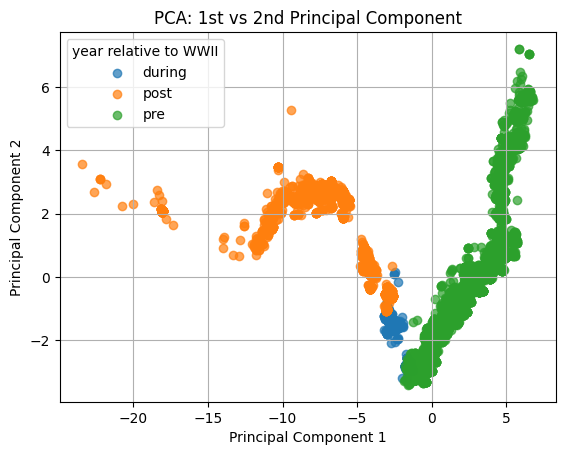

In [153]:
for label in np.unique(y):
    mask = (y == label)
    plt.scatter(x[mask, 0], x[mask, 1], alpha=0.7, label=label)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: 1st vs 2nd Principal Component')
plt.grid(True)
plt.legend(title='year relative to WWII')
plt.show()

In [154]:
y = np.where(df['gender_female'] == True, 'female', np.where(df['gender_male'] == True, 'male', 'unknown'))

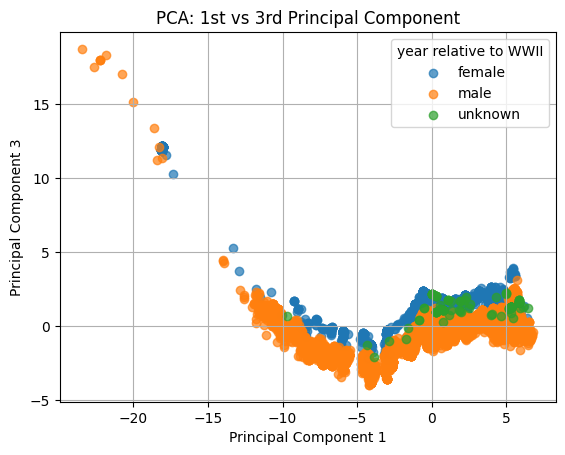

In [155]:
for label in np.unique(y):
    mask = (y == label)
    plt.scatter(x[mask, 0], x[mask, 2], alpha=0.7, label=label)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
plt.title('PCA: 1st vs 3rd Principal Component')
plt.grid(True)
plt.legend(title='year relative to WWII')
plt.show()

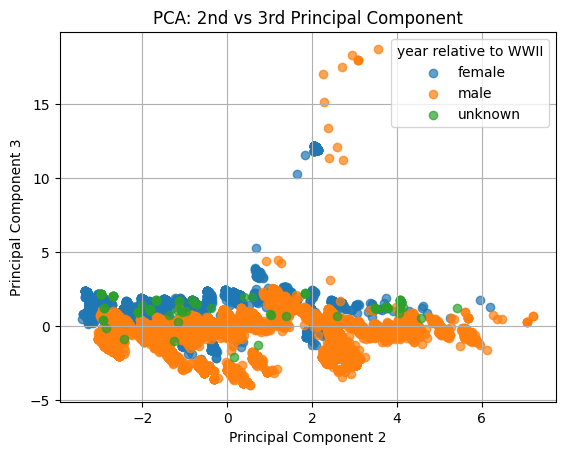

In [156]:
for label in np.unique(y):
    mask = (y == label)
    plt.scatter(x[mask, 1], x[mask, 2], alpha=0.7, label=label)

plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')
plt.title('PCA: 2nd vs 3rd Principal Component')
plt.grid(True)
plt.legend(title='year relative to WWII')
plt.show()

PC1 is heavily related to the time period.

In [157]:
loadings = pca.components_[0:3, :]

pc_loadings = pd.DataFrame(
    loadings.T,                   
    columns=['PC1', 'PC2', 'PC3'],     
    index=df_scaled.columns              
)

pc_loadings.sort_values(by='PC3')

PC1           PC2           PC3
gender_male             2.101519e-02  6.828453e-02 -2.431511e-01
marriage               -2.181632e-02 -2.411168e-02 -2.344323e-01
first_work_age         -1.011498e-02  3.069249e-02 -1.499532e-01
secondary_female       -2.119317e-01 -1.342376e-01 -9.360237e-02
char_type_旧字旧仮名         1.054976e-02  5.628583e-02 -9.290797e-02
secondary              -2.126331e-01 -1.302718e-01 -9.213503e-02
live_birth              1.874004e-01 -3.569604e-02 -9.069222e-02
secondary_male         -2.132532e-01 -1.274077e-01 -8.961699e-02
length_type_novelette  -1.681266e-03 -1.612118e-02 -8.828899e-02
authorAge              -1.392926e-01  3.135857e-02 -6.684851e-02
foetal_death           -4.028403e-02  4.173136e-01 -5.324720e-02
max                    -1.822146e-01  1.939473e-01 -4.988523e-02
tuberculosis_deaths     1.888154e-01 -1.643926e-01 -4.924580e-02
length_type_novel      -1.813187e-02  2.655866e-02 -4.730002e-02
author_role_著者         -9.966568e-03 -6.904054e-02 -3.717588e-02
char_type_旧字新仮名        -1.265932e-02  1.602634e-02 -2.406063e-02
primary_female          2.013286e-01 -1.548551e-01 -2.207953e-02
accident_deaths         6.344280e-02  8.854593e-03 -2.160405e-02
char_type_その他           4.507276e-04  2.030682e-02 -1.572030e-03
author_role_校訂者        -4.731489e-03  1.178630e-02 -1.047889e-04
author_role_編者         -9.403955e-38 -6.203855e-25  2.117582e-22
char_type_新字旧仮名         4.050379e-02 -1.550925e-02  3.666530e-03
length_type_shortshort -5.199274e-03 -8.413192e-03  3.467480e-02
primary                 2.227340e-01  9.538647e-03  3.550094e-02
author_role_翻訳者         1.044412e-02  6.823987e-02  3.733957e-02
senility_deaths         1.933997e-01 -1.883319e-01  3.912148e-02
length_type_short       2.502017e-02  6.937039e-03  4.245911e-02
gender_unknown          1.432087e-02  1.858376e-02  4.389985e-02
urban_percent          -2.143142e-01 -6.659264e-02  4.848571e-02
primary_male            2.206047e-01  7.587703e-02  5.538850e-02
char_type_新字新仮名        -4.229863e-02 -2.601895e-02  6.089113e-02
length_type_flash      -4.554634e-05 -8.677438e-03  6.662069e-02
suicide_deaths          2.450975e-02  1.042019e-01  7.238085e-02
divorce                 3.468319e-02  4.079687e-01  7.579247e-02
none_male               1.684364e-01  2.722710e-01  8.329112e-02
deaths                  2.063234e-01 -4.386199e-02  8.791795e-02
post_secondary_male    -2.198703e-01  2.117653e-02  9.469872e-02
none                    1.850983e-01  2.385551e-01  1.011336e-01
neonatal_mortality      2.132376e-01  1.112860e-01  1.015466e-01
none_female             1.873958e-01  2.321304e-01  1.048017e-01
infant_mortality        2.164689e-01  3.829185e-02  1.097006e-01
WPI                    -1.954725e-01  1.972546e-01  1.102090e-01
post_secondary         -2.158034e-01  1.924841e-02  1.300197e-01
pneumonia_deaths        1.766146e-01 -1.428301e-01  1.391608e-01
brain_deaths            8.563811e-02 -2.714395e-01  1.656029e-01
post_secondary_female  -2.044976e-01  2.103290e-02  1.913731e-01
gender_female          -2.553219e-02 -7.509763e-02  2.371930e-01
GDP_percentage_of_max   8.588405e-02 -2.976052e-01  3.000930e-01
cancer_deaths          -1.702832e-01  5.807718e-02  3.117910e-01
jp                     -1.324776e-01 -4.372478e-02  4.066282e-01
heart_disease_deaths   -6.775811e-02  6.457709e-02  4.170305e-01

C:\Users\Jaden\AppData\Local\Temp\ipykernel_10448\4053963333.py:6: UserWarning: Glyph 12381 (\N{HIRAGANA LETTER SO}) missing from font(s) DejaVu Sans.
  plt.tight_layout();
C:\Users\Jaden\AppData\Local\Temp\ipykernel_10448\4053963333.py:6: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  plt.tight_layout();
C:\Users\Jaden\AppData\Local\Temp\ipykernel_10448\4053963333.py:6: UserWarning: Glyph 20182 (\N{CJK UNIFIED IDEOGRAPH-4ED6}) missing from font(s) DejaVu Sans.
  plt.tight_layout();
C:\Users\Jaden\AppData\Local\Temp\ipykernel_10448\4053963333.py:6: UserWarning: Glyph 26032 (\N{CJK UNIFIED IDEOGRAPH-65B0}) missing from font(s) DejaVu Sans.
  plt.tight_layout();
C:\Users\Jaden\AppData\Local\Temp\ipykernel_10448\4053963333.py:6: UserWarning: Glyph 23383 (\N{CJK UNIFIED IDEOGRAPH-5B57}) missing from font(s) DejaVu Sans.
  plt.tight_layout();
C:\Users\Jaden\AppData\Local\Temp\ipykernel_10448\4053963333.py:6: UserWarning: Glyph 20206 (\N{CJK UNIFIED IDE

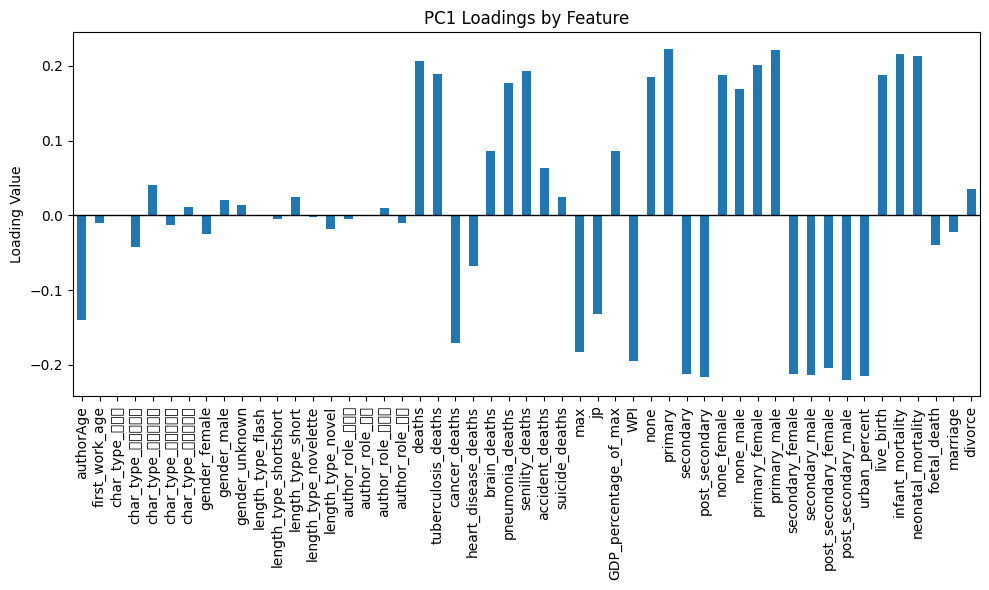

In [158]:
plt.figure(figsize=(10,6));
pc_loadings['PC1'].plot(kind='bar');
plt.axhline(0, color='black', linewidth=1);
plt.ylabel('Loading Value');
plt.title('PC1 Loadings by Feature');
plt.tight_layout();
plt.show();

C:\Users\Jaden\AppData\Local\Temp\ipykernel_10448\170857678.py:6: UserWarning: Glyph 12381 (\N{HIRAGANA LETTER SO}) missing from font(s) DejaVu Sans.
  plt.tight_layout();
C:\Users\Jaden\AppData\Local\Temp\ipykernel_10448\170857678.py:6: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  plt.tight_layout();
C:\Users\Jaden\AppData\Local\Temp\ipykernel_10448\170857678.py:6: UserWarning: Glyph 20182 (\N{CJK UNIFIED IDEOGRAPH-4ED6}) missing from font(s) DejaVu Sans.
  plt.tight_layout();
C:\Users\Jaden\AppData\Local\Temp\ipykernel_10448\170857678.py:6: UserWarning: Glyph 26032 (\N{CJK UNIFIED IDEOGRAPH-65B0}) missing from font(s) DejaVu Sans.
  plt.tight_layout();
C:\Users\Jaden\AppData\Local\Temp\ipykernel_10448\170857678.py:6: UserWarning: Glyph 23383 (\N{CJK UNIFIED IDEOGRAPH-5B57}) missing from font(s) DejaVu Sans.
  plt.tight_layout();
C:\Users\Jaden\AppData\Local\Temp\ipykernel_10448\170857678.py:6: UserWarning: Glyph 20206 (\N{CJK UNIFIED IDEOGRAPH

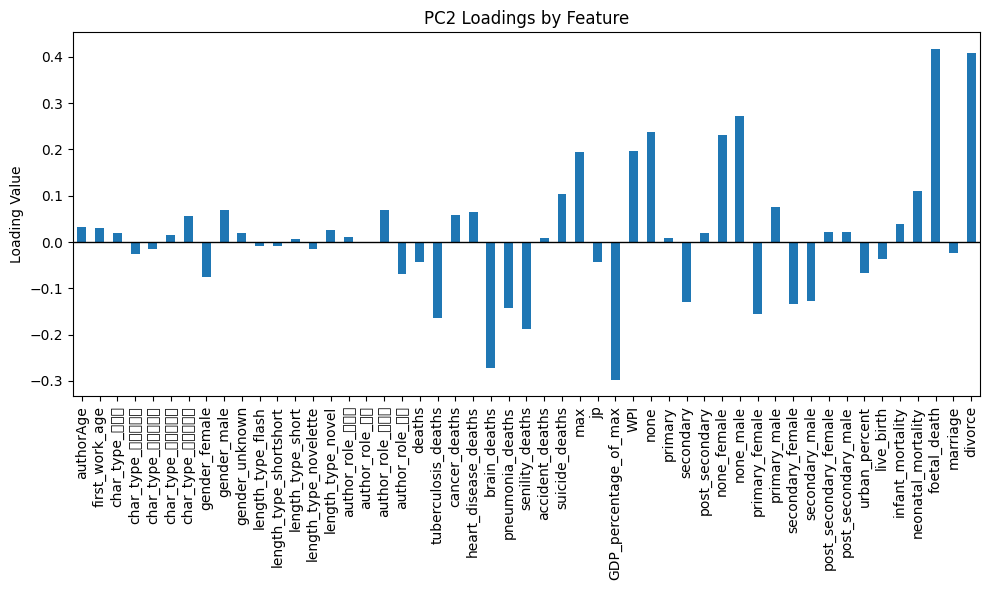

In [139]:
plt.figure(figsize=(10,6));
pc_loadings['PC2'].plot(kind='bar');
plt.axhline(0, color='black', linewidth=1);
plt.ylabel('Loading Value');
plt.title('PC2 Loadings by Feature');
plt.tight_layout();
plt.show();

C:\Users\Jaden\AppData\Local\Temp\ipykernel_10448\366269591.py:6: UserWarning: Glyph 12381 (\N{HIRAGANA LETTER SO}) missing from font(s) DejaVu Sans.
  plt.tight_layout();
C:\Users\Jaden\AppData\Local\Temp\ipykernel_10448\366269591.py:6: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  plt.tight_layout();
C:\Users\Jaden\AppData\Local\Temp\ipykernel_10448\366269591.py:6: UserWarning: Glyph 20182 (\N{CJK UNIFIED IDEOGRAPH-4ED6}) missing from font(s) DejaVu Sans.
  plt.tight_layout();
C:\Users\Jaden\AppData\Local\Temp\ipykernel_10448\366269591.py:6: UserWarning: Glyph 26032 (\N{CJK UNIFIED IDEOGRAPH-65B0}) missing from font(s) DejaVu Sans.
  plt.tight_layout();
C:\Users\Jaden\AppData\Local\Temp\ipykernel_10448\366269591.py:6: UserWarning: Glyph 23383 (\N{CJK UNIFIED IDEOGRAPH-5B57}) missing from font(s) DejaVu Sans.
  plt.tight_layout();
C:\Users\Jaden\AppData\Local\Temp\ipykernel_10448\366269591.py:6: UserWarning: Glyph 20206 (\N{CJK UNIFIED IDEOGRAPH

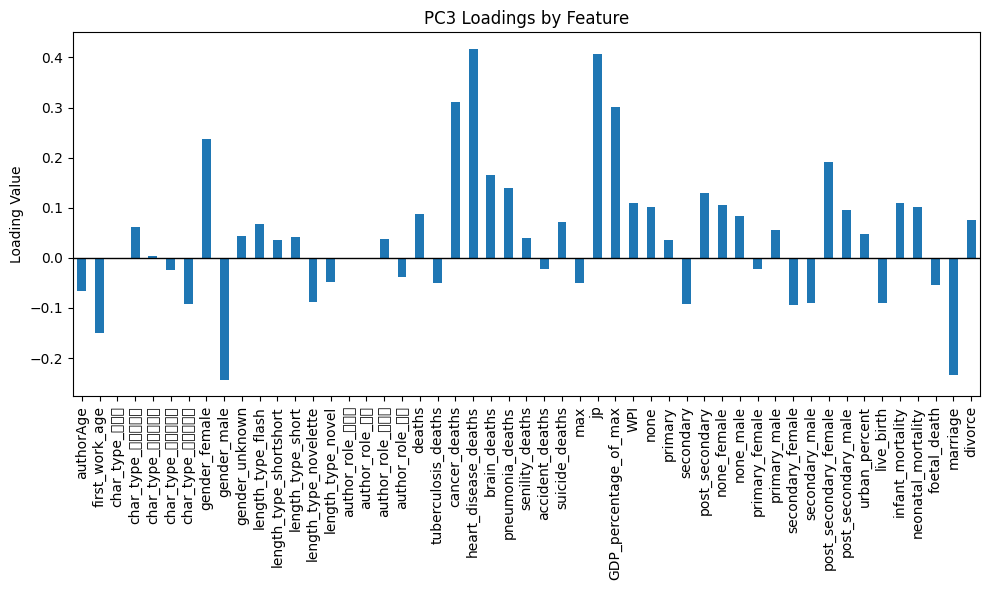

In [159]:
plt.figure(figsize=(10,6));
pc_loadings['PC3'].plot(kind='bar');
plt.axhline(0, color='black', linewidth=1);
plt.ylabel('Loading Value');
plt.title('PC3 Loadings by Feature');
plt.tight_layout();
plt.show();

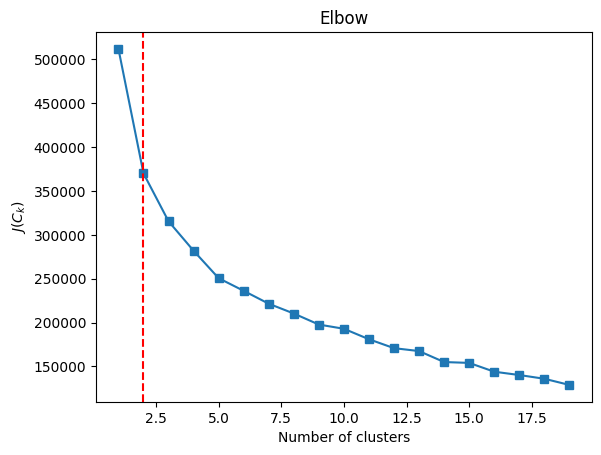

In [212]:
inertia = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 98)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 20), inertia, marker='s')
plt.title('Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('$J(C_k)$')
plt.axvline(x=2, c='red', ls='--')
plt.show()

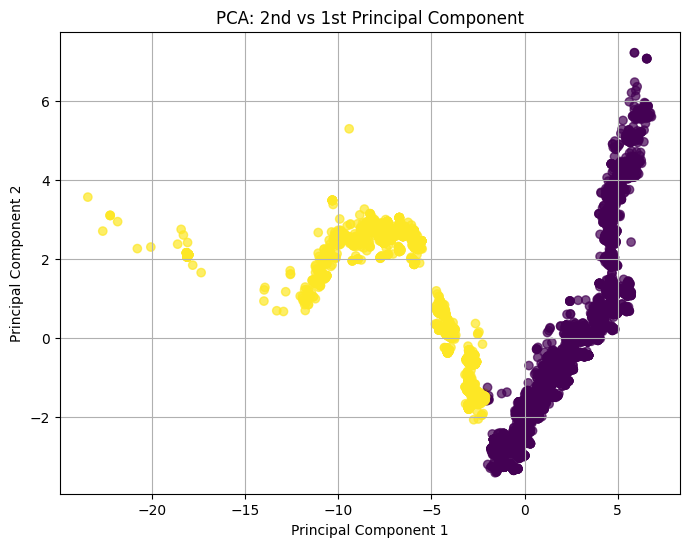

In [170]:
kmeans = KMeans(n_clusters = 2, random_state=98)
kmeans.fit(df_scaled)

clusters = kmeans.predict(df_scaled)

plt.figure(figsize=(8,6))
plt.scatter(x[:, 0], x[:, 1], c=clusters, alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: 2nd vs 1st Principal Component')
plt.grid(True)
plt.show()

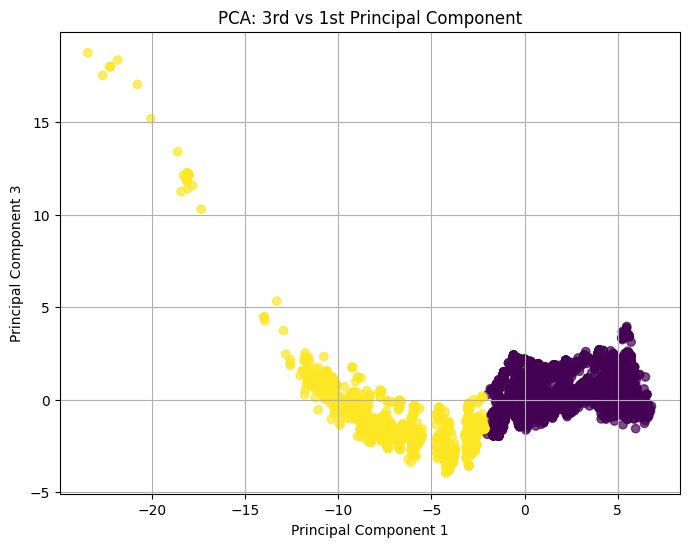

In [163]:
plt.figure(figsize=(8,6))
plt.scatter(x[:, 0], x[:, 2], c=clusters, alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
plt.title('PCA: 3rd vs 1st Principal Component')
plt.grid(True)
plt.show()

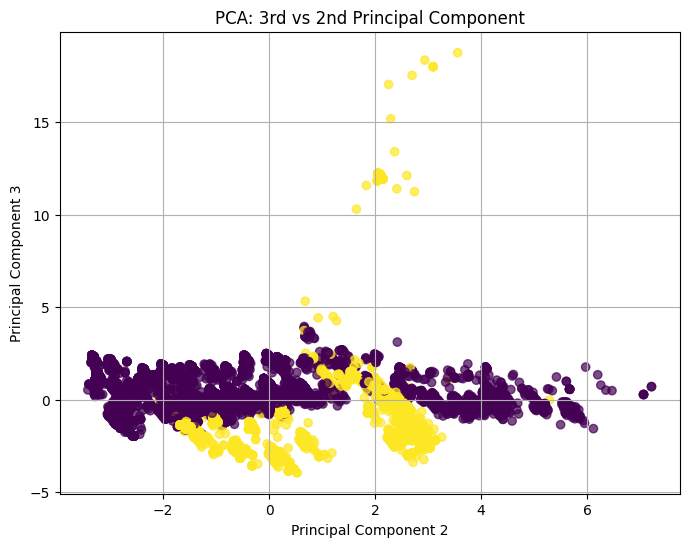

In [166]:
plt.figure(figsize=(8,6))
plt.scatter(x[:, 1], x[:, 2], c=clusters, alpha=0.7)
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')
plt.title('PCA: 3rd vs 2nd Principal Component')
plt.grid(True)
plt.show()